**Name:** Shreya Vinay Nayak

**Github Username:** ShreyaNayak256

**USC ID:** 8592810456

In [1]:
!pip install imblearn

In [2]:
!pip install tabulate

In [3]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import math
from matplotlib import rcParams
import os
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,log_loss,roc_curve,recall_score,precision_recall_curve,precision_score, classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import roc_auc_score
import xgboost as xgb
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier,plot_tree
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD

## 1. Tree-Based Methods

**(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.**

In [4]:
aps_train= pd.read_csv('../data/aps_failure_training_set.csv',na_values='na')
aps_test= pd.read_csv('../data/aps_failure_test_set.csv',na_values='na')

In [5]:
aps_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [6]:
aps_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB


In [7]:
aps_train.head()

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  
0   73224.0     0.0     0.0     0.0  
1   97576.0  1500.0     0.0     0.0  
2   95128.0   514.0     0.0     0.0  
3       0.0     0.0     4.0    32.0  
4  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [8]:
aps_test.head()

class  aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg      60     0.0    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg      82     0.0    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg   66002     2.0   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg   59816     NaN  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg    1814     NaN   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

**(b)Data Preparation**
This data set has missing values. When the number of data with missing values
is significant, discarding them is not a good idea. [1]

In reality, when we have a model and we want to fill in missing values, we do not have access to training data, so we only use the statistics of test data to fill in the missing values.

**i. Research what types of techniques are usually used for dealing with data with missing values.[2] Pick at least one of them and apply it to this data in the next steps.[3]**

#### Data imputation techniques 

1.Complete Case Analysis(CCA):-
This is a quite straightforward method of handling the Missing Data, which directly removes the rows that have missing data i.e we consider only those rows where we have complete data i.e data is not missing. This method is also popularly known as “Listwise deletion”.

2.Mean or median or most frequent other summary statistic substitution.

3.Replacing With Arbitrary Value.

4.Imputation of Missing Value Using sci-kit learn Library (Univariate Approach).

5.In a multivariate approach, more than one feature is taken into consideration. There are two ways to impute missing values considering the multivariate approach. Using KNNImputer or IterativeImputer classes. (Multivariate Approach)







In [9]:
imputer = SimpleImputer(missing_values =np.nan, strategy = 'most_frequent')
aps_train['class']=aps_train['class'].map({"pos":1,'neg':0})
aps_test['class']=aps_test['class'].map({"pos":1,'neg':0})
df_aps=pd.concat([aps_train,aps_test])
df_aps.reset_index(drop=True,inplace=True)
imputer.fit(df_aps)
df_aps_m1= pd.DataFrame(imputer.transform(df_aps), columns=df_aps.columns)

In [10]:
df_aps_m1.head()

class   aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0    0.0  76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1    0.0  33058.0     0.0  0.000000e+00     0.0     0.0     0.0     0.0   
2    0.0  41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3    0.0     12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4    0.0  60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   

   ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0     0.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0     0.0  
1   81140.0   97576.0  1500.0     0.0     0.0  
2  158022.0   95128.0   514.0     0.0     0.0  
3       0.0       0.0     0.0     4.0    32.0  
4  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [11]:
aps_train= df_aps_m1.loc[:59999]
print(aps_train)

       class    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0        0.0   76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1        0.0   33058.0     0.0  0.000000e+00     0.0     0.0     0.0     0.0   
2        0.0   41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3        0.0      12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4        0.0   60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...      ...       ...     ...           ...     ...     ...     ...     ...   
59995    0.0  153002.0     0.0  6.640000e+02   186.0     0.0     0.0     0.0   
59996    0.0    2286.0     0.0  2.130707e+09   224.0     0.0     0.0     0.0   
59997    0.0     112.0     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998    0.0   80292.0     0.0  2.130706e+09   494.0     0.0     0.0     0.0   
59999    0.0   40222.0     0.0  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002  

In [12]:
aps_test= df_aps_m1.loc[60000:]
print(aps_test)

       class   aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
60000    0.0     60.0     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
60001    0.0     82.0     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
60002    0.0  66002.0     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
60003    0.0  59816.0     0.0  1.010000e+03   936.0     0.0     0.0     0.0   
60004    0.0   1814.0     0.0  1.560000e+02   140.0     0.0     0.0     0.0   
...      ...      ...     ...           ...     ...     ...     ...     ...   
75995    0.0  81852.0     0.0  2.130706e+09   892.0     0.0     0.0     0.0   
75996    0.0     18.0     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
75997    0.0  79636.0     0.0  1.670000e+03  1518.0     0.0     0.0     0.0   
75998    0.0    110.0     0.0  3.600000e+01    32.0     0.0     0.0     0.0   
75999    0.0      8.0     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    e

In [13]:
aps_train_features= aps_train.loc[:, aps_train.columns !='class']
aps_test_features= aps_test.loc[:, aps_test.columns !='class']

**ii. For each of the 170 features, calculate the coefficient of variation CV = ms , where s is sample standard deviation and m is sample mean.**

In [14]:
aps_features= df_aps_m1.loc[:, df_aps_m1.columns != 'class']

In [15]:
#defining a function to calculate cv
cv =lambda x: np.std(x) / np.mean(x)
#calculating CV for each column/feature in data frame
cv_each_feature= aps_features.apply(cv)
print("Column                              CV")
for i in range(len(cv_each_feature)):
    print("_________________________________________________")
    print("{}                {}".format(cv_each_feature.index[i],cv_each_feature[i]))

Column                              CV
_________________________________________________
aa_000                4.328579357658981
_________________________________________________
ab_000                9.740457330814944
_________________________________________________
ac_000                2.3092840883329098
_________________________________________________
ad_000                274.86554606709
_________________________________________________
ae_000                23.271203774234916
_________________________________________________
af_000                19.00782844416673
_________________________________________________
ag_000                92.50690166498183
_________________________________________________
ag_001                42.565864945624355
_________________________________________________
ag_002                17.827846126306603
_________________________________________________
ag_003                8.854071784421883
_________________________________________________
ag_004   

**iii. Plot a correlation matrix for your features using pandas or any other tool.**

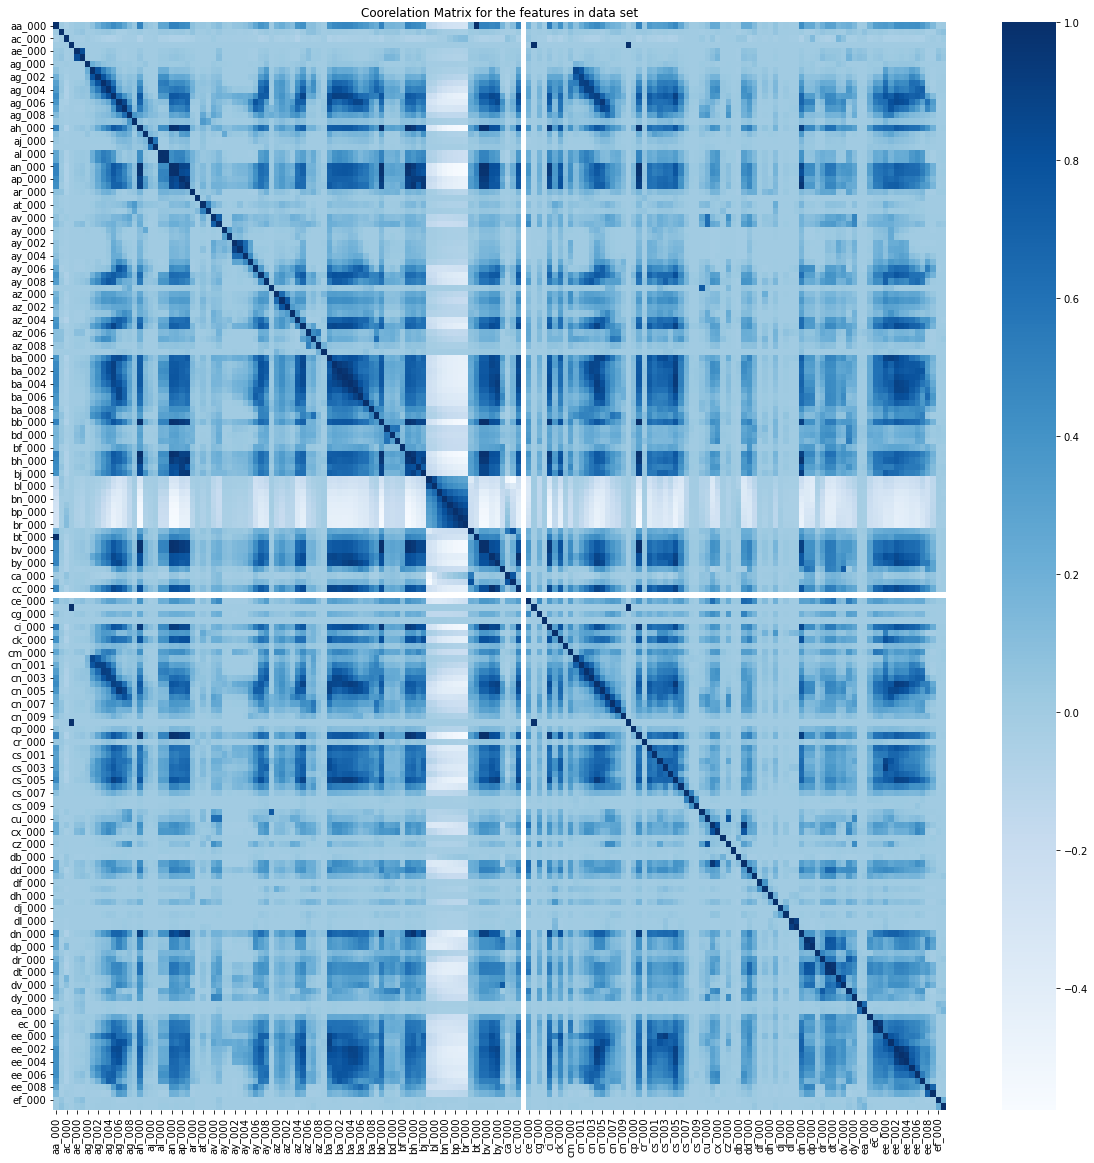

In [16]:
correlation_matrix =aps_features.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,cmap="Blues")
plt.title('Coorelation Matrix for the features in data set')
plt.show()

**iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.**

In [17]:
features_select= math.isqrt(170)
print(features_select)

13


In [18]:
features_select= math.isqrt(170)
features_highest_cv= cv_each_feature.sort_values(ascending=False)[:features_select]
print(features_highest_cv)

cf_000    275.595216
co_000    275.071147
ad_000    274.865546
cs_009    194.719656
dj_000    130.914372
dh_000    120.758710
df_000    119.383625
as_000    115.081320
ag_000     92.506902
au_000     86.991676
ak_000     84.874588
az_009     78.894989
ay_009     78.350353
dtype: float64


In [19]:
df_aps_m1

class   aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0        0.0  76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1        0.0  33058.0     0.0  0.000000e+00     0.0     0.0     0.0     0.0   
2        0.0  41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3        0.0     12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4        0.0  60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...      ...      ...     ...           ...     ...     ...     ...     ...   
75995    0.0  81852.0     0.0  2.130706e+09   892.0     0.0     0.0     0.0   
75996    0.0     18.0     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
75997    0.0  79636.0     0.0  1.670000e+03  1518.0     0.0     0.0     0.0   
75998    0.0    110.0     0.0  3.600000e+01    32.0     0.0     0.0     0.0   
75999    0.0      8.0     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0         0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1         0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2         0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3         0.0     0.0  ...      240.0      46.0      58.0      44.0      10.0   
4         0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   
...       ...     ...  ...        ...       ...       ...       ...       ...   
75995     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0  349840.0   
75996     0.0     0.0  ...      266.0      44.0      46.0      14.0       2.0   
75997     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0  375498.0   
75998     0.0     0.0  ...      588.0     210.0     180.0     544.0    1004.0   
75999     0.0     0.0  ...       46.0      10.0      48.0      14.0      42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0      157956.0   73224.0      0.0     0.0     0.0  
1       81140.0   97576.0   1500.0     0.0     0.0  
2      158022.0   95128.0    514.0     0.0     0.0  
3           0.0       0.0      0.0     4.0    32.0  
4      311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
75995  317840.0  960024.0  25566.0     0.0     0.0  
75996       0.0       0.0      0.0     0.0     0.0  
75997  222866.0  358934.0  19548.0     0.0     0.0  
75998    1338.0      74.0      0.0     0.0     0.0  
75999      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 171 columns]

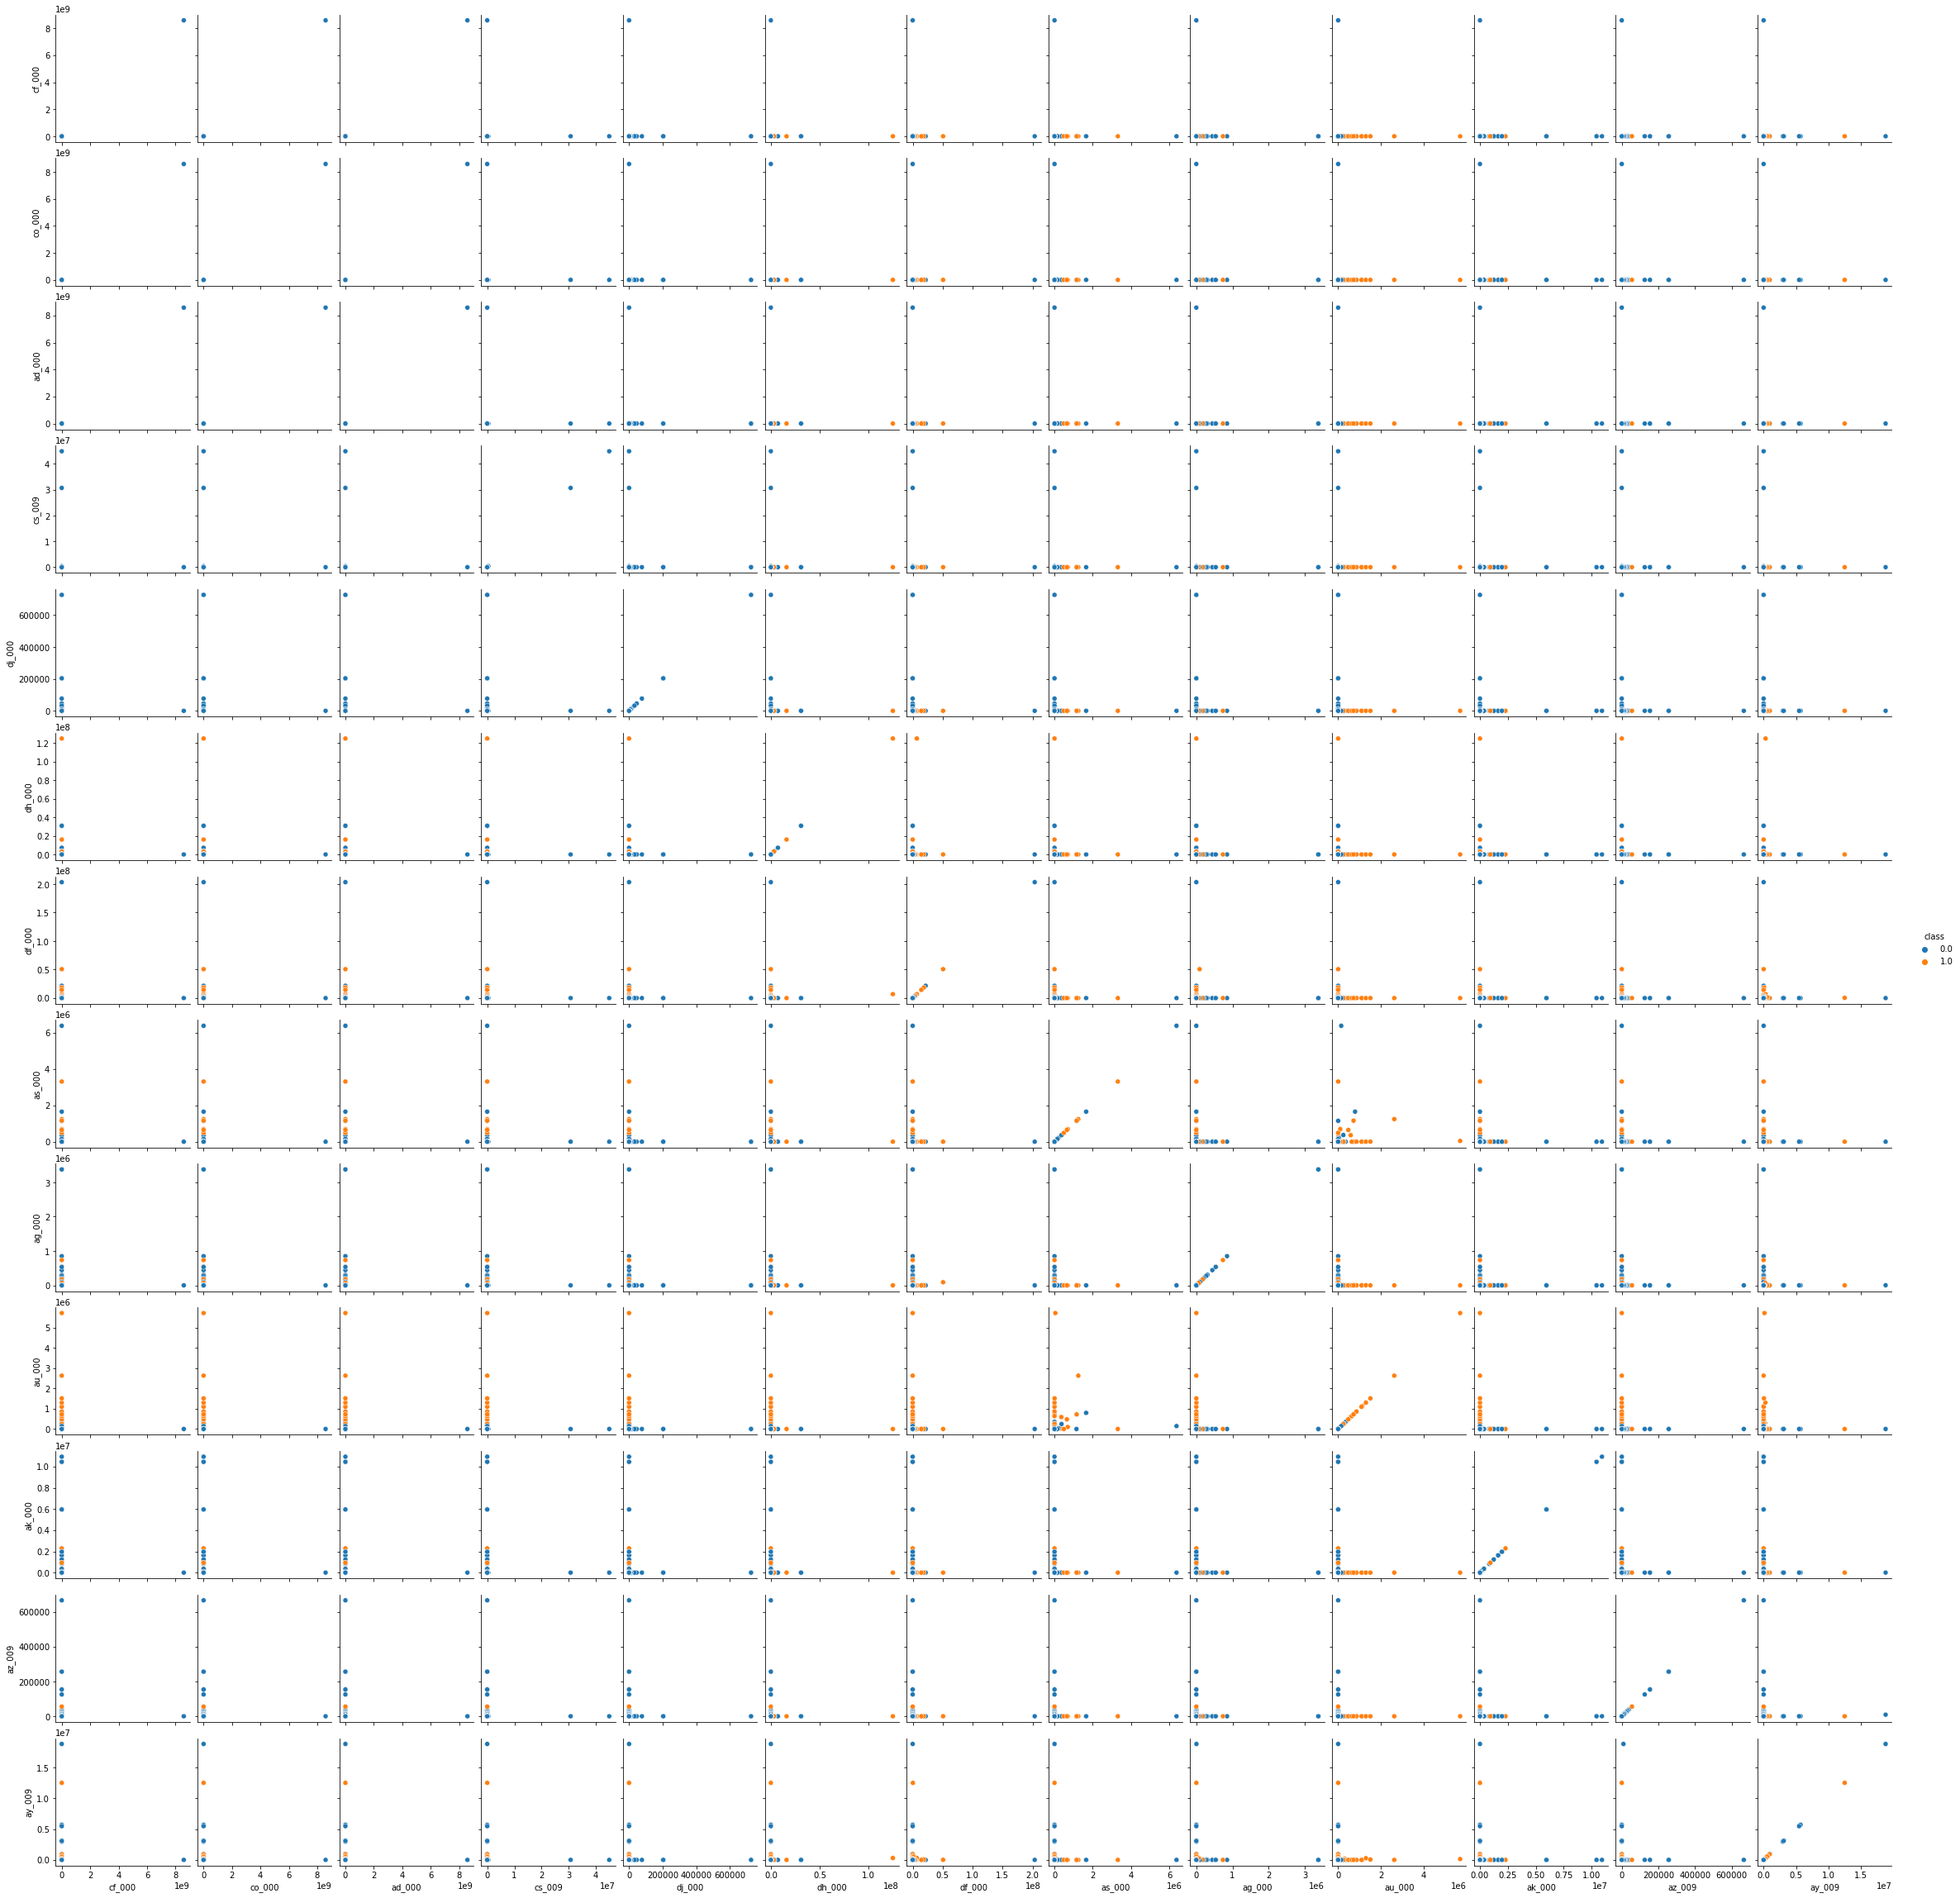

In [20]:
# Scatterplot
cols = list(features_highest_cv.index)
cols.append("class")
sns.pairplot(df_aps_m1[cols], hue='class',diag_kind=None)

The scatterplot shows that classes are linearly seperable for some pairs of the feature pairs.

cf_000         AxesSubplot(0.1,0.736957;0.173913x0.163043)
co_000    AxesSubplot(0.308696,0.736957;0.173913x0.163043)
ad_000    AxesSubplot(0.517391,0.736957;0.173913x0.163043)
cs_009    AxesSubplot(0.726087,0.736957;0.173913x0.163043)
dj_000         AxesSubplot(0.1,0.541304;0.173913x0.163043)
dh_000    AxesSubplot(0.308696,0.541304;0.173913x0.163043)
df_000    AxesSubplot(0.517391,0.541304;0.173913x0.163043)
as_000    AxesSubplot(0.726087,0.541304;0.173913x0.163043)
ag_000         AxesSubplot(0.1,0.345652;0.173913x0.163043)
au_000    AxesSubplot(0.308696,0.345652;0.173913x0.163043)
ak_000    AxesSubplot(0.517391,0.345652;0.173913x0.163043)
az_009    AxesSubplot(0.726087,0.345652;0.173913x0.163043)
ay_009             AxesSubplot(0.1,0.15;0.173913x0.163043)
dtype: object

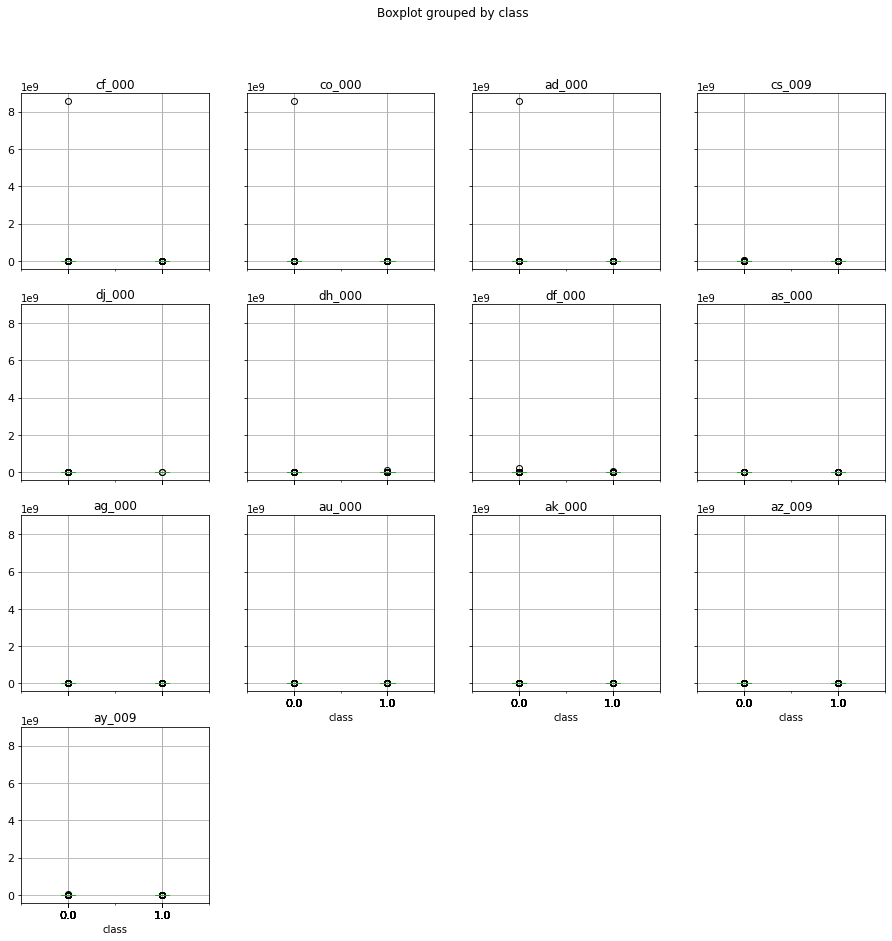

In [21]:
#Boxplots
df_aps_m1.boxplot(column=cols[:-1], by='class', fontsize=11, figsize=(15, 15), return_type='axes')

**v. Determine the number of positive and negative data. Is this data set imbalanced?**

In [22]:
# To find out the imbalance in the training dataset
print('The total length of the training set is:',len(aps_train))
aps_train['class'].value_counts()

The total length of the training set is: 60000


0.0    59000
1.0     1000
Name: class, dtype: int64

In [23]:
# To find out the imbalance in the testing dataset
print('The total length of the testing set is:',len(aps_test))
aps_test['class'].value_counts()

The total length of the testing set is: 16000


0.0    15625
1.0      375
Name: class, dtype: int64

In [24]:
#The imbalance in the overall dataset
print('The total length of the dataset is:',len(df_aps))
df_aps['class'].value_counts()

The total length of the dataset is: 76000


0    74625
1     1375
Name: class, dtype: int64

### Here 1 is the positive class and 0 is the negative class.
### Yes, It can be seen that there is a class imbalance since the instances of the negative class are way more than the instances of the positive class.

**(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forest and compare it to the test error.**

1. Confusion matrix


2. ROC 

3. AUC 


4. Misclassification


for training and test sets
Use pROC package
Out of Bag Error estinmate for RFC and compare to test error


In [25]:
X_train= aps_train_features
y_train= aps_train['class']
X_test=aps_test_features
y_test=aps_test['class']

In [26]:
rfc = RandomForestClassifier(n_estimators = 100,oob_score=True,max_depth=5)
#On the training dataset
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, oob_score=True)

In [27]:

y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

                             
#Training accuracy
rfc_train_accuracy = accuracy_score(y_train, y_pred_train)
rfc_train_accuracy= round(rfc_train_accuracy,5)
#Train error
train_error=1-rfc_train_accuracy
print('Training accuracy: ',rfc_train_accuracy)
print('Train error: ',train_error)
#Testing accuracy
rfc_test_accuracy = accuracy_score(y_test, y_pred_test)
rfc_test_accuracy= round(rfc_test_accuracy, 5)
#Test error
test_error=1-rfc_test_accuracy
print('Testing accuracy: ',rfc_test_accuracy)
print('Testing error: ',test_error)
#oob Error
oob_error = 1 - rfc.oob_score_
print("The out of bag error estimate is:",oob_error)

                         

Training accuracy:  0.9921
Train error:  0.007900000000000018
Testing accuracy:  0.98794
Testing error:  0.01205999999999996
The out of bag error estimate is: 0.009383333333333299


In [28]:
test_error

0.01205999999999996

In [29]:
#Confusion matrix for training set
cm_train=confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for training data is:')
print(cm_train)

#Confusion matrix for testing set
cm_test=confusion_matrix(y_test, y_pred_test)
print('Confusion matrix for testing data is:')
print(cm_test)





Confusion matrix for training data is:
[[58972    28]
 [  446   554]]
Confusion matrix for testing data is:
[[15614    11]
 [  182   193]]


In [30]:
misclassif_rate_train = (cm_train[[1],[0]].flat[0] + cm_train[[0],[1]].flat[0])/len(aps_train)
print(f" Training Misclassification rate = {misclassif_rate_train :.8f}")

 Training Misclassification rate = 0.00790000


In [31]:
misclassif_rate_test = (cm_test[[1],[0]].flat[0] + cm_test[[0],[1]].flat[0])/len(aps_test)
print(f"Testing Misclassification rate = {misclassif_rate_test :.8f}")

Testing Misclassification rate = 0.01206250


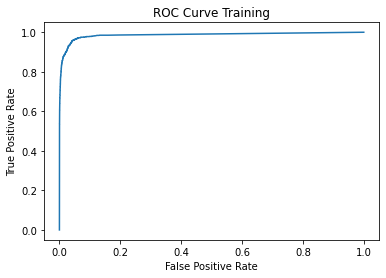

In [32]:
#ROC for training set
fprate, tprate, thresholds = roc_curve(y_train, rfc.predict_proba(X_train)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Training')
plt.show()

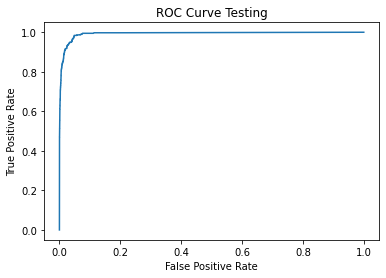

In [33]:
#ROC for testing set
fprate, tprate, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Testing')
plt.show()

In [34]:
#AUC for training set

auc_train = np.round(roc_auc_score(y_train, rfc.predict_proba(X_train)[:,1]),4)
print("Auc for our training data is {}". format(auc_train))

Auc for our training data is 0.9861


In [35]:
#AUC for testing set
auc_test = np.round(roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]),4)
print("Auc for our testing data is {}". format(auc_test))

Auc for our testing data is 0.9927


**(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.**

In [36]:
rfc_b = RandomForestClassifier(max_depth=5,n_estimators = 100,oob_score=True,class_weight="balanced")
#On the training dataset
rfc_b.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, oob_score=True)

In [37]:

y_pred_train=rfc_b.predict(X_train)
y_pred_test=rfc_b.predict(X_test)

print("After balancing:")
#Training accuracy
rfc_b_train_accuracy = accuracy_score(y_train, y_pred_train)
rfc_b_train_accuracy= round(rfc_b_train_accuracy, 3)
#Train error
train_error_b=1-rfc_b_train_accuracy
print('Training accuracy: ',rfc_b_train_accuracy)
print('Train error: ',train_error)
#Testing accuracy
rfc_b_test_accuracy = accuracy_score(y_test, y_pred_test)
rfc_b_test_accuracy= round(rfc_b_test_accuracy, 3)
#Test error
test_error_b=1-rfc_b_test_accuracy
print('Testing accuracy: ',rfc_b_test_accuracy)
print('Testing error: ',test_error_b)
#oob Error
oob_error_b = 1 - rfc_b.oob_score_
print("The out of bag error estimate is:",oob_error_b)



After balancing:
Training accuracy:  0.959
Train error:  0.007900000000000018
Testing accuracy:  0.96
Testing error:  0.040000000000000036
The out of bag error estimate is: 0.04238333333333333


In [38]:
#Confusion matrix for training set
cm_train_b=confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for training data is:')
print(cm_train)

#Confusion matrix for testing set
cm_test_b=confusion_matrix(y_test, y_pred_test)
print('Confusion matrix for testing data is:')
print(cm_test)



Confusion matrix for training data is:
[[58972    28]
 [  446   554]]
Confusion matrix for testing data is:
[[15614    11]
 [  182   193]]


In [39]:
#Misclassification rate
misclassif_rate_train_b = (cm_train_b[[1],[0]].flat[0] + cm_train_b[[0],[1]].flat[0])/len(aps_train)
print(f" Training Misclassification rate = {misclassif_rate_train :.8f}")

misclassif_rate_test_b = (cm_test_b[[1],[0]].flat[0] + cm_test_b[[0],[1]].flat[0])/len(aps_test)
print(f"Testing Misclassification rate = {misclassif_rate_test_b :.8f}")

 Training Misclassification rate = 0.00790000
Testing Misclassification rate = 0.03975000


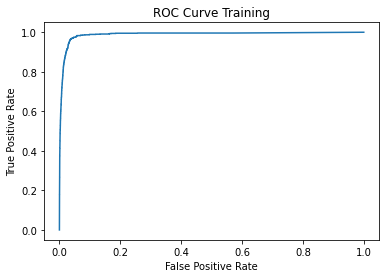

In [40]:
#ROC for training set
fprate, tprate, thresholds = roc_curve(y_train, rfc_b.predict_proba(X_train)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Training')
plt.show()

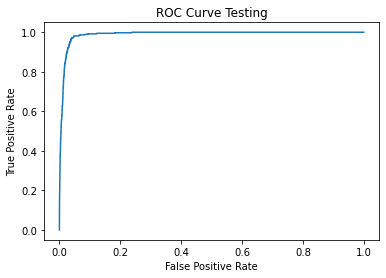

In [41]:
#ROC for testing set
fprate, tprate, thresholds = roc_curve(y_test, rfc_b.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Testing')
plt.show()

In [42]:
#AUC for training and testing set

#AUC for training set
auc_train_b = np.round(roc_auc_score(y_train, rfc_b.predict_proba(X_train)[:,1]),4)
print("Auc for our training data is {}". format(auc_train_b))

#AUC for testing set
auc_test_b = np.round(roc_auc_score(y_test, rfc_b.predict_proba(X_test)[:,1]),4)
print("Auc for our testing data is {}". format(auc_test_b))


Auc for our training data is 0.9886
Auc for our testing data is 0.9891


### Comparing the results with 1c)


In [43]:
data = [
    ['Train Accuracy', rfc_train_accuracy,rfc_b_train_accuracy],
    ['Test Accuracy',rfc_test_accuracy,rfc_b_test_accuracy],
    ['OOB Error',oob_error,oob_error_b],
    ['Test Error',test_error,test_error_b],
    ['Train Error',train_error,train_error_b],
    ['Train AUC',auc_train,auc_train_b],
    ['Test AUC',auc_test,auc_test_b]
]
col_names = ['Measure', 'Random Forest with Class Imbalance', 'Random Forest without Class Imbalance']
print(tabulate(data, headers=col_names, tablefmt="grid", showindex="always"))

+----+----------------+--------------------------------------+-----------------------------------------+
|    | Measure        |   Random Forest with Class Imbalance |   Random Forest without Class Imbalance |
+====+================+======================================+=========================================+
|  0 | Train Accuracy |                           0.9921     |                               0.959     |
+----+----------------+--------------------------------------+-----------------------------------------+
|  1 | Test Accuracy  |                           0.98794    |                               0.96      |
+----+----------------+--------------------------------------+-----------------------------------------+
|  2 | OOB Error      |                           0.00938333 |                               0.0423833 |
+----+----------------+--------------------------------------+-----------------------------------------+
|  3 | Test Error     |                           0.012

# Findings:

After balancing the classes, OOB Error, Test Error, Train Error,Train AUC Increased.


However after balancing, train accuracy,test accuracy,test AUC Decreased.

**(e) XGBoost and Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰀j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.**

In [44]:
alphas = 10**np.linspace(1,-2,20)*0.5

In [45]:
# Select best alpha for XGBoost

xgbm = xgb.XGBClassifier(objective='binary:logistic')
params = {'reg_alpha': alphas}
modval = GridSearchCV(xgbm,params, cv=5)
modval = modval.fit(X_train,y_train)

best_alpha = modval.best_params_['reg_alpha']
best_alpha = round(best_alpha,4)
print('******************************************')
print('BEST ALPHA FOR XGBOOST:',best_alpha)



******************************************
BEST ALPHA FOR XGBOOST: 0.2728


In [46]:
# Fittibg the XGBoost model on best alpha selected
finalXM = xgb.XGBClassifier(objective='binary:logistic', reg_alpha=best_alpha)
finalXM = finalXM.fit(X_train,y_train)

y_pred_xg = finalXM.predict(X_test)
xg_score = accuracy_score(y_test,y_pred_xg)
xg_score = round(xg_score,4)
print('******************************************')
print('TEST Accuracy FOR XGBOOST CLASSIFIER:', xg_score)
print('******************************************')

******************************************
TEST Accuracy FOR XGBOOST CLASSIFIER: 0.9939
******************************************


In [47]:
#Confusion matrix for training set

y_pred_train=finalXM.predict(X_train)
y_pred_test=finalXM.predict(X_test)
cm_train=confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for training data is:')
print(cm_train)

#Confusion matrix for testing set
cm_test=confusion_matrix(y_test, y_pred_test)
print('Confusion matrix for testing data is:')
print(cm_test)

Confusion matrix for training data is:
[[59000     0]
 [    1   999]]
Confusion matrix for testing data is:
[[15611    14]
 [   84   291]]


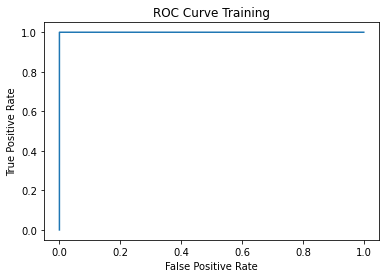

In [48]:
#ROC for training sets
fprate, tprate, thresholds = roc_curve(y_train, finalXM.predict_proba(X_train)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Training')
plt.show()




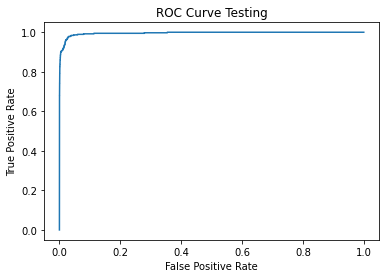

In [49]:
#ROC for testing set
fprate, tprate, thresholds = roc_curve(y_test, finalXM.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Testing')
plt.show()

In [50]:
#AUC for training and testing set

#AUC for training set
auc_train_xg = np.round(roc_auc_score(y_train, finalXM.predict_proba(X_train)[:,1]),4)
print("Auc for our training data is {}". format(auc_train_xg))

#AUC for testing set
auc_test_xg = np.round(roc_auc_score(y_test, finalXM.predict_proba(X_test)[:,1]),4)
print("Auc for our testing data is {}". format(auc_test_xg))


Auc for our training data is 1.0
Auc for our testing data is 0.9955


**(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized lo- gistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.**

In [51]:
#Training XGBoost with L1-penalized logistic regression at each node and preprocessed data

#defining pipeline for training
smote = SMOTE(random_state=0)
xgbm = xgb.XGBClassifier(objective='binary:logistic')

PipeLine = imbpipeline(steps=[['smote',smote],
                             ['classifier',xgbm]])
# Definining alphas for XGBoost
alphas = 10**np.linspace(1,-2,5)*0.5

params = {'classifier__reg_alpha': alphas}
modval = GridSearchCV(PipeLine,params, cv=5,verbose=2)
modval = modval.fit(X_train,y_train)

best_alpha = modval.best_params_['classifier__reg_alpha']
best_alpha = round(best_alpha,4)
print('******************************************')
print('BEST ALPHA FOR XGBOOST:',best_alpha)

# Fittibg the XGBoost model on best alpha selected
finalXMS = xgb.XGBClassifier(objective='binary:logistic', reg_alpha=best_alpha)
finalXMS = finalXMS.fit(X_train,y_train)

y_pred_xg = finalXMS.predict(X_test)
xg_score_smote = accuracy_score(y_test,y_pred_xg)
xg_score_smote = round(xg_score_smote,4)
print('******************************************')
print('Test Accuracy for XGBOOST Classifier:', xg_score_smote)
print('******************************************')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................classifier__reg_alpha=5.0; total time=  43.8s
[CV] END ..........................classifier__reg_alpha=5.0; total time=  45.6s
[CV] END ..........................classifier__reg_alpha=5.0; total time=  42.7s
[CV] END ..........................classifier__reg_alpha=5.0; total time=  43.3s
[CV] END ..........................classifier__reg_alpha=5.0; total time=  44.6s
[CV] END ...........classifier__reg_alpha=0.8891397050194614; total time=  48.4s
[CV] END ...........classifier__reg_alpha=0.8891397050194614; total time=  48.4s
[CV] END ...........classifier__reg_alpha=0.8891397050194614; total time=  48.0s
[CV] END ...........classifier__reg_alpha=0.8891397050194614; total time=  52.0s
[CV] END ...........classifier__reg_alpha=0.8891397050194614; total time=  49.7s
[CV] END ..........classifier__reg_alpha=0.15811388300841897; total time=  46.8s
[CV] END ..........classifier__reg_alpha=0.158113

In [52]:
#Confusion matrix for training set

y_pred_train=finalXMS.predict(X_train)
y_pred_test=finalXMS.predict(X_test)

cm_train=confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for training data is:')
print(cm_train)

#Confusion matrix for testing set
cm_test=confusion_matrix(y_test, y_pred_test)
print('Confusion matrix for testing data is:')
print(cm_test)

Confusion matrix for training data is:
[[59000     0]
 [    1   999]]
Confusion matrix for testing data is:
[[15611    14]
 [   85   290]]


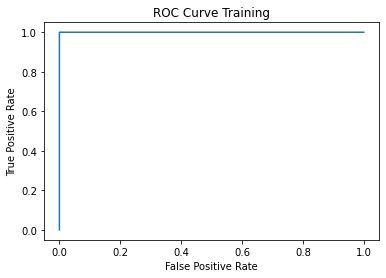

In [53]:
#ROC for training set
fprate, tprate, thresholds = roc_curve(y_train, finalXMS.predict_proba(X_train)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Training')
plt.show()


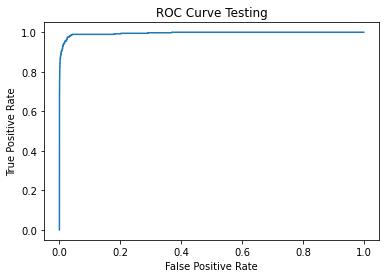

In [54]:
#ROC for testing set
fprate, tprate, thresholds = roc_curve(y_test,finalXMS.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Testing')
plt.show()

In [55]:
#AUC for training and testing set

#AUC for training set
auc_train_xg_smote = np.round(roc_auc_score(y_train, finalXMS.predict_proba(X_train)[:,1]),4)
print("Auc for our training data is {}". format(auc_train_xg_smote))

#AUC for testing set
auc_test_xg_smote = np.round(roc_auc_score(y_test, finalXMS.predict_proba(X_test)[:,1]),4)
print("Auc for our testing data is {}". format(auc_test_xg_smote))

Auc for our training data is 1.0
Auc for our testing data is 0.9952


## 2. ISLR 6.6.3

a) **(iv) Steadily decreases** 
All β 's increase from 0 to their least square estimate values, when s is increased from 0.
Training error is maximum in the case of  0 β s and it eventually steadily decreases to the Ordinary Least Square RSS.

b)**(ii) Decrease initially and then eventually start increasing in a U shape**
On increasing s, beta s assumes non-zero values and the model begins to fit well on the test data due to which the RSS decreases. When s=0 and all betas are 0 the model is extremely simple and has a high test RSS.

c) **(iii)Steadily increase**
On increasing s, the model includes more betas and the values of betas starts increasing.The beta values are highly dependent on training data which leads to increase in the variance and decrease in bias. When s=0, the model has nearly no variance and is effective in predicting a constant.

d)**Steadily decrease**
On increasing the value of s, model includes more betas and the values of betas starts increasing (non-zero). The model tends to fit the training data better and the bias decreases.
When s=0, it predicts a constant that is far away from the actual value.


e)**Remains constant**
The irreducible error of a model is independent and remains constant. Hence does not dependent on choice of s.

## 3. ISLR 6.6.5

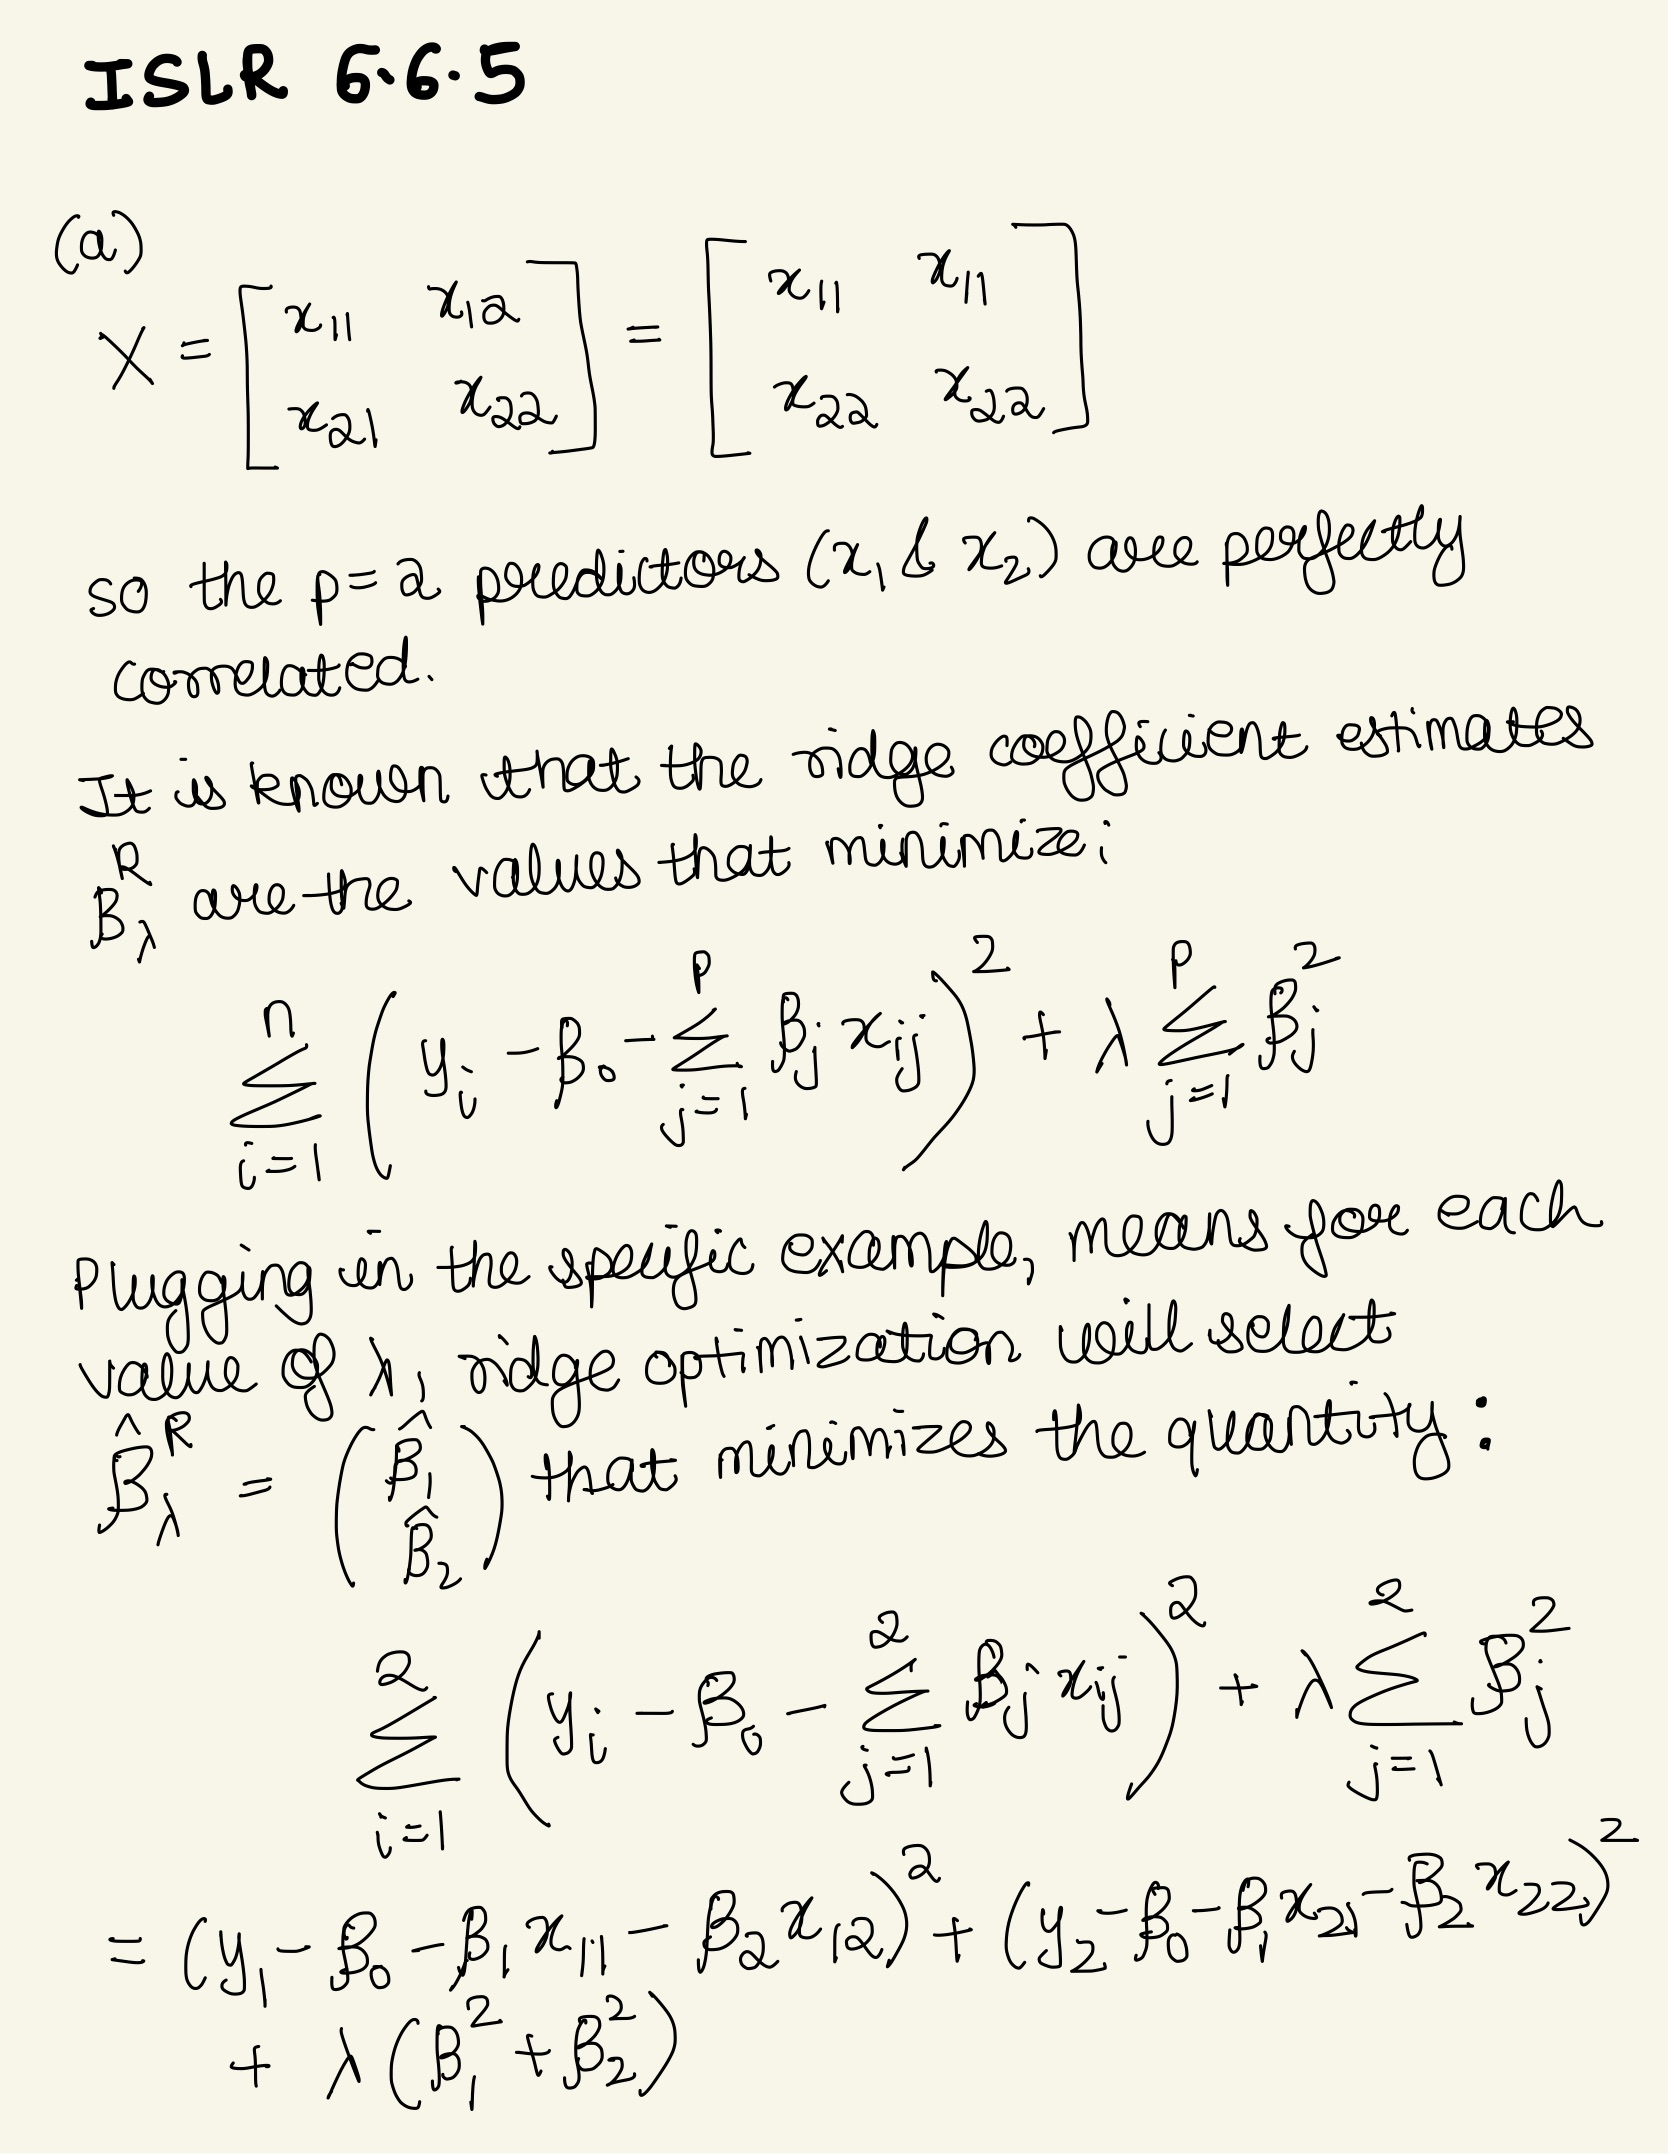

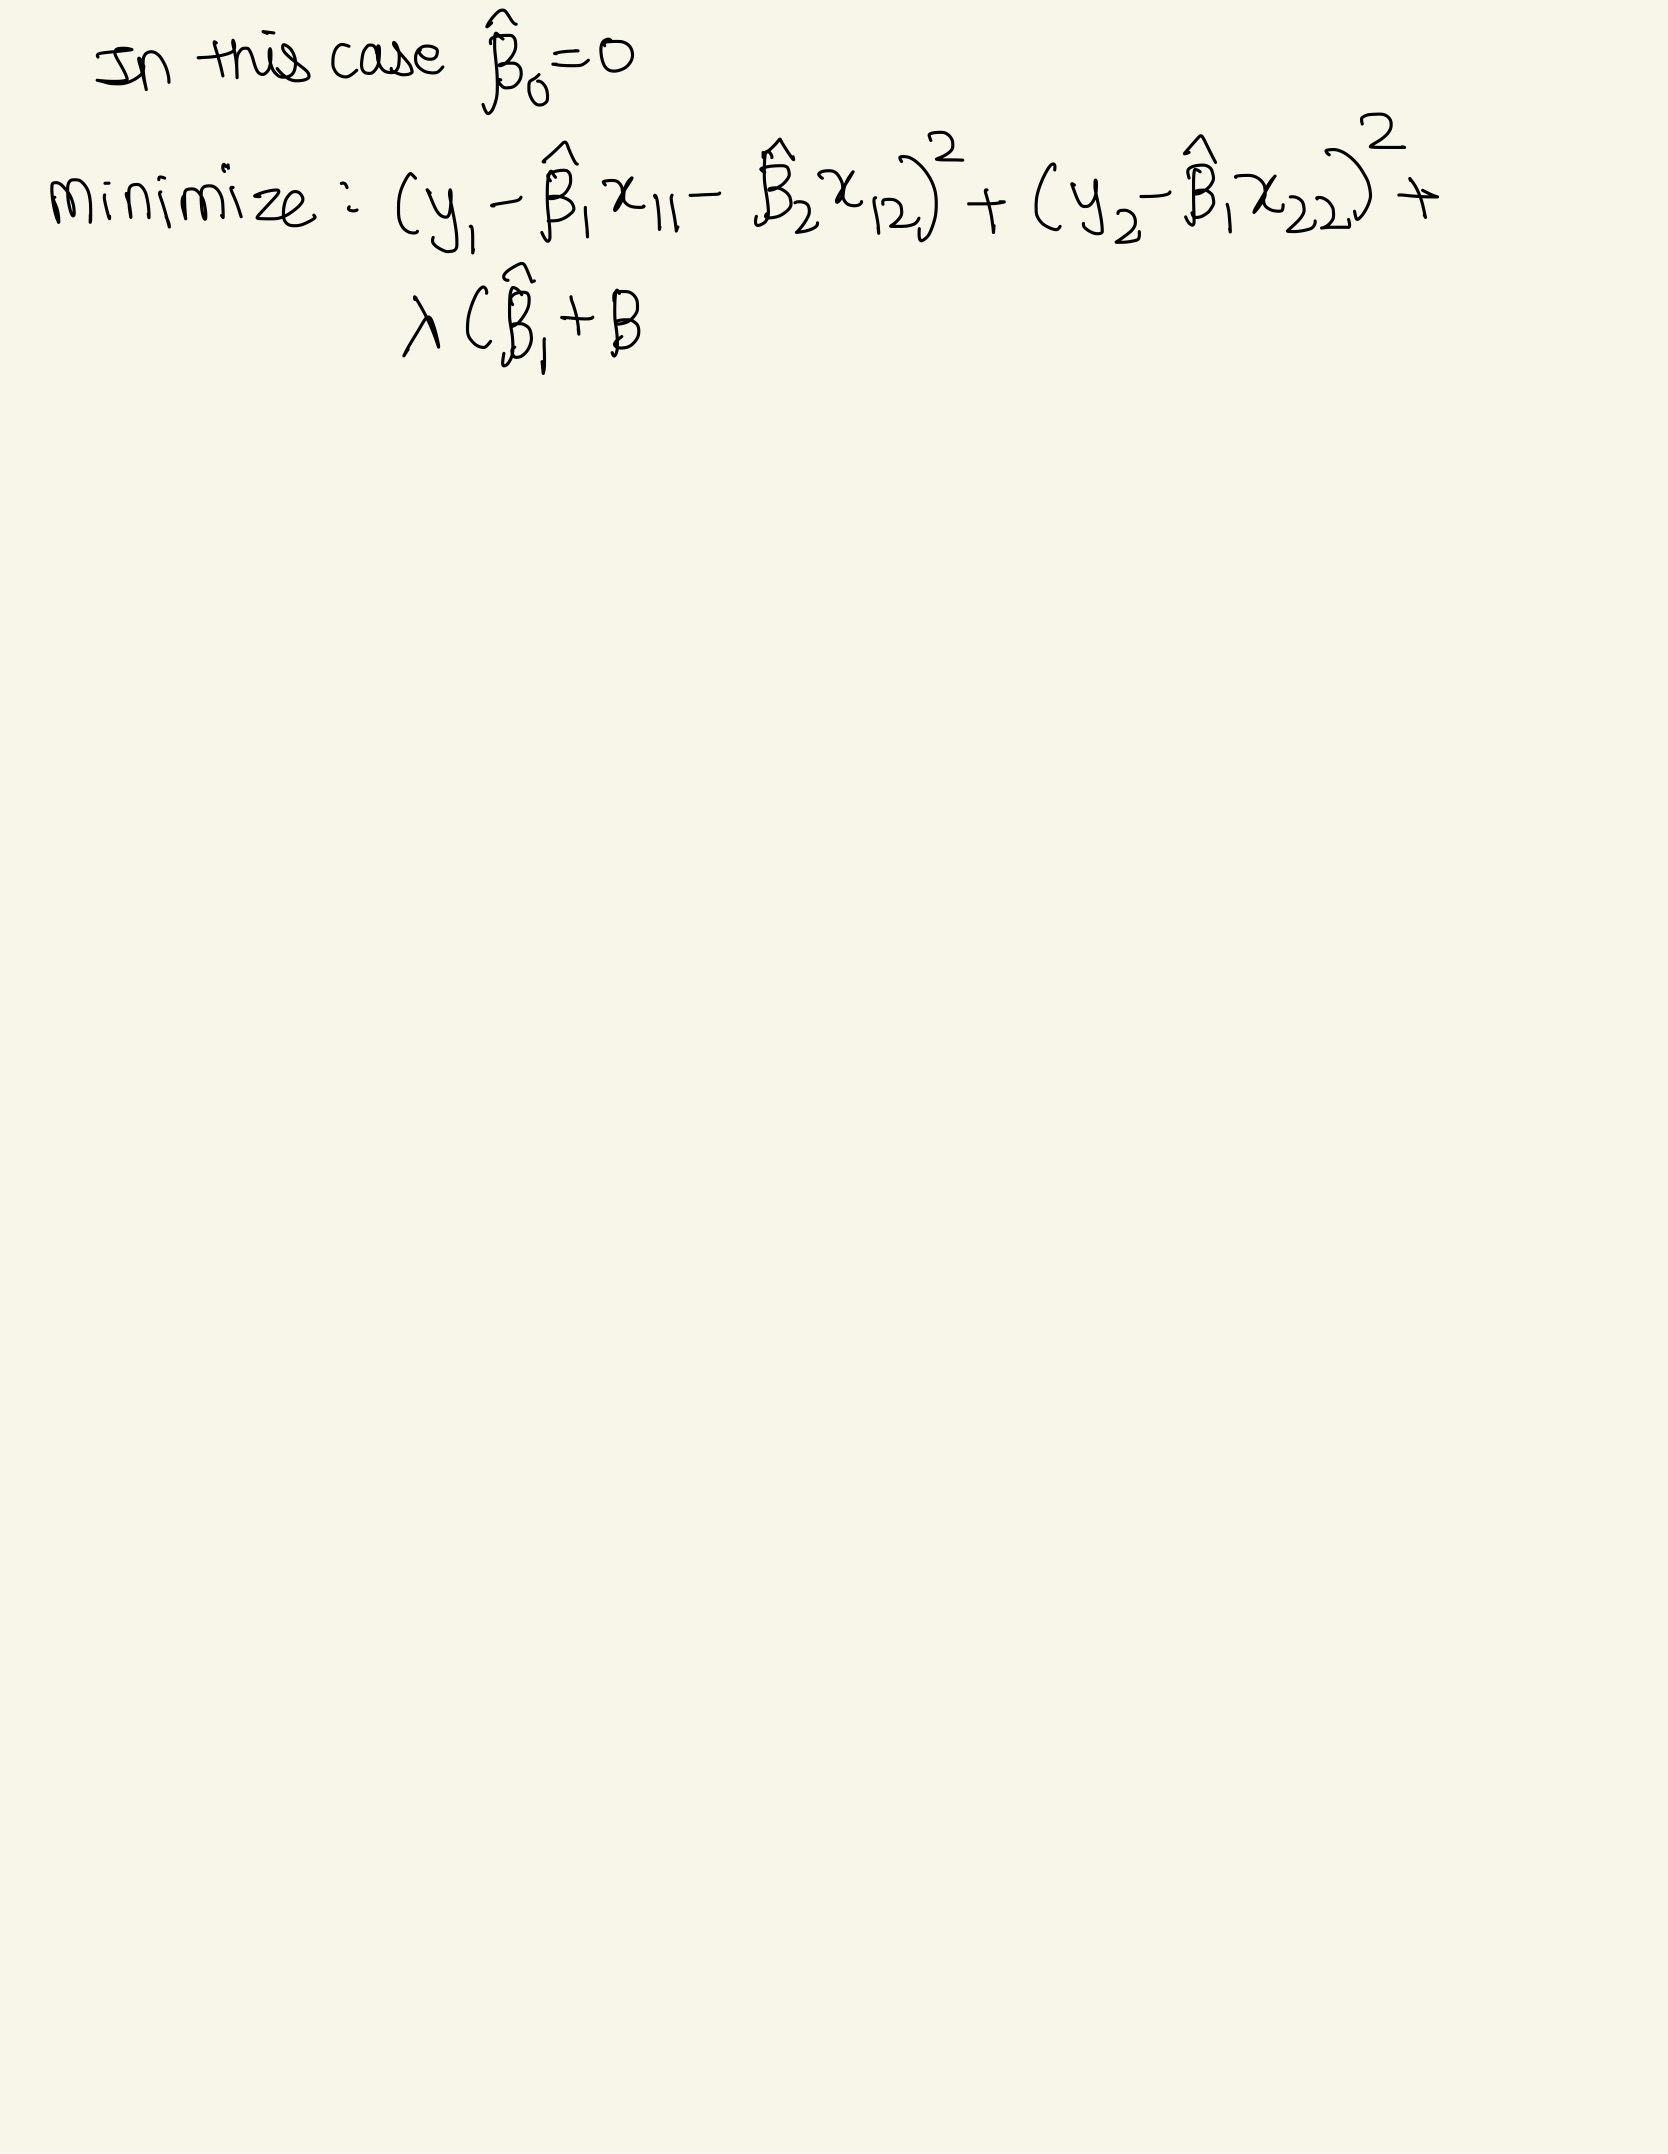

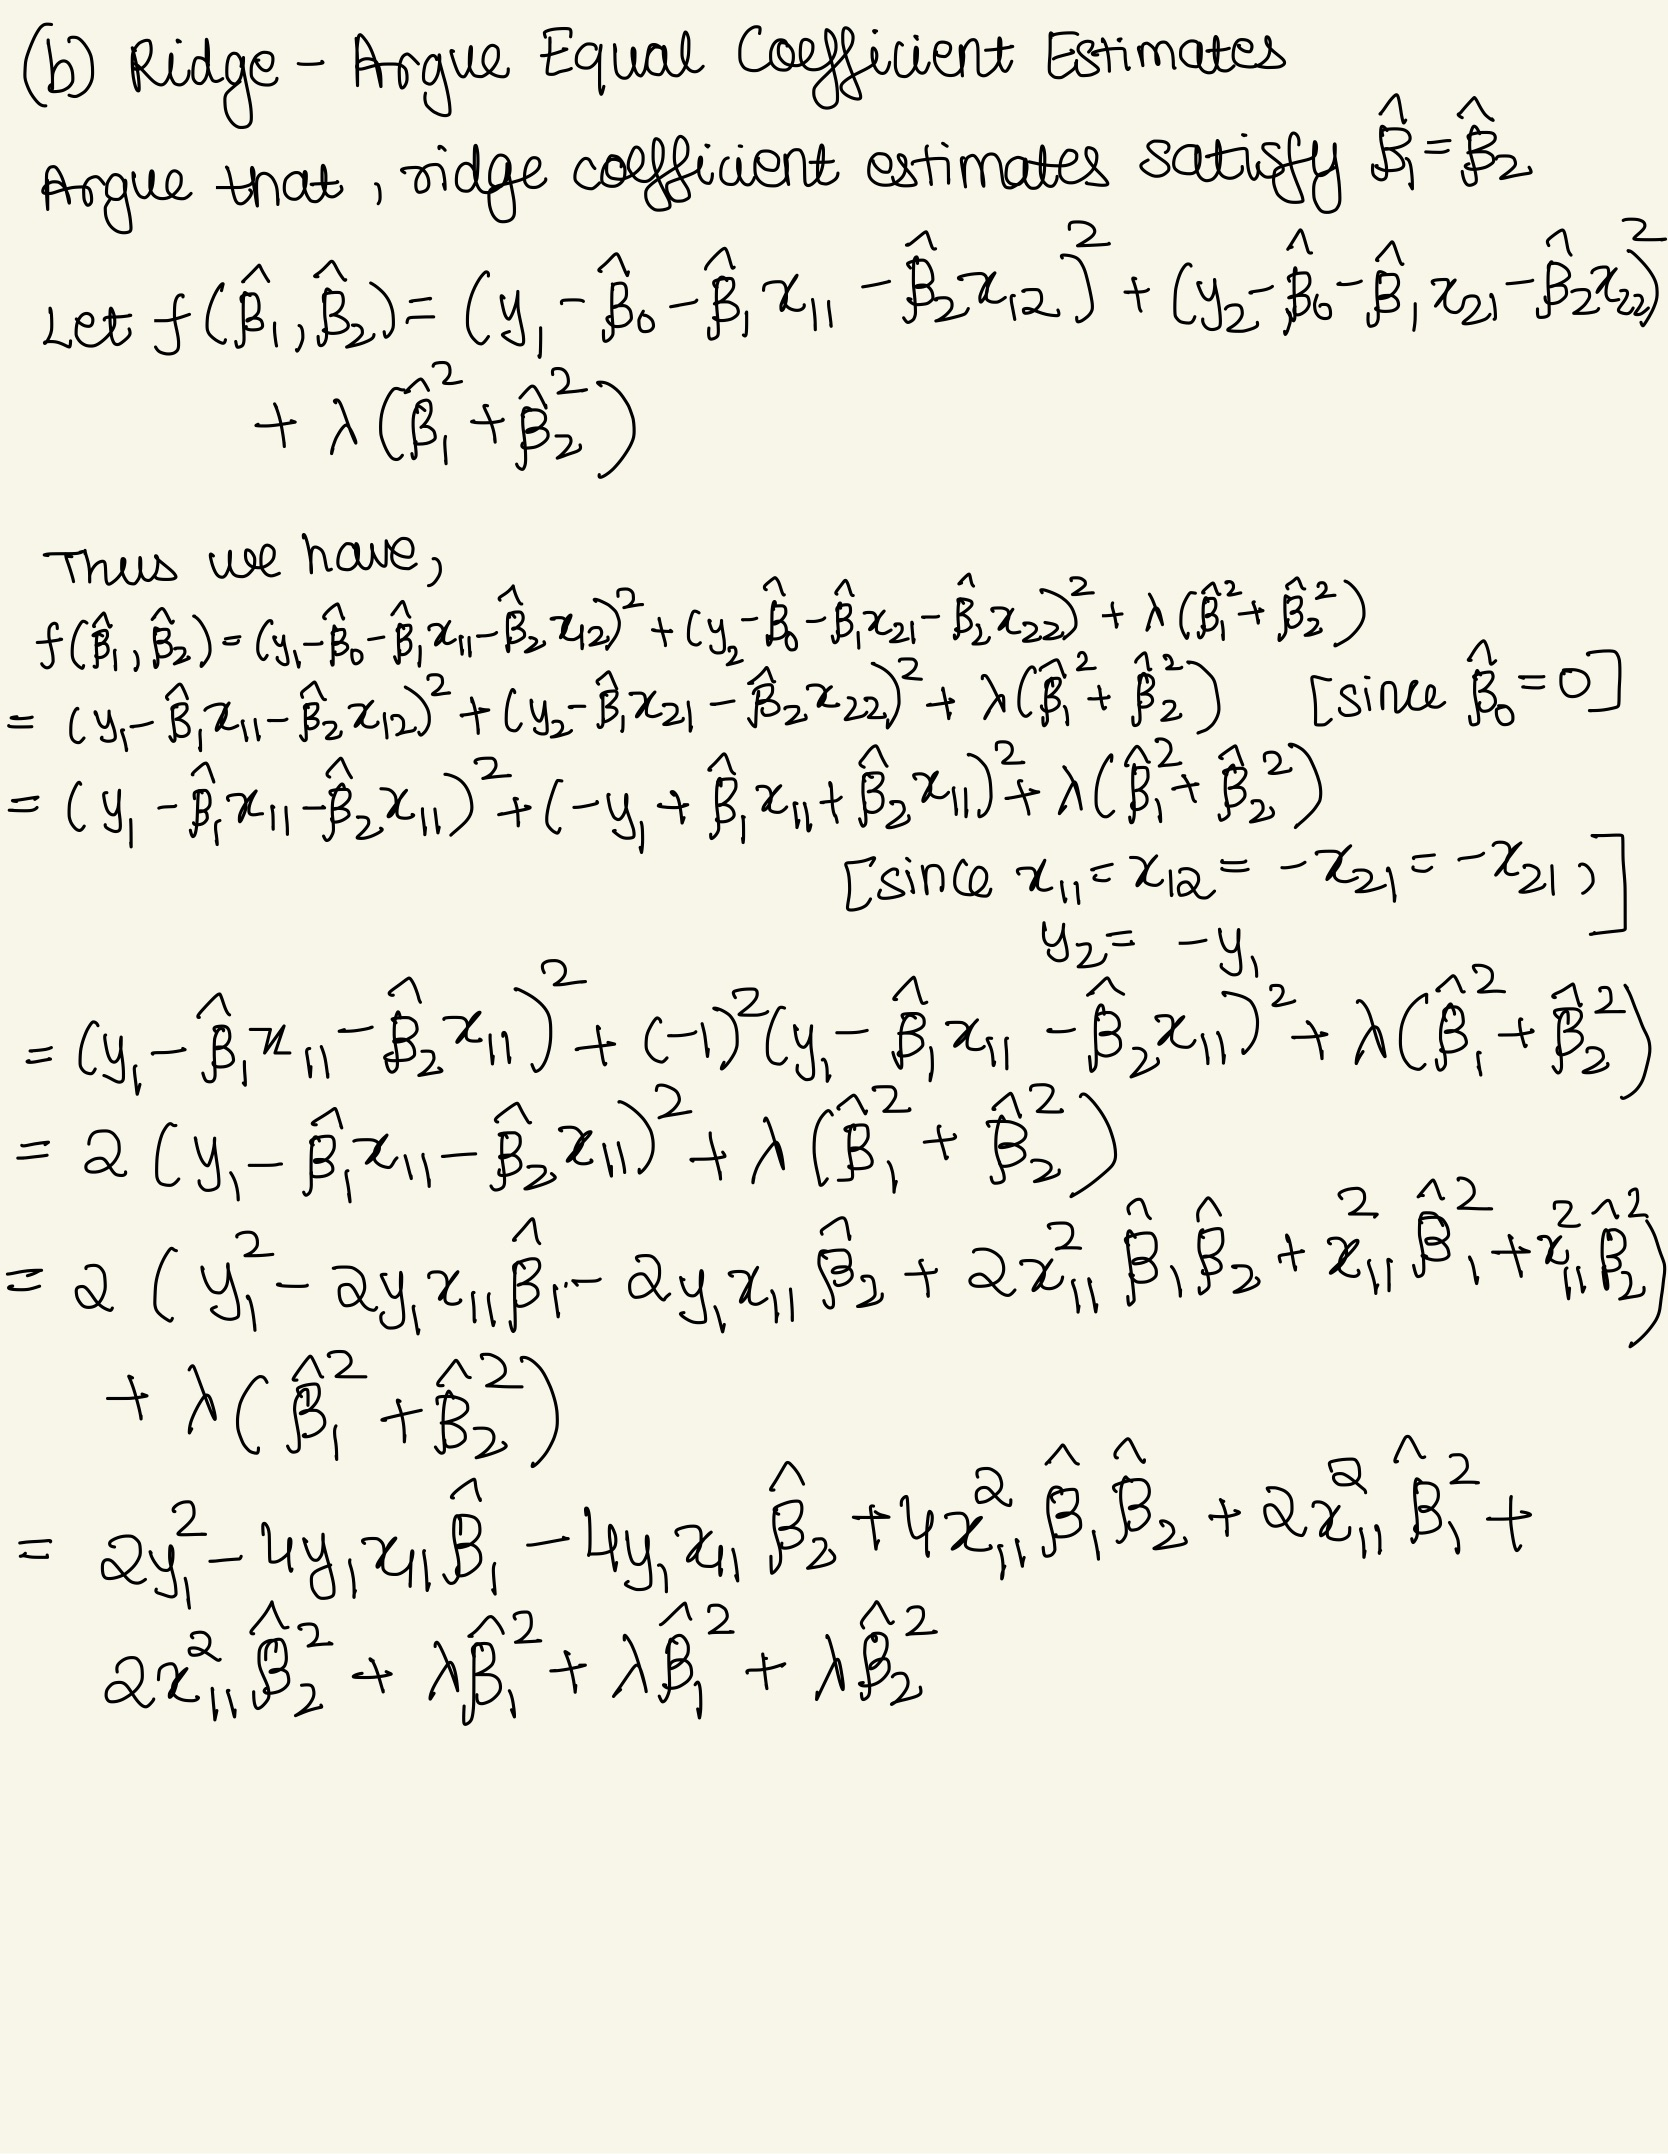

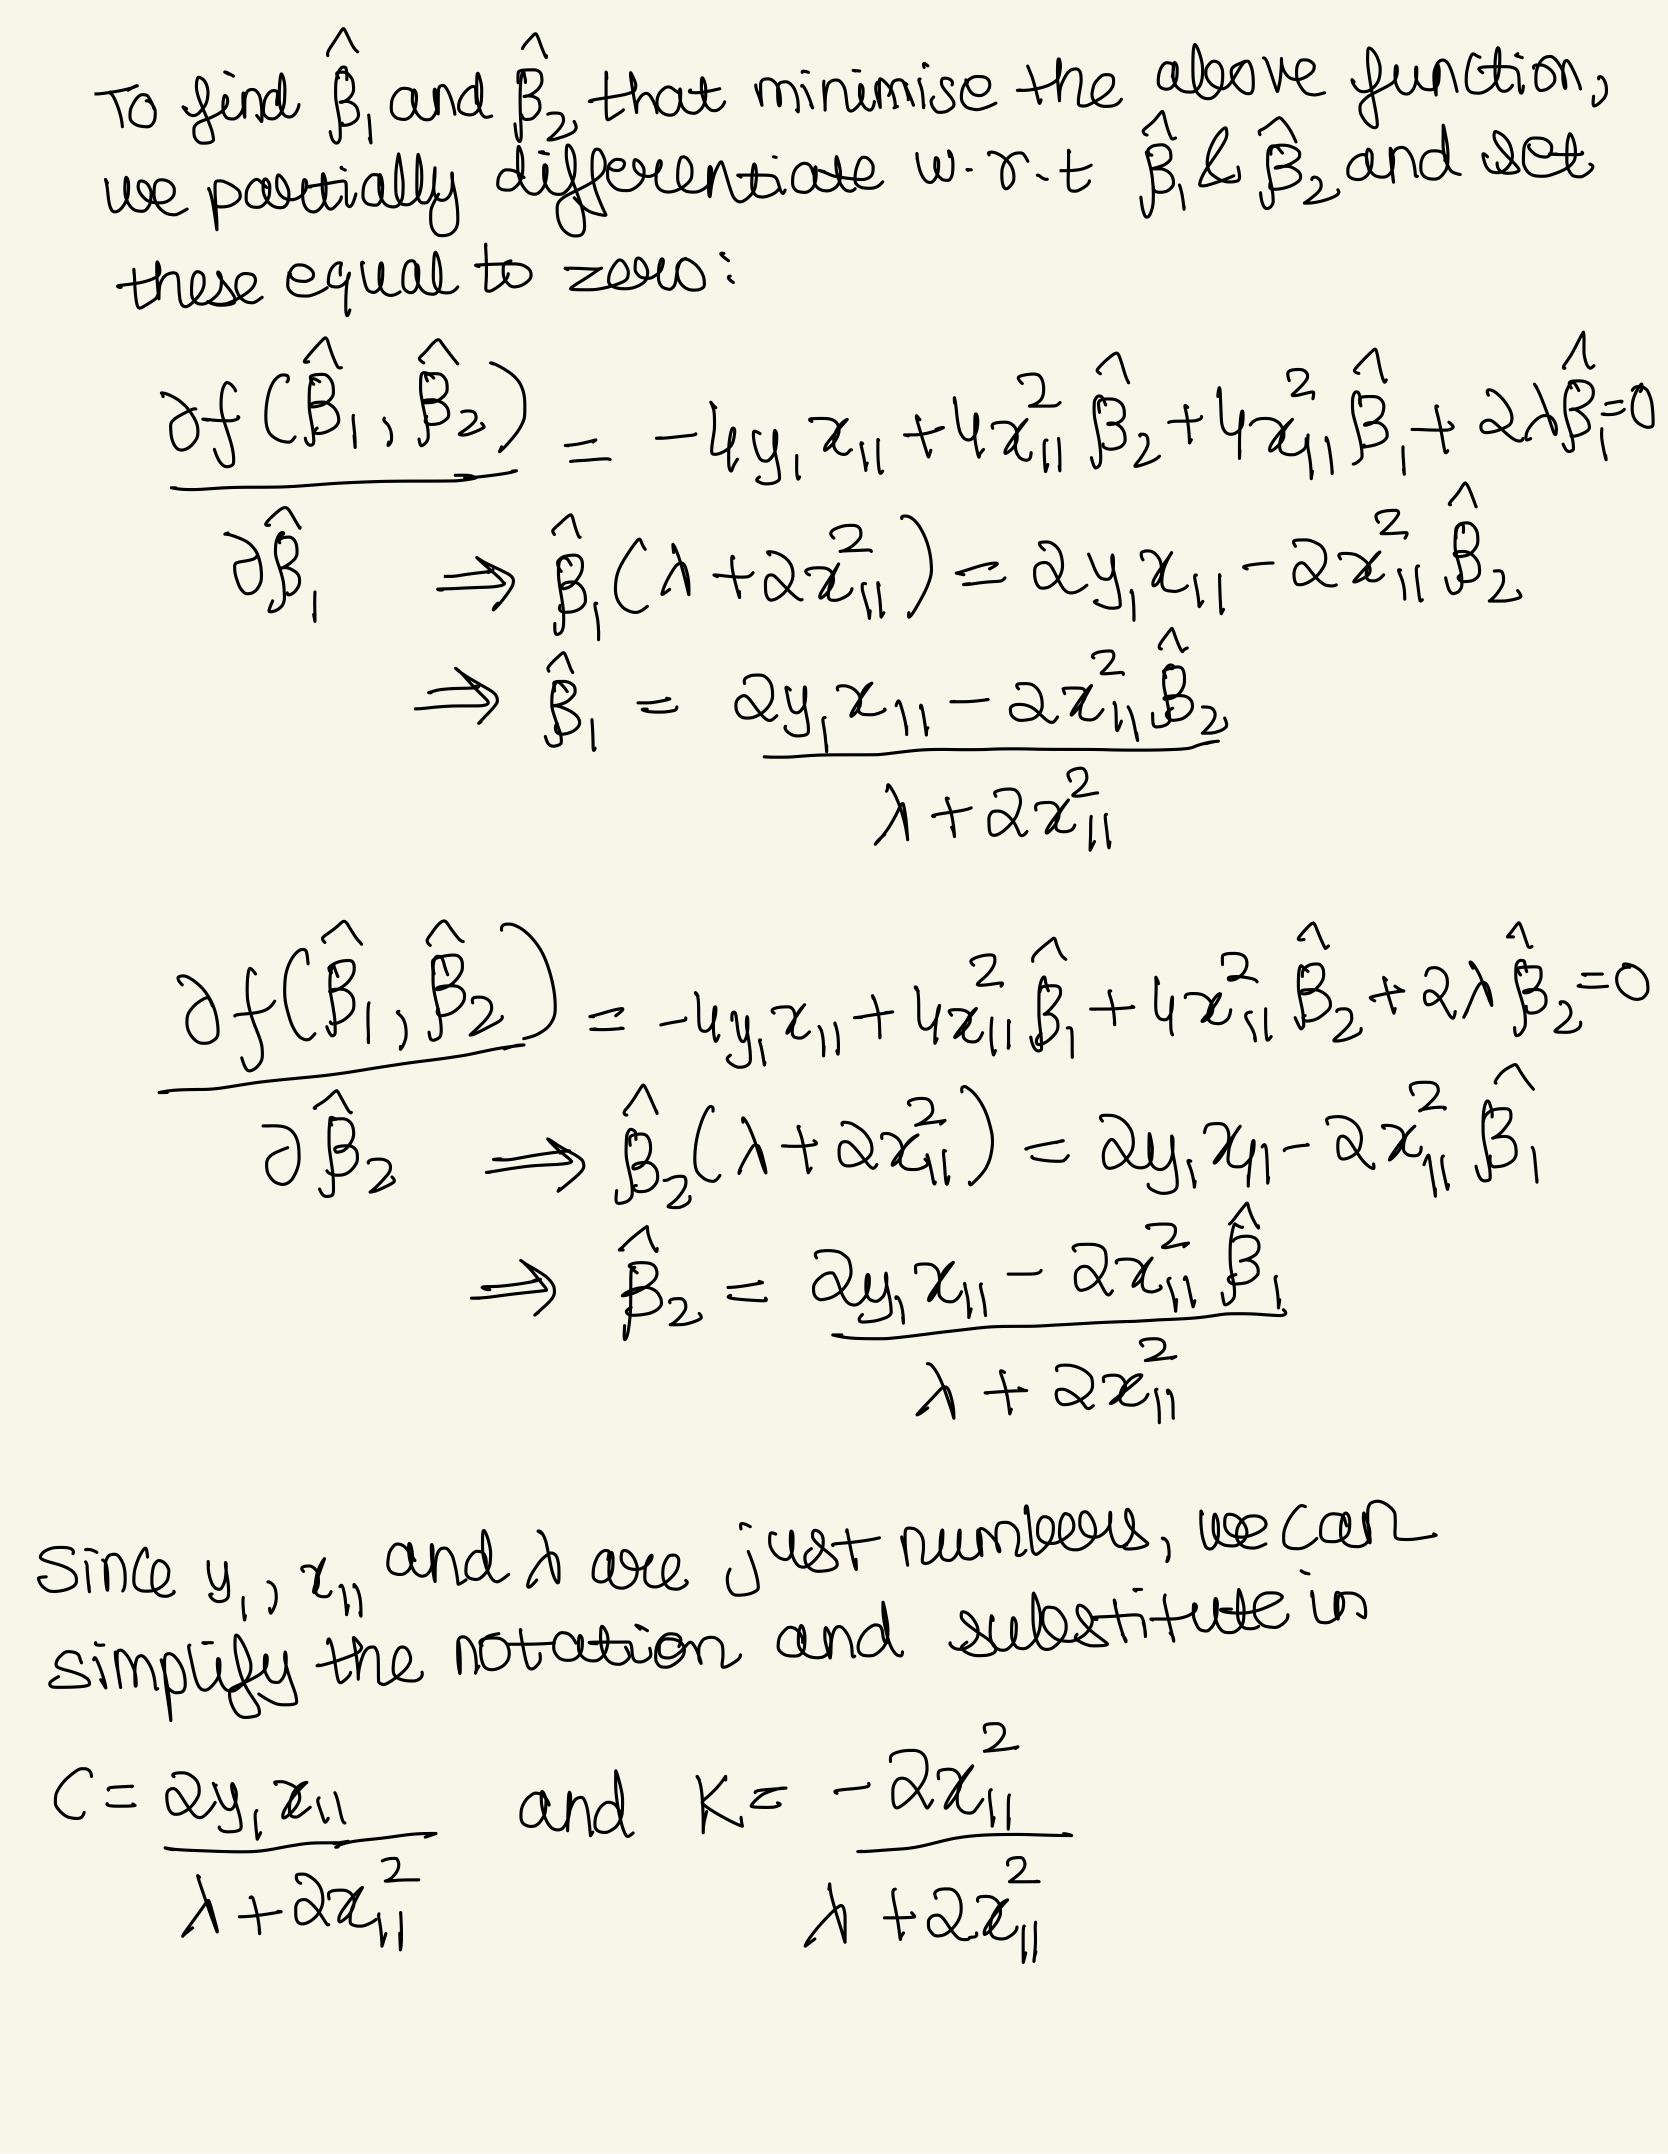

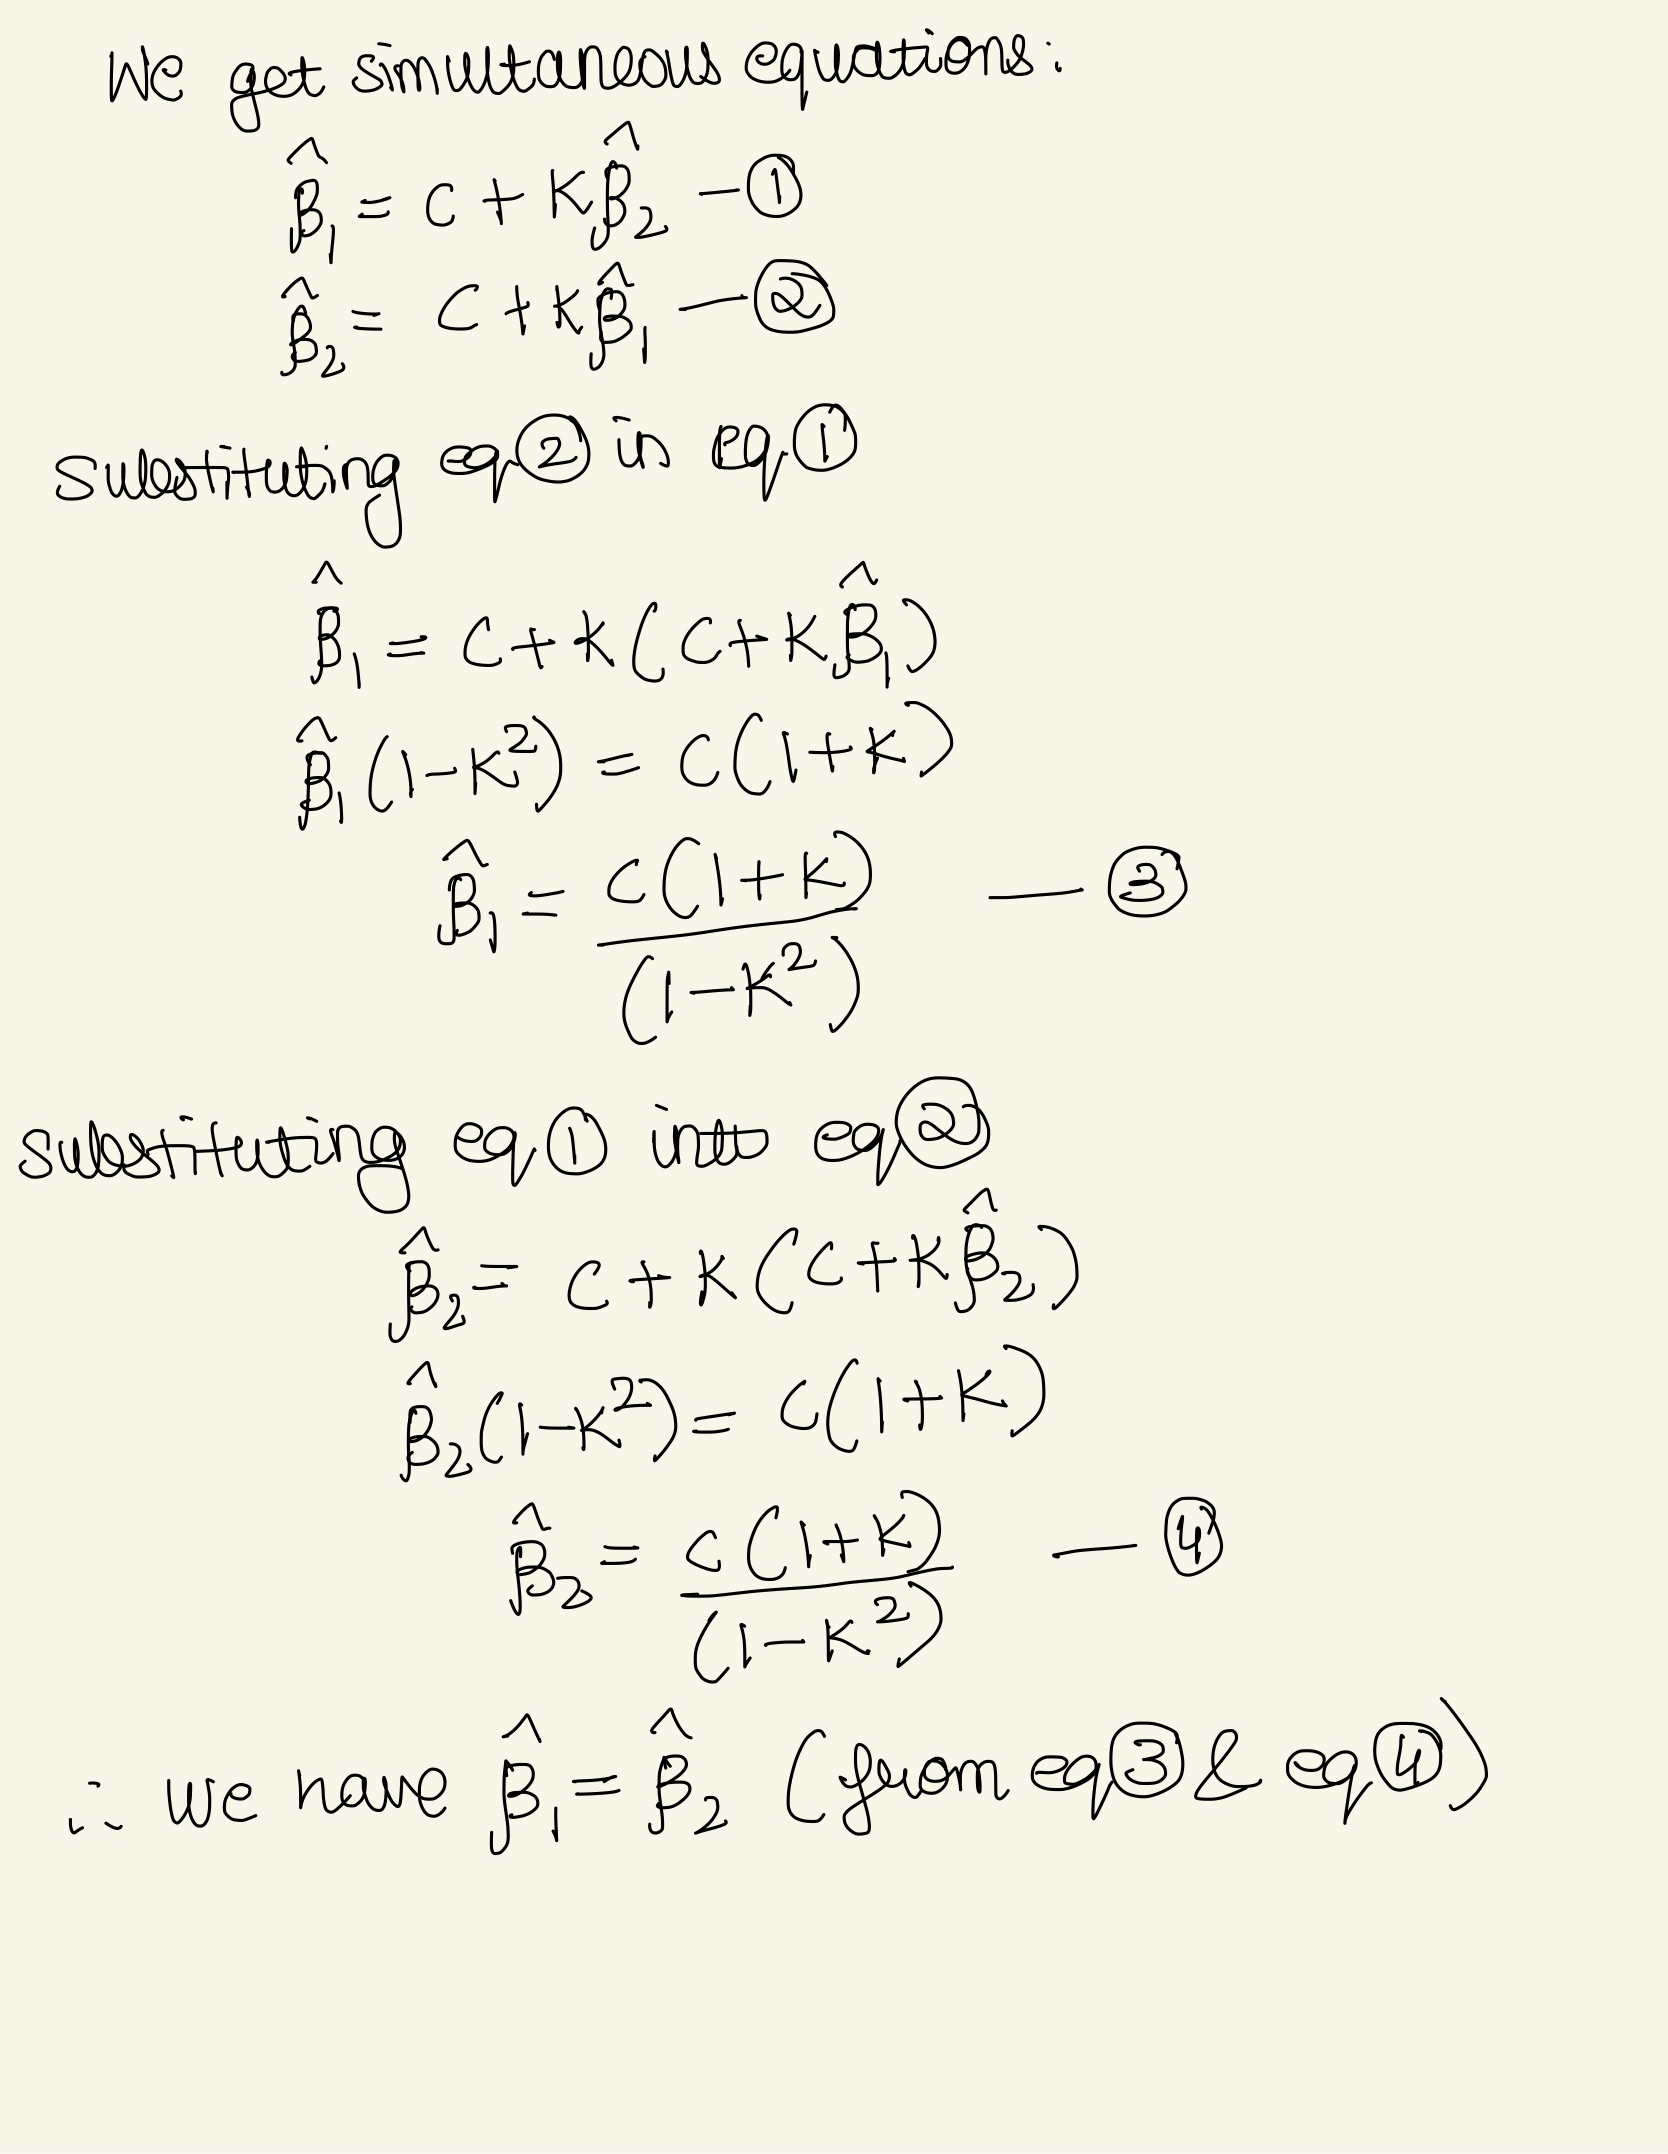

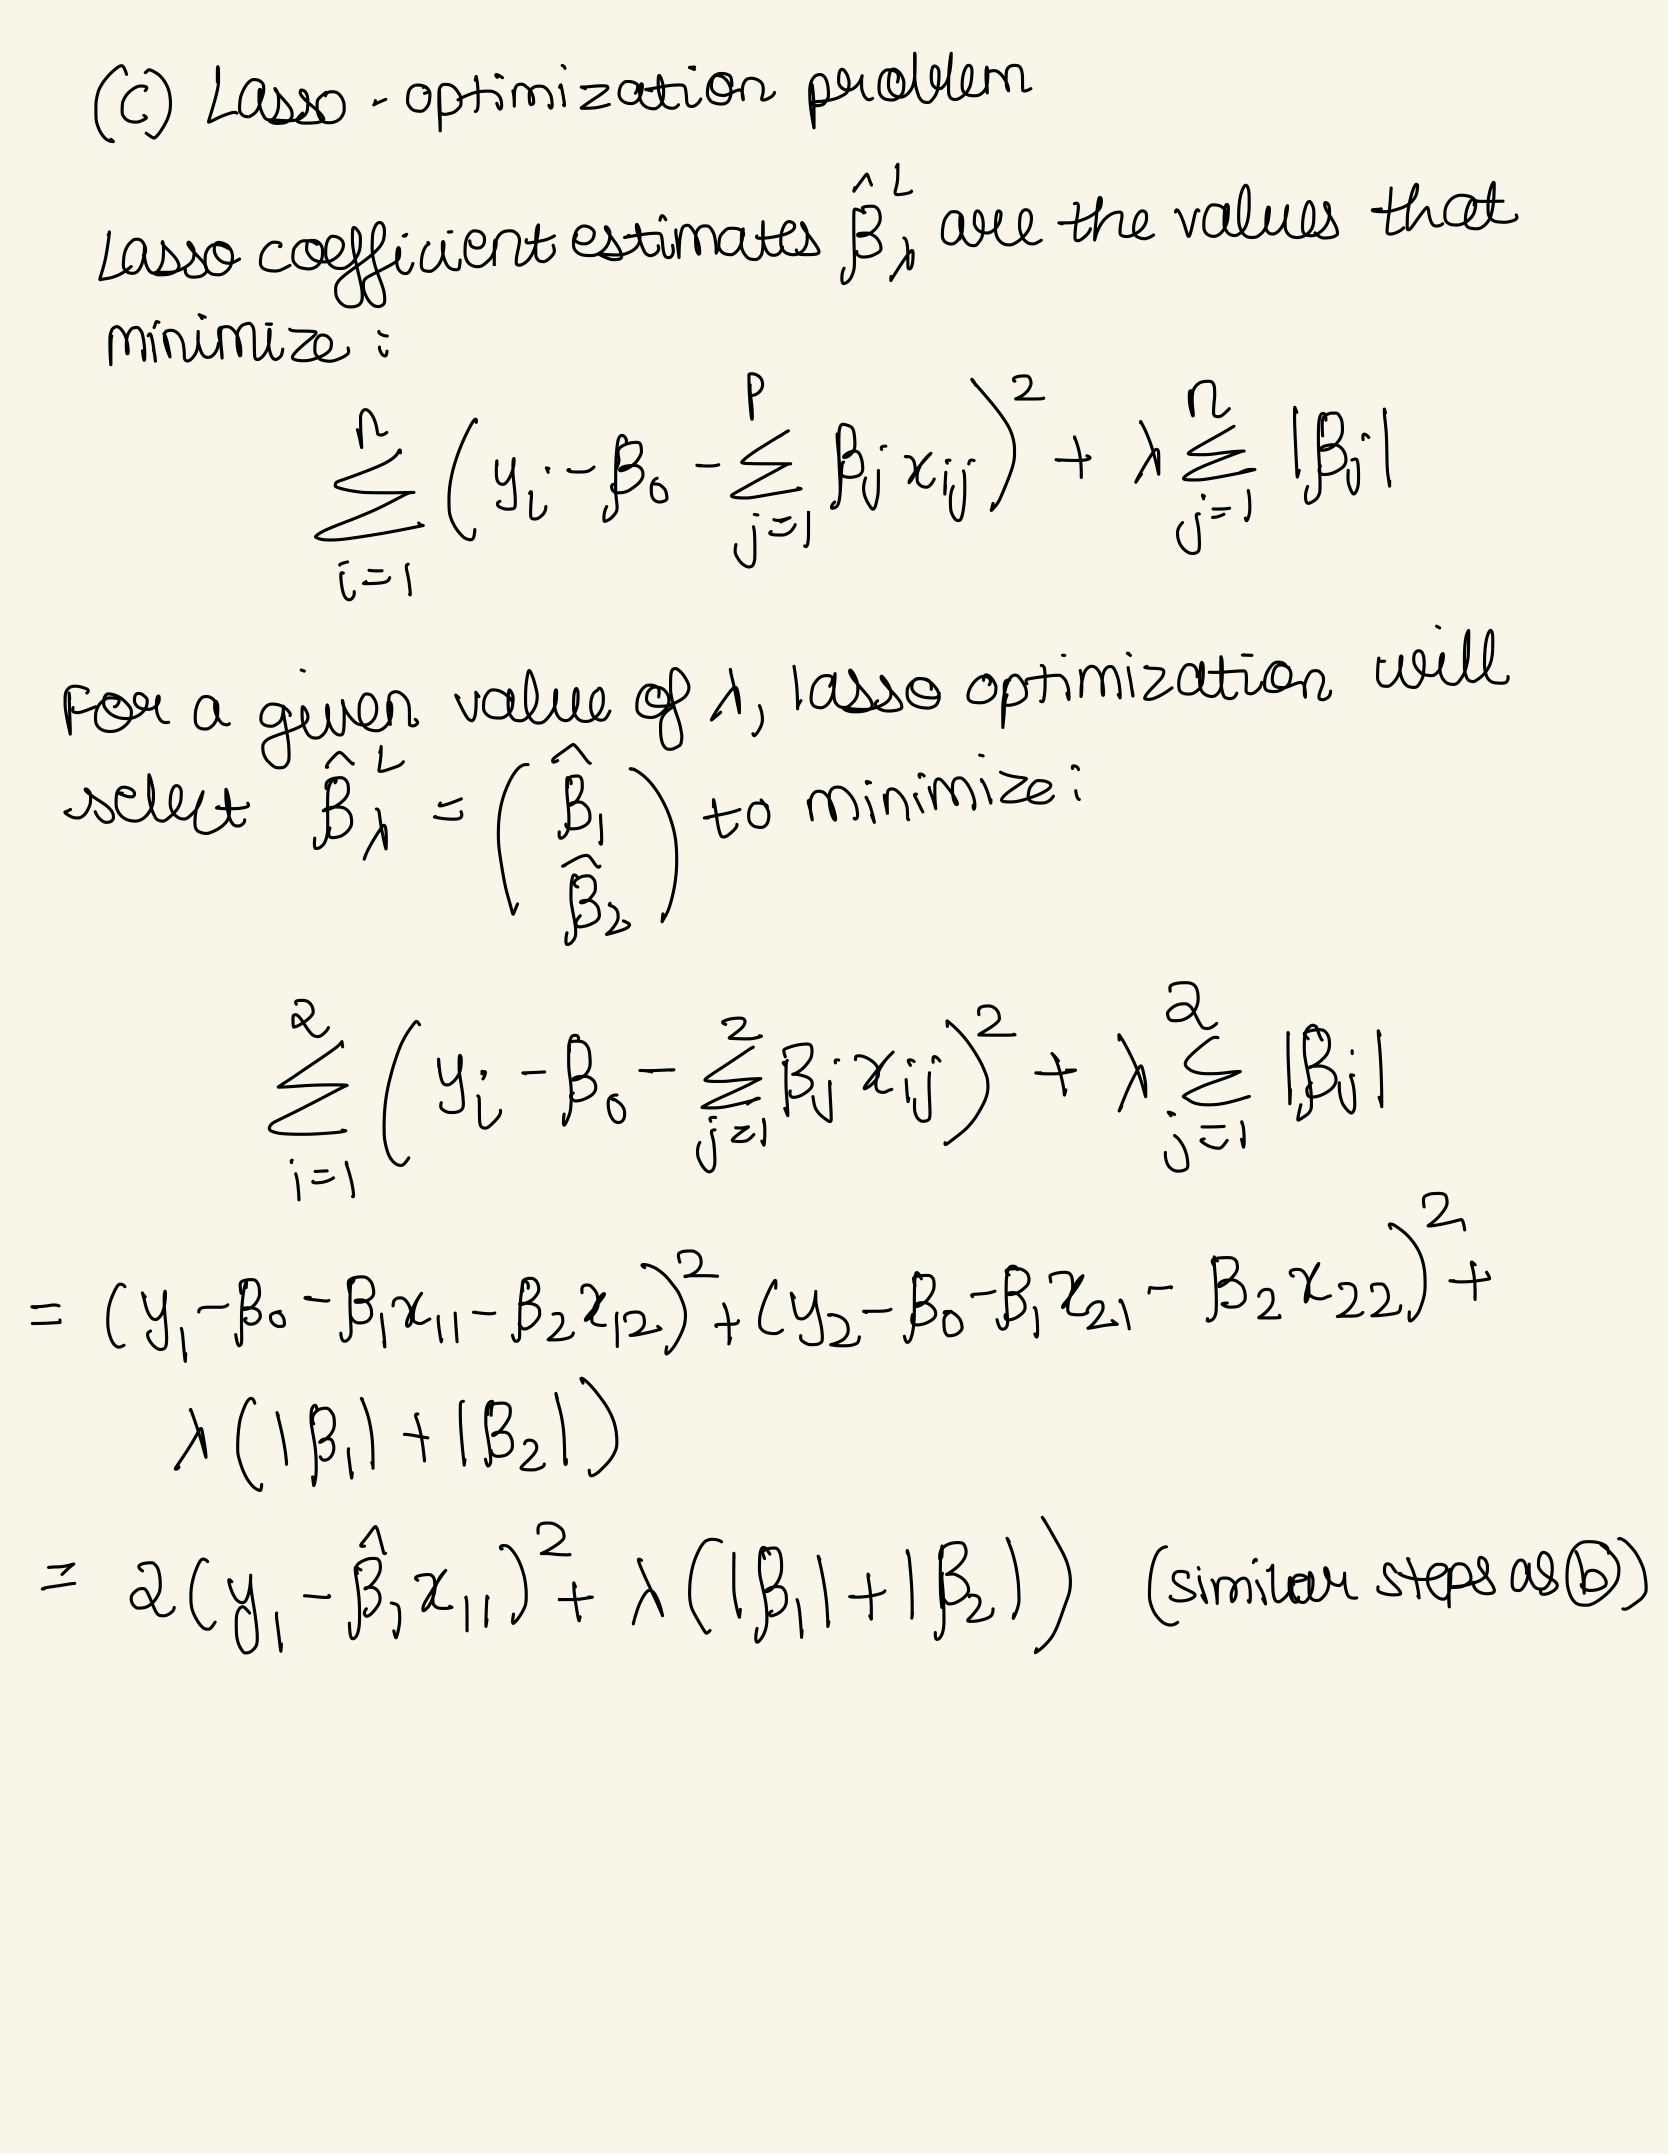

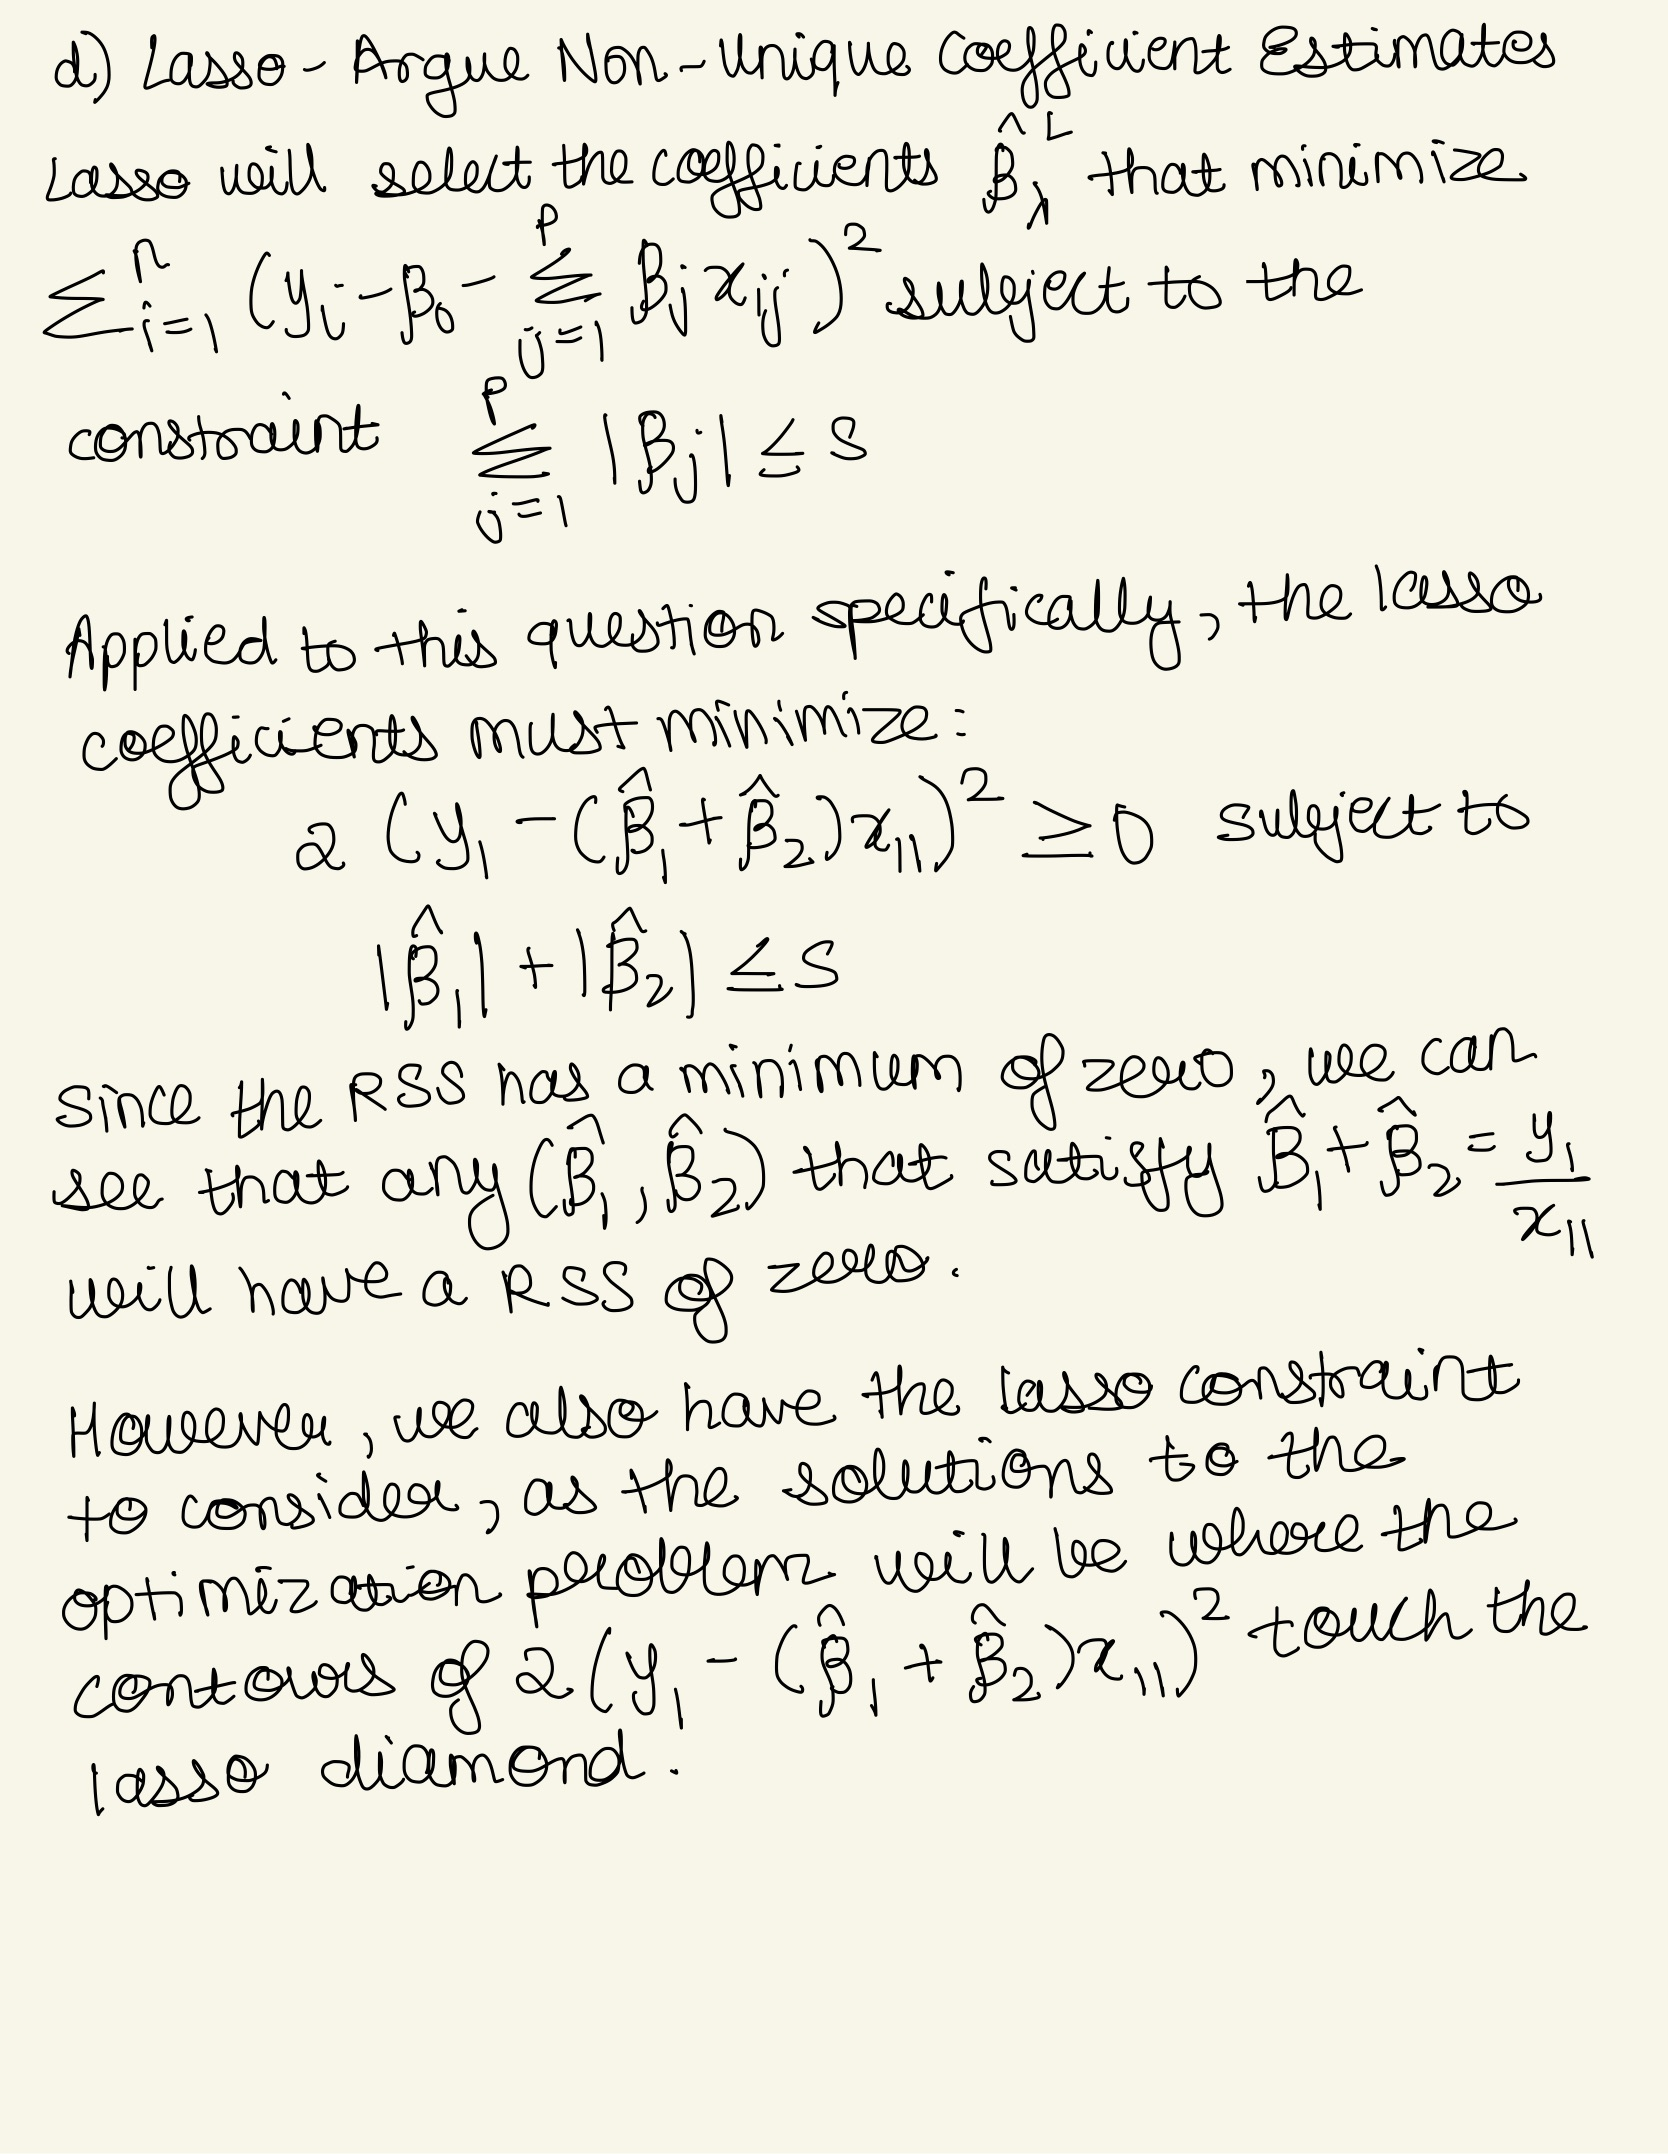

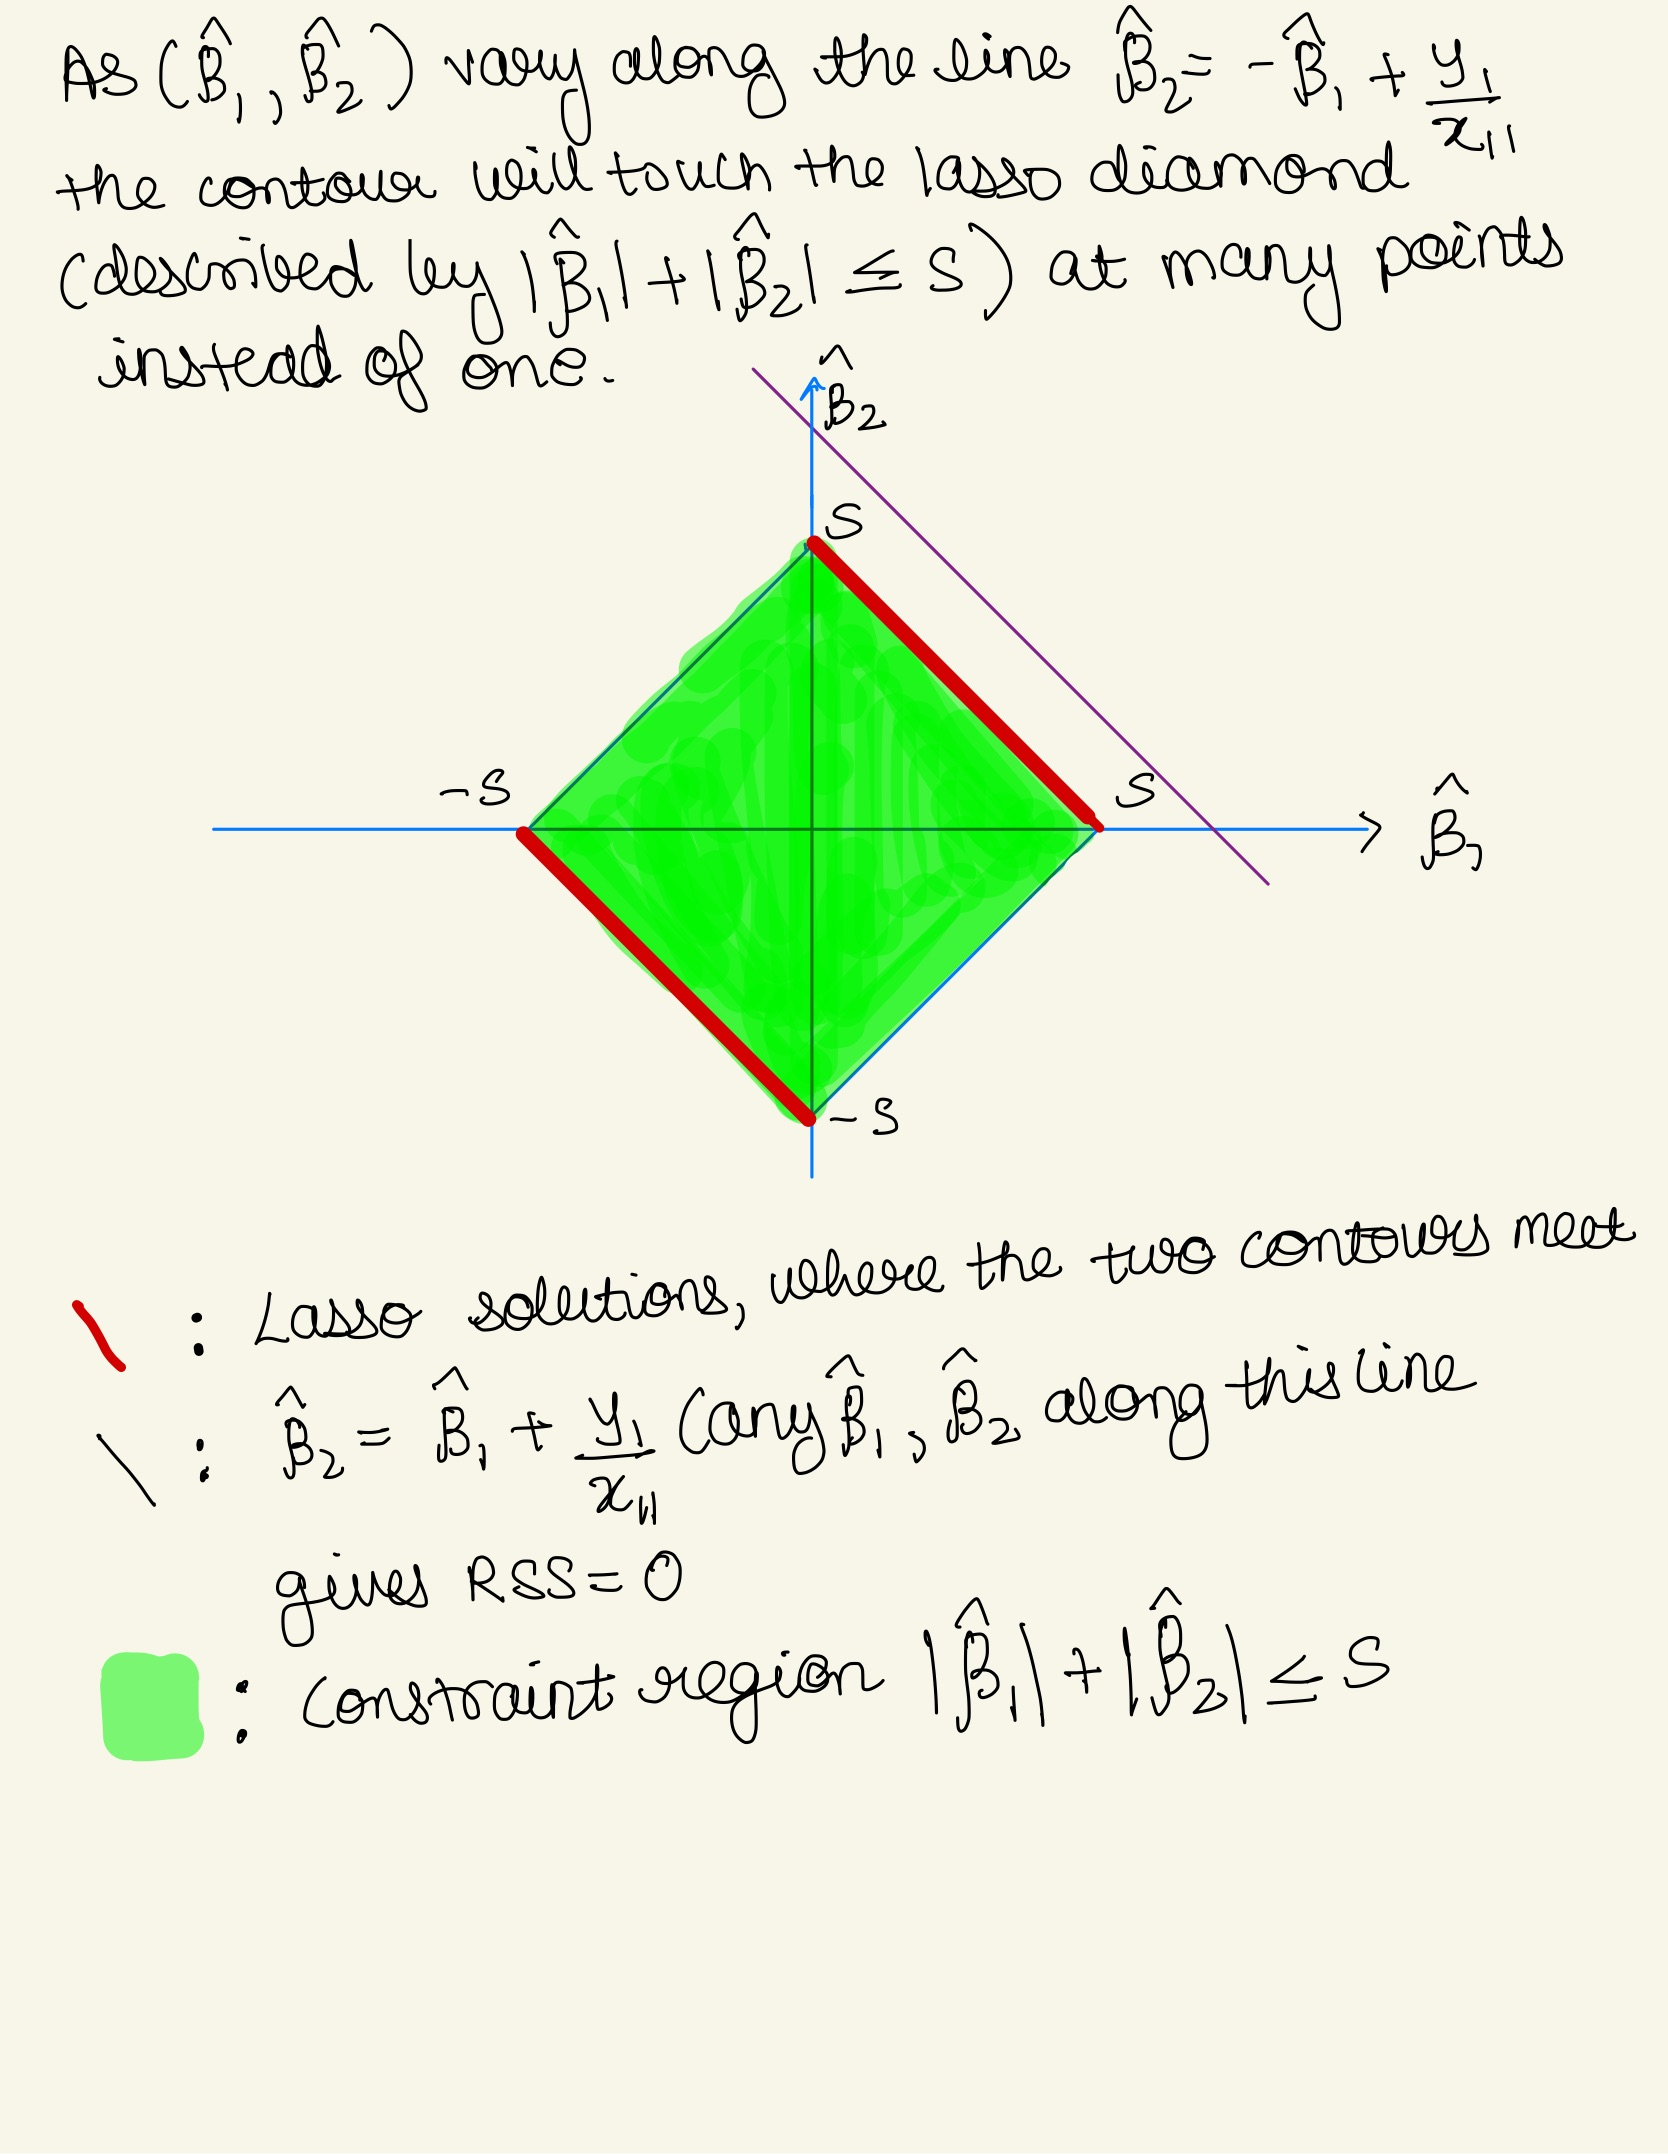

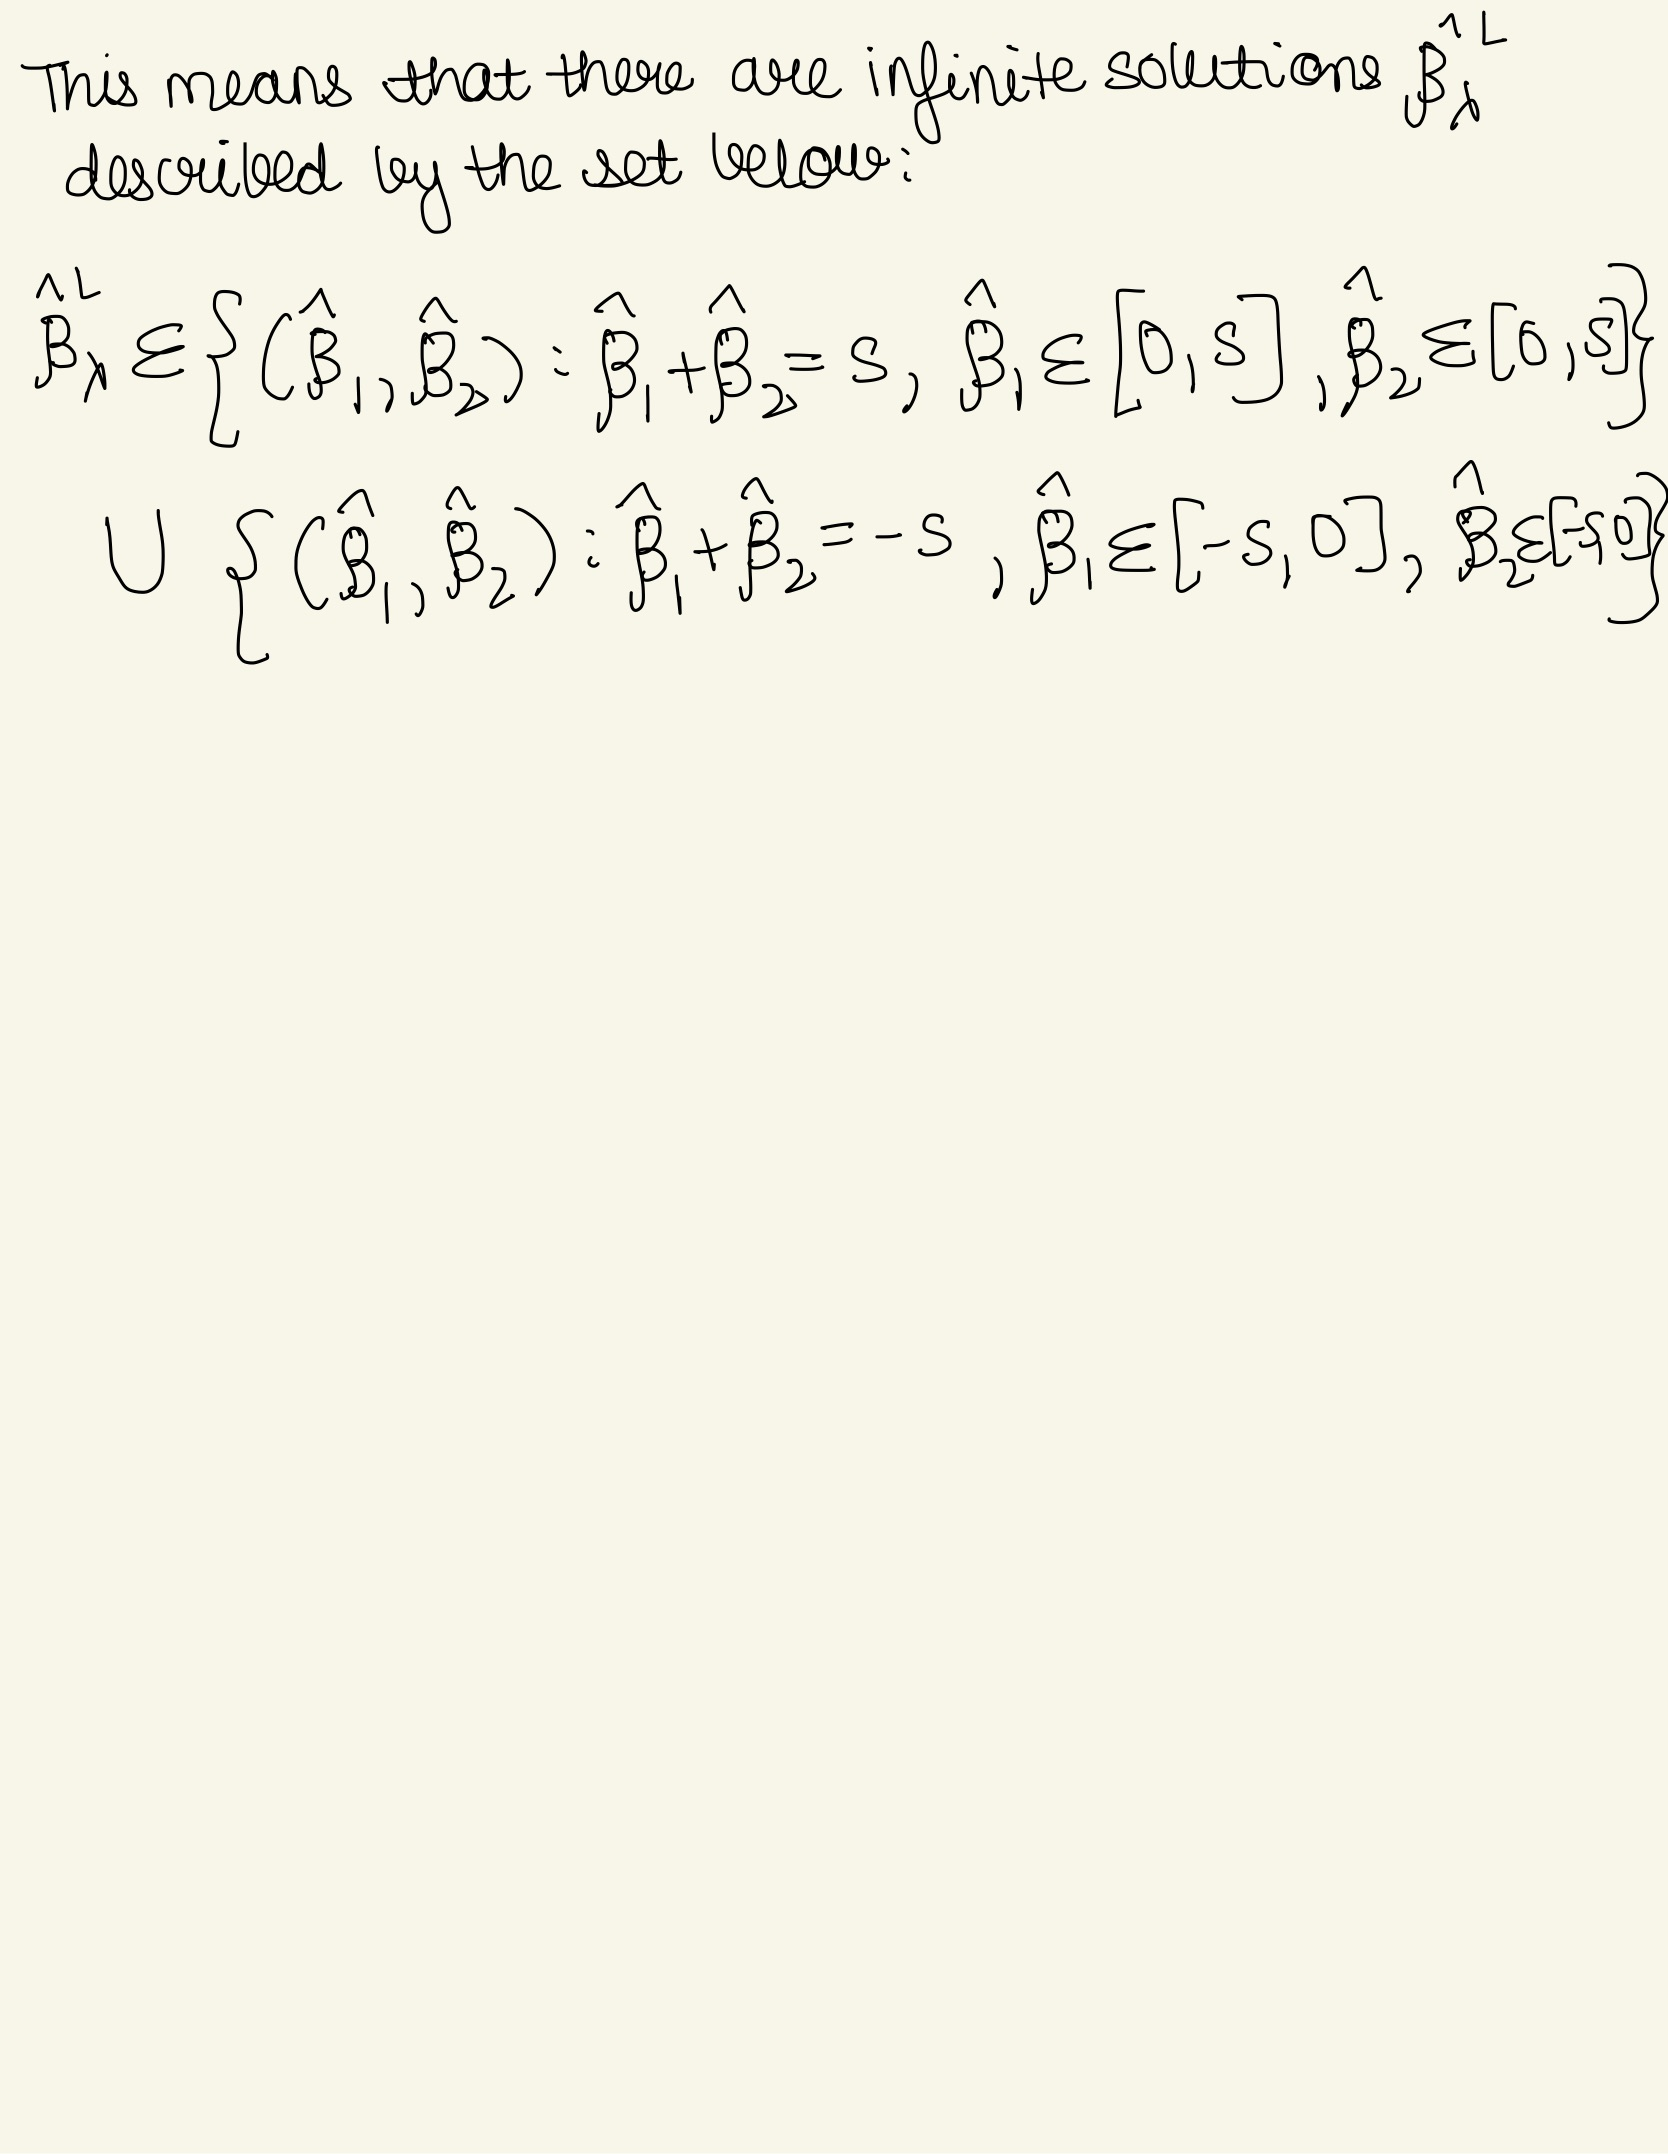

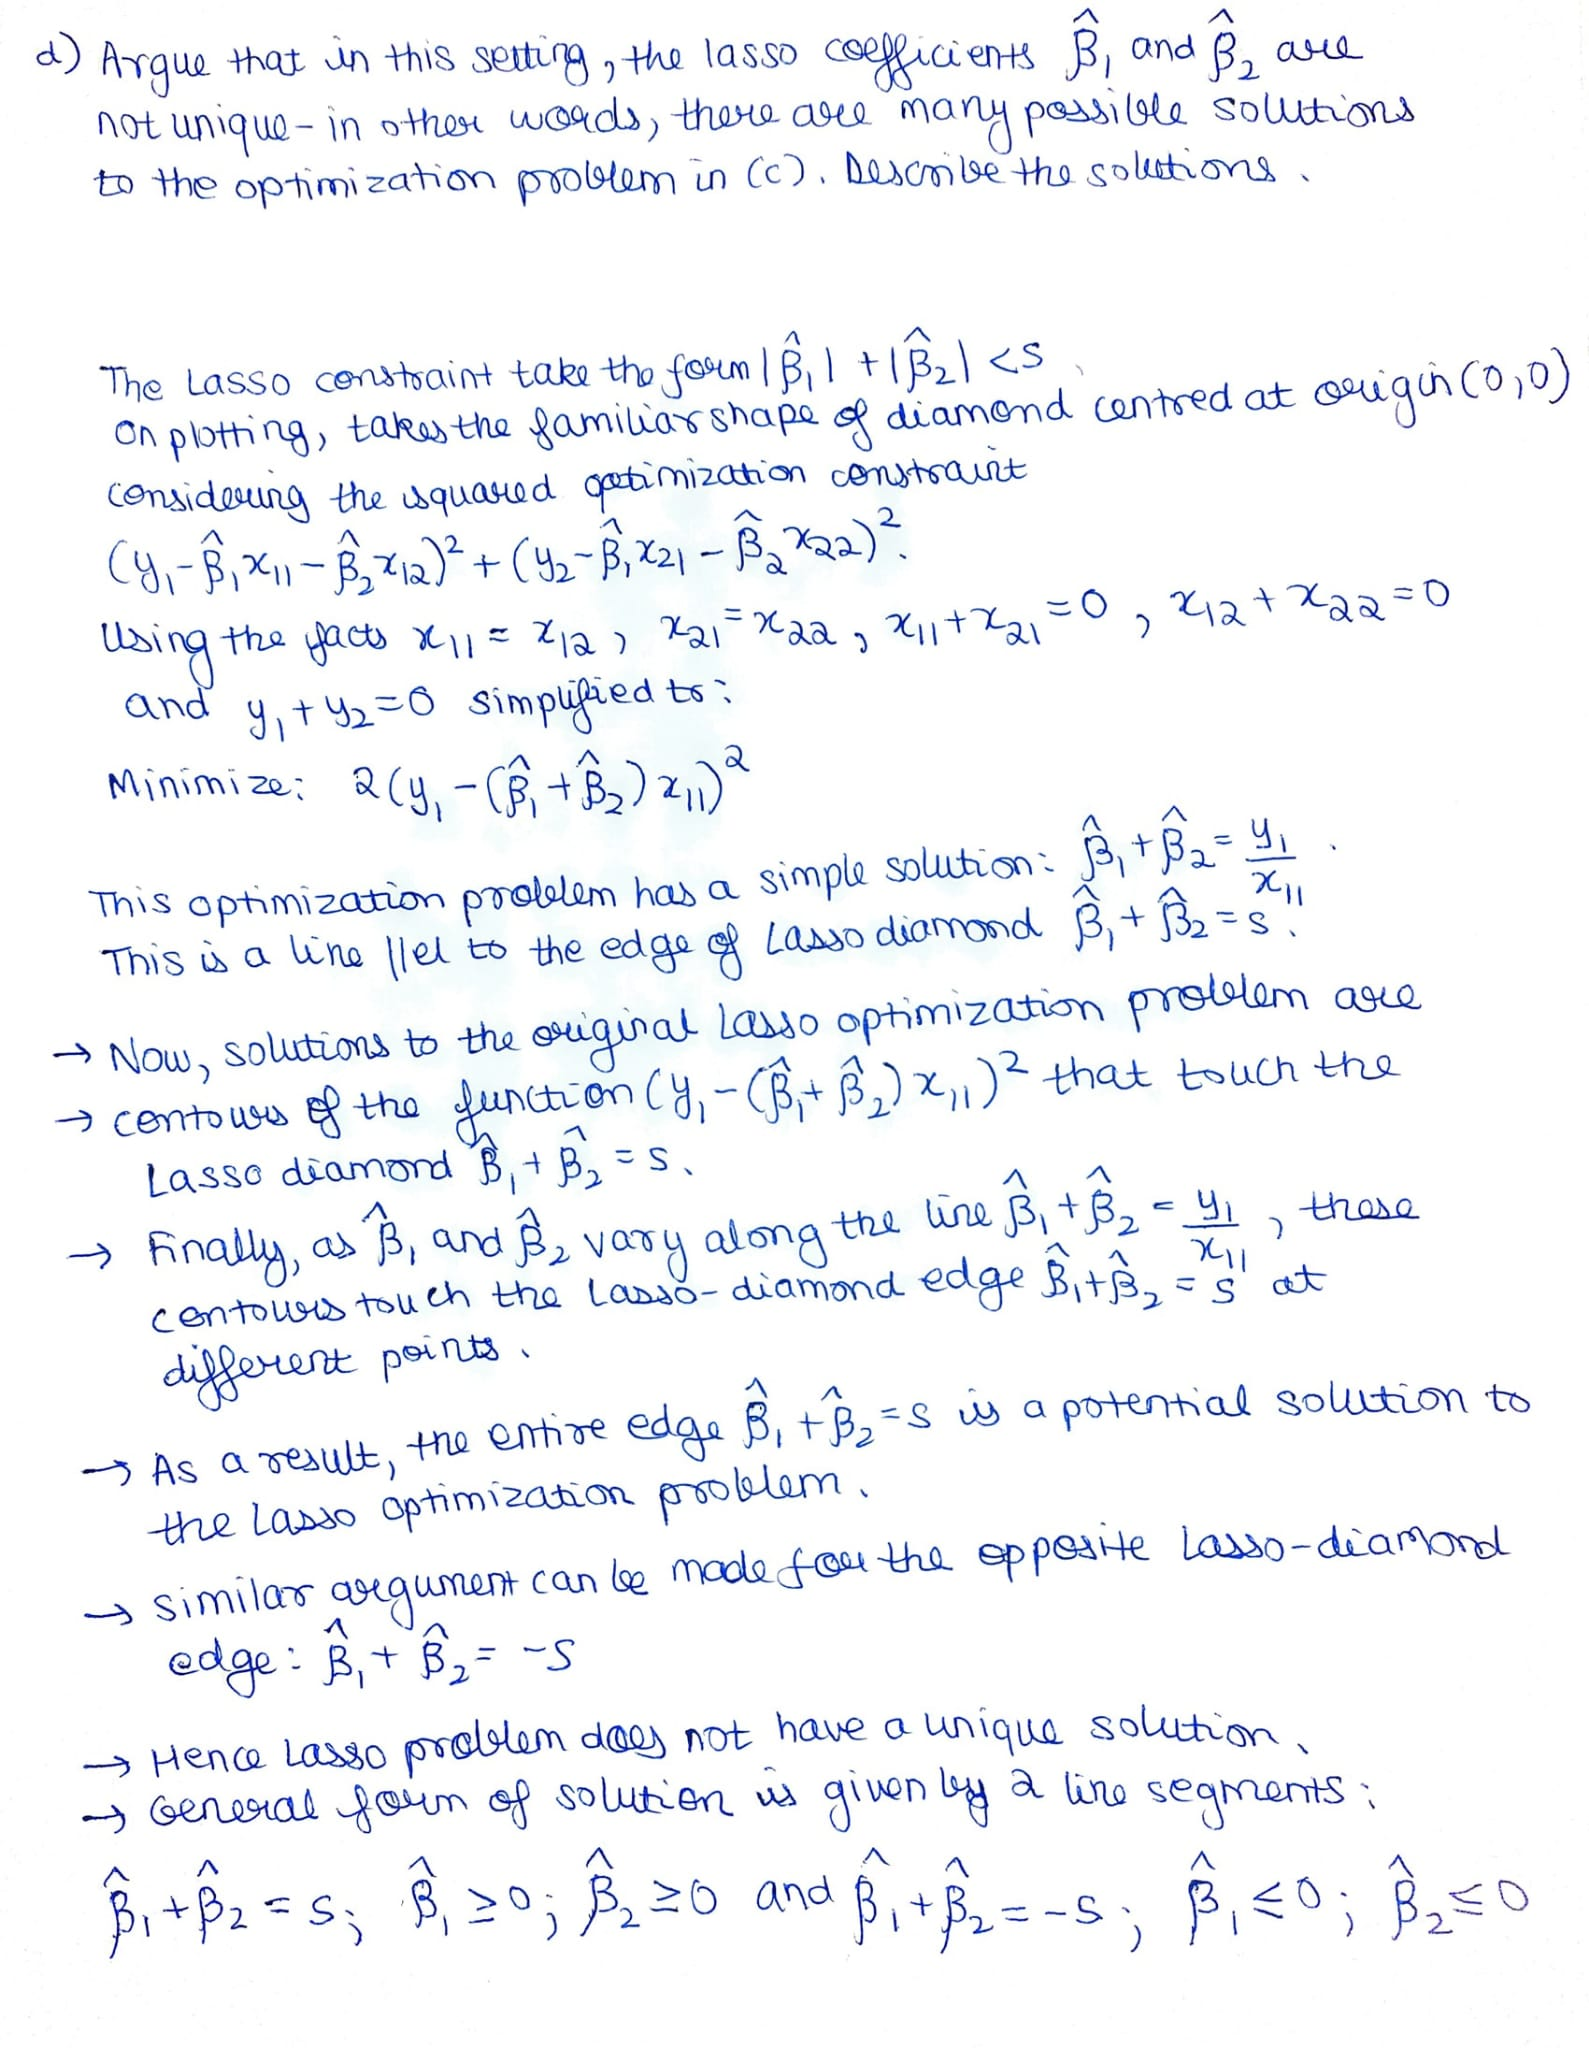

## 4. ISLR 8.4.5

**Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):
0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7, and0.75.
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?**

Solution:

In the case of majority polling, number of red samples (6) is greater than the green samples (4).
Hence the result will be Red.


In the case of average probability method, a mean of 0.45 for Red and 0.55 for Green causes the prediction result to be Green.

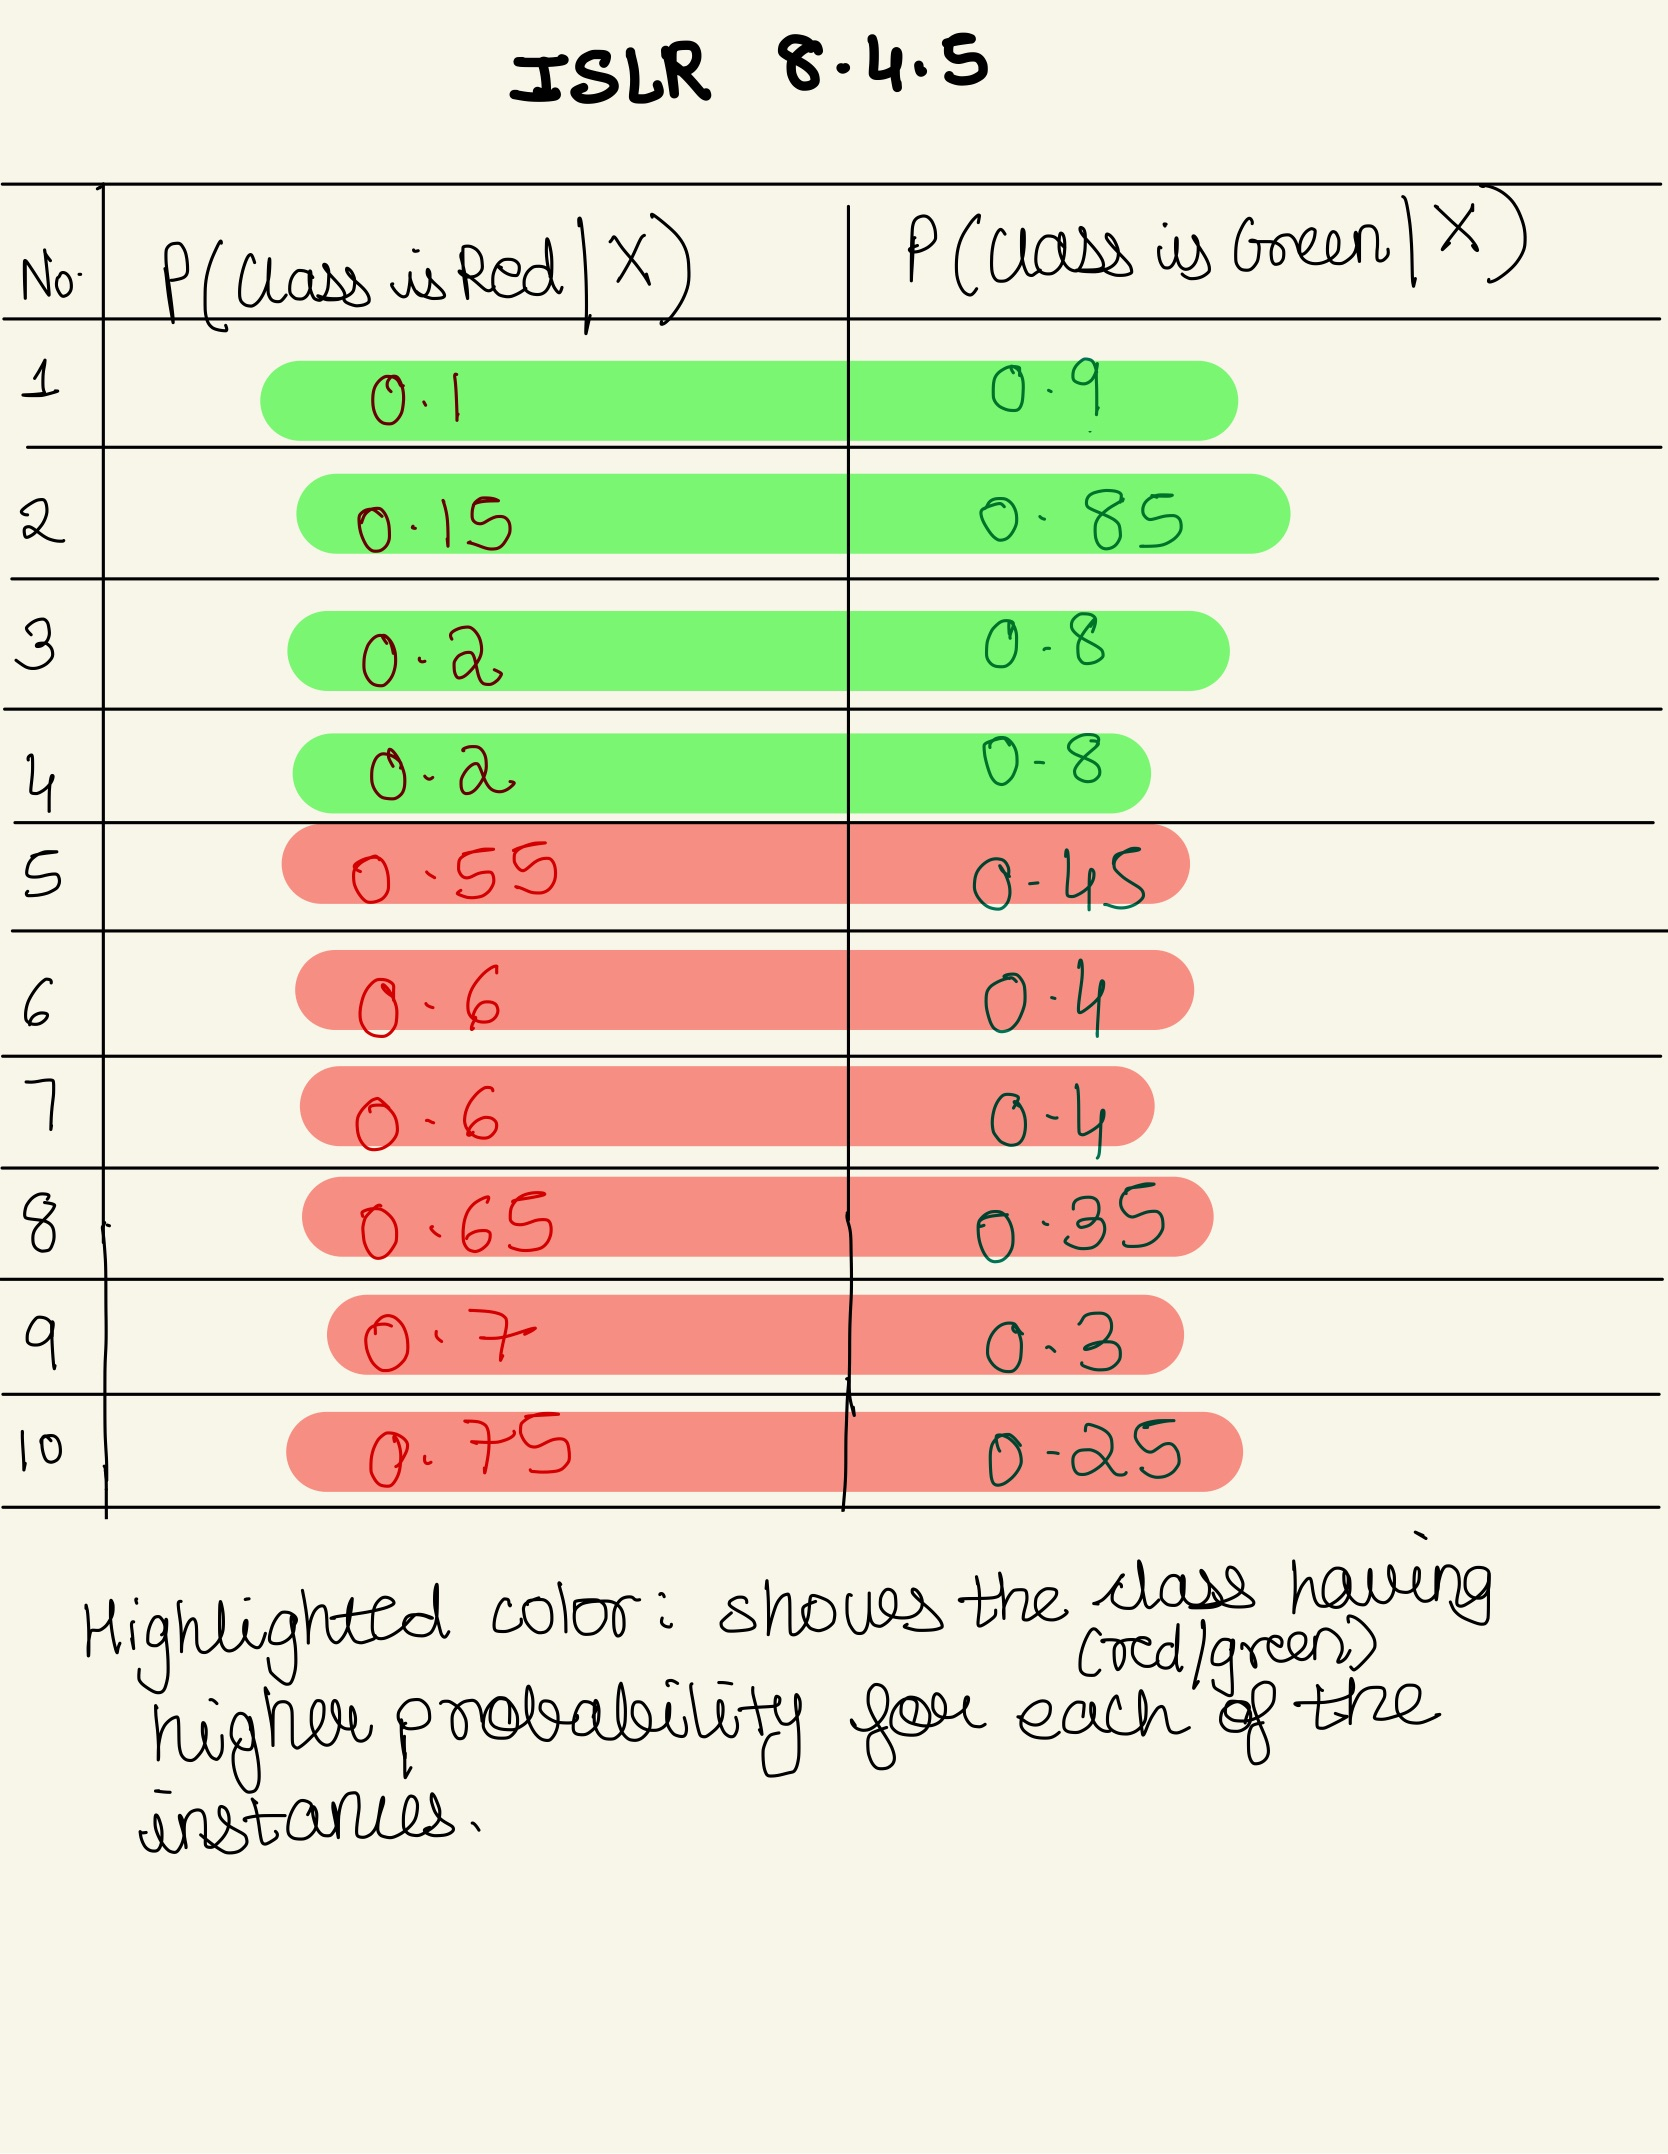

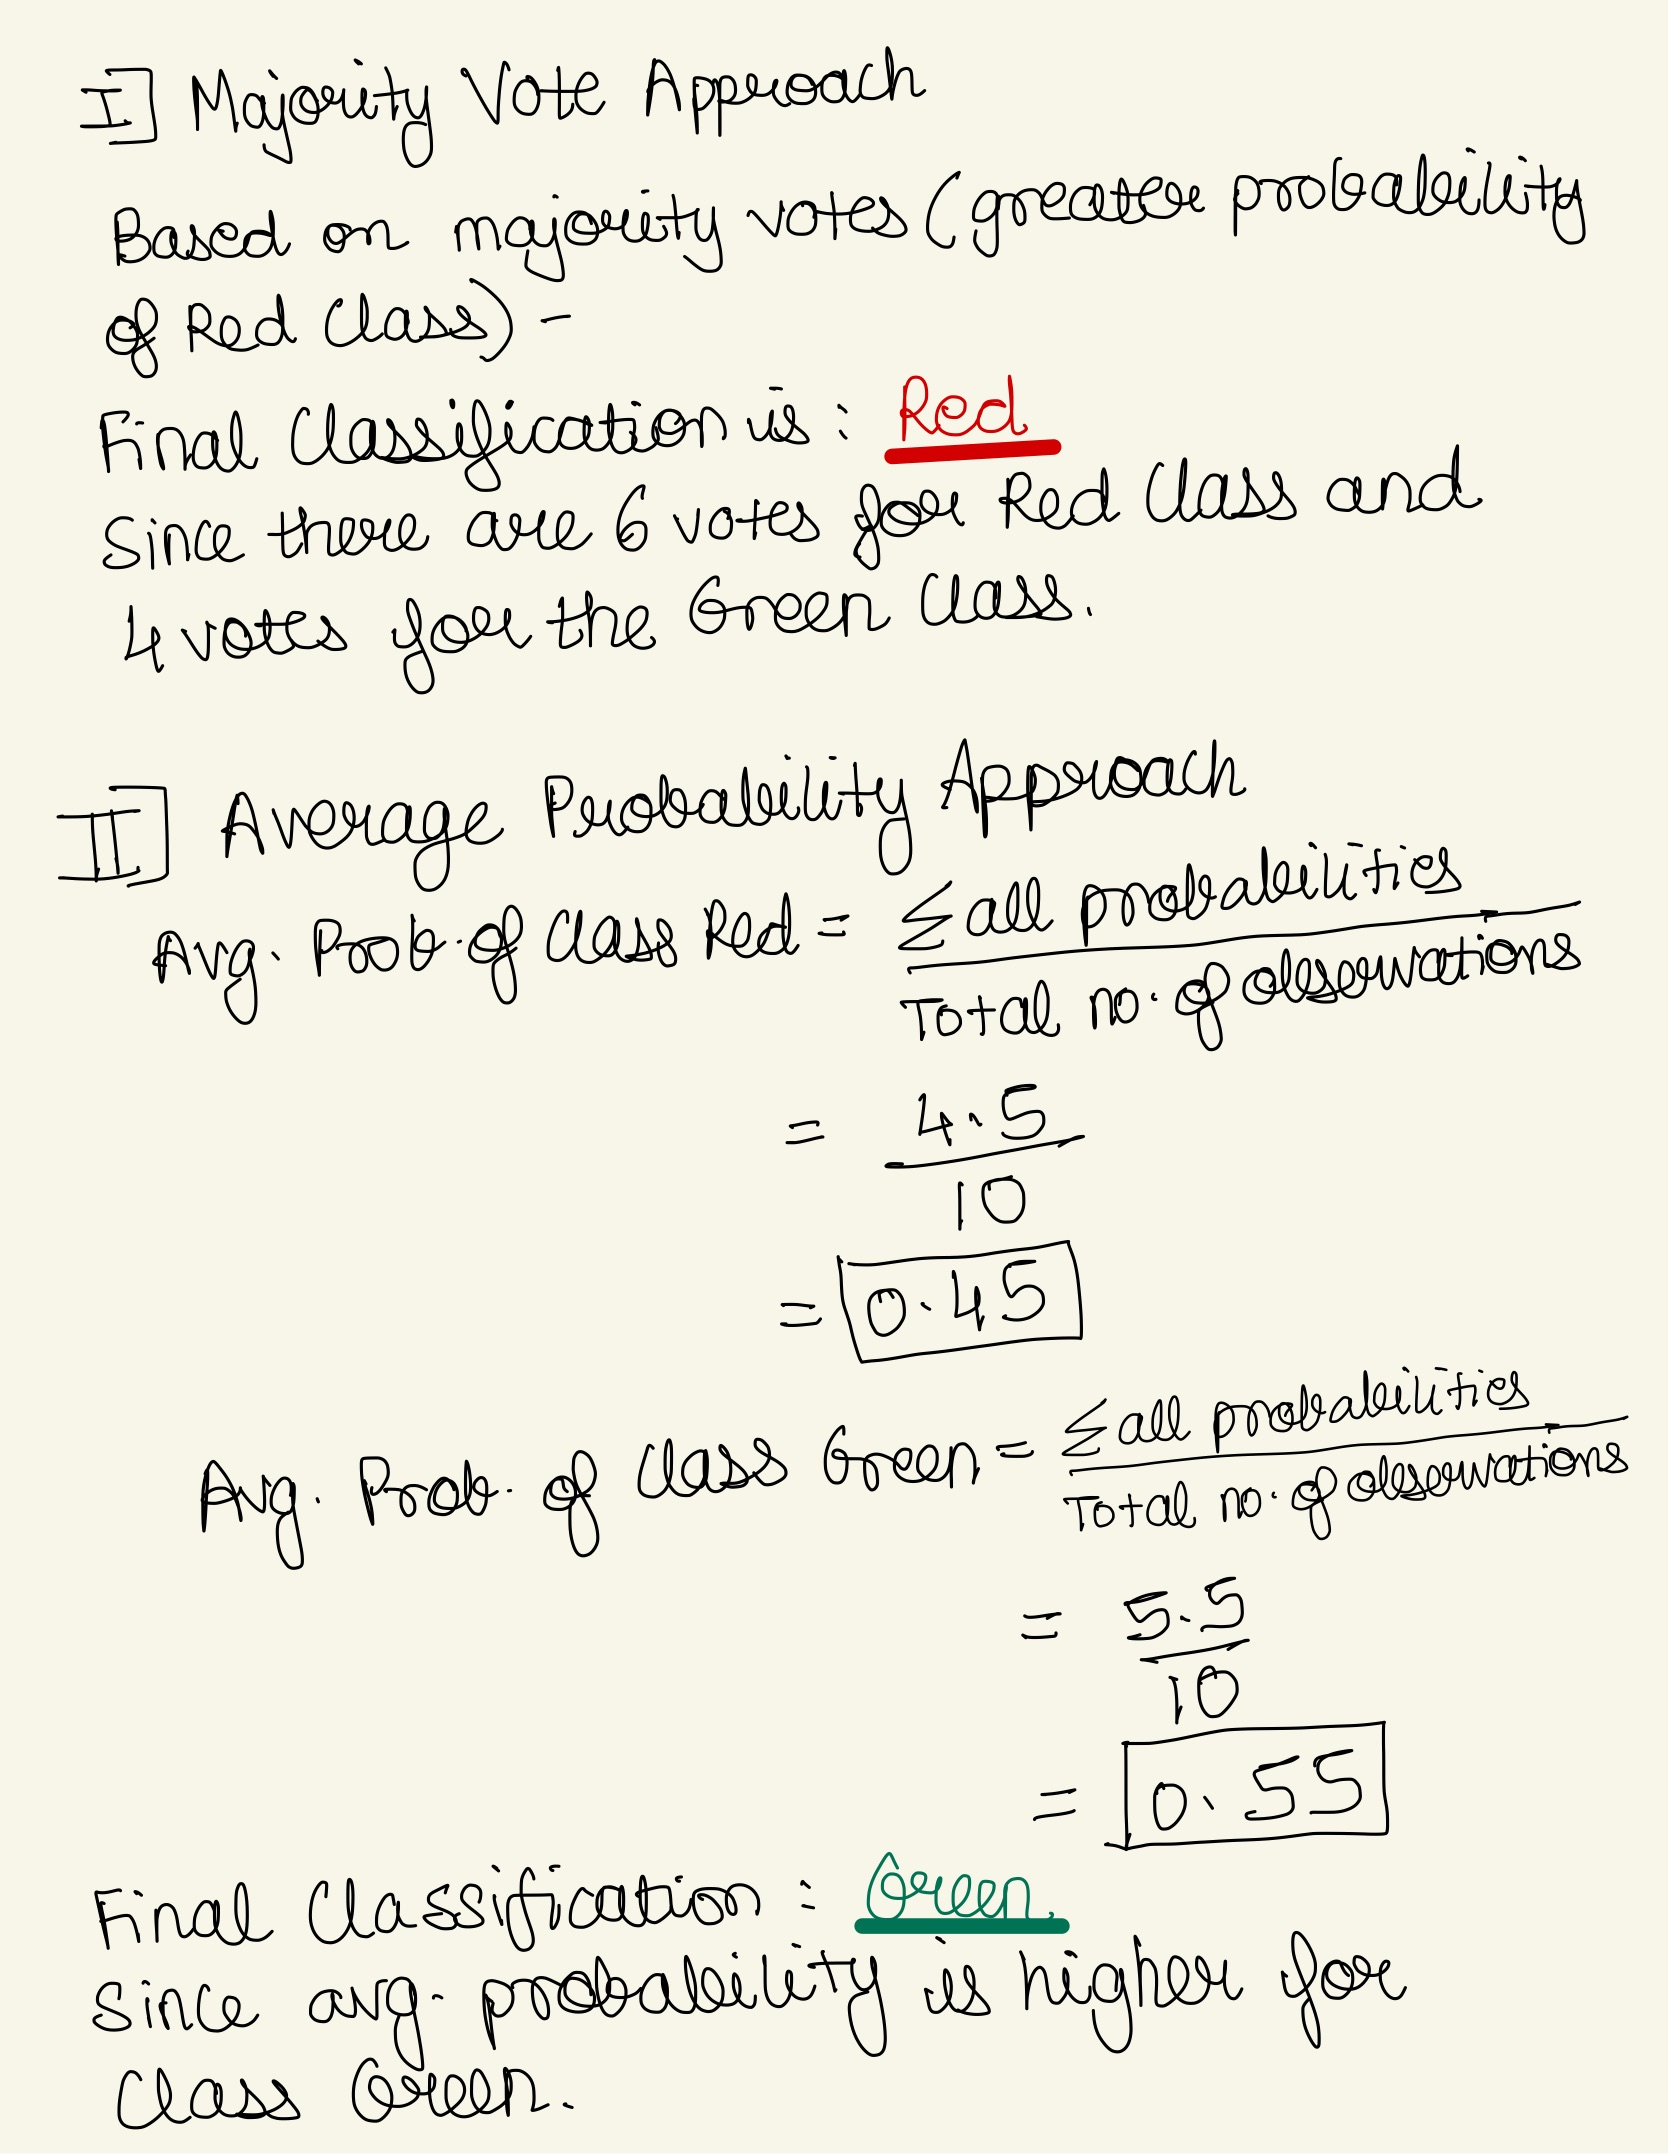

## 5. ISLR 9.7.3

**Here we explore the maximal margin classifier on a toy data set.**
**(a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
Obs. X1 X2 Y
1 3 4 Red 2 2 2 Red 3 4 4 Red 4 1 4 Red 5 2 1 Blue 6 4 3 Blue 7 4 1 Blue
Sketch the observations.
(b) Sketch the optimal separating hyperplane, and provide the equa- tion for this hyperplane (of the form (9.1)).
(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.
(d) On your sketch, indicate the margin for the maximal margin hyperplane.
(e) Indicate the support vectors for the maximal margin classifier.
(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.
(g) Sketch a hyperplane that is not the optimal separating hyper- plane, and provide the equation for this hyperplane.
(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.**

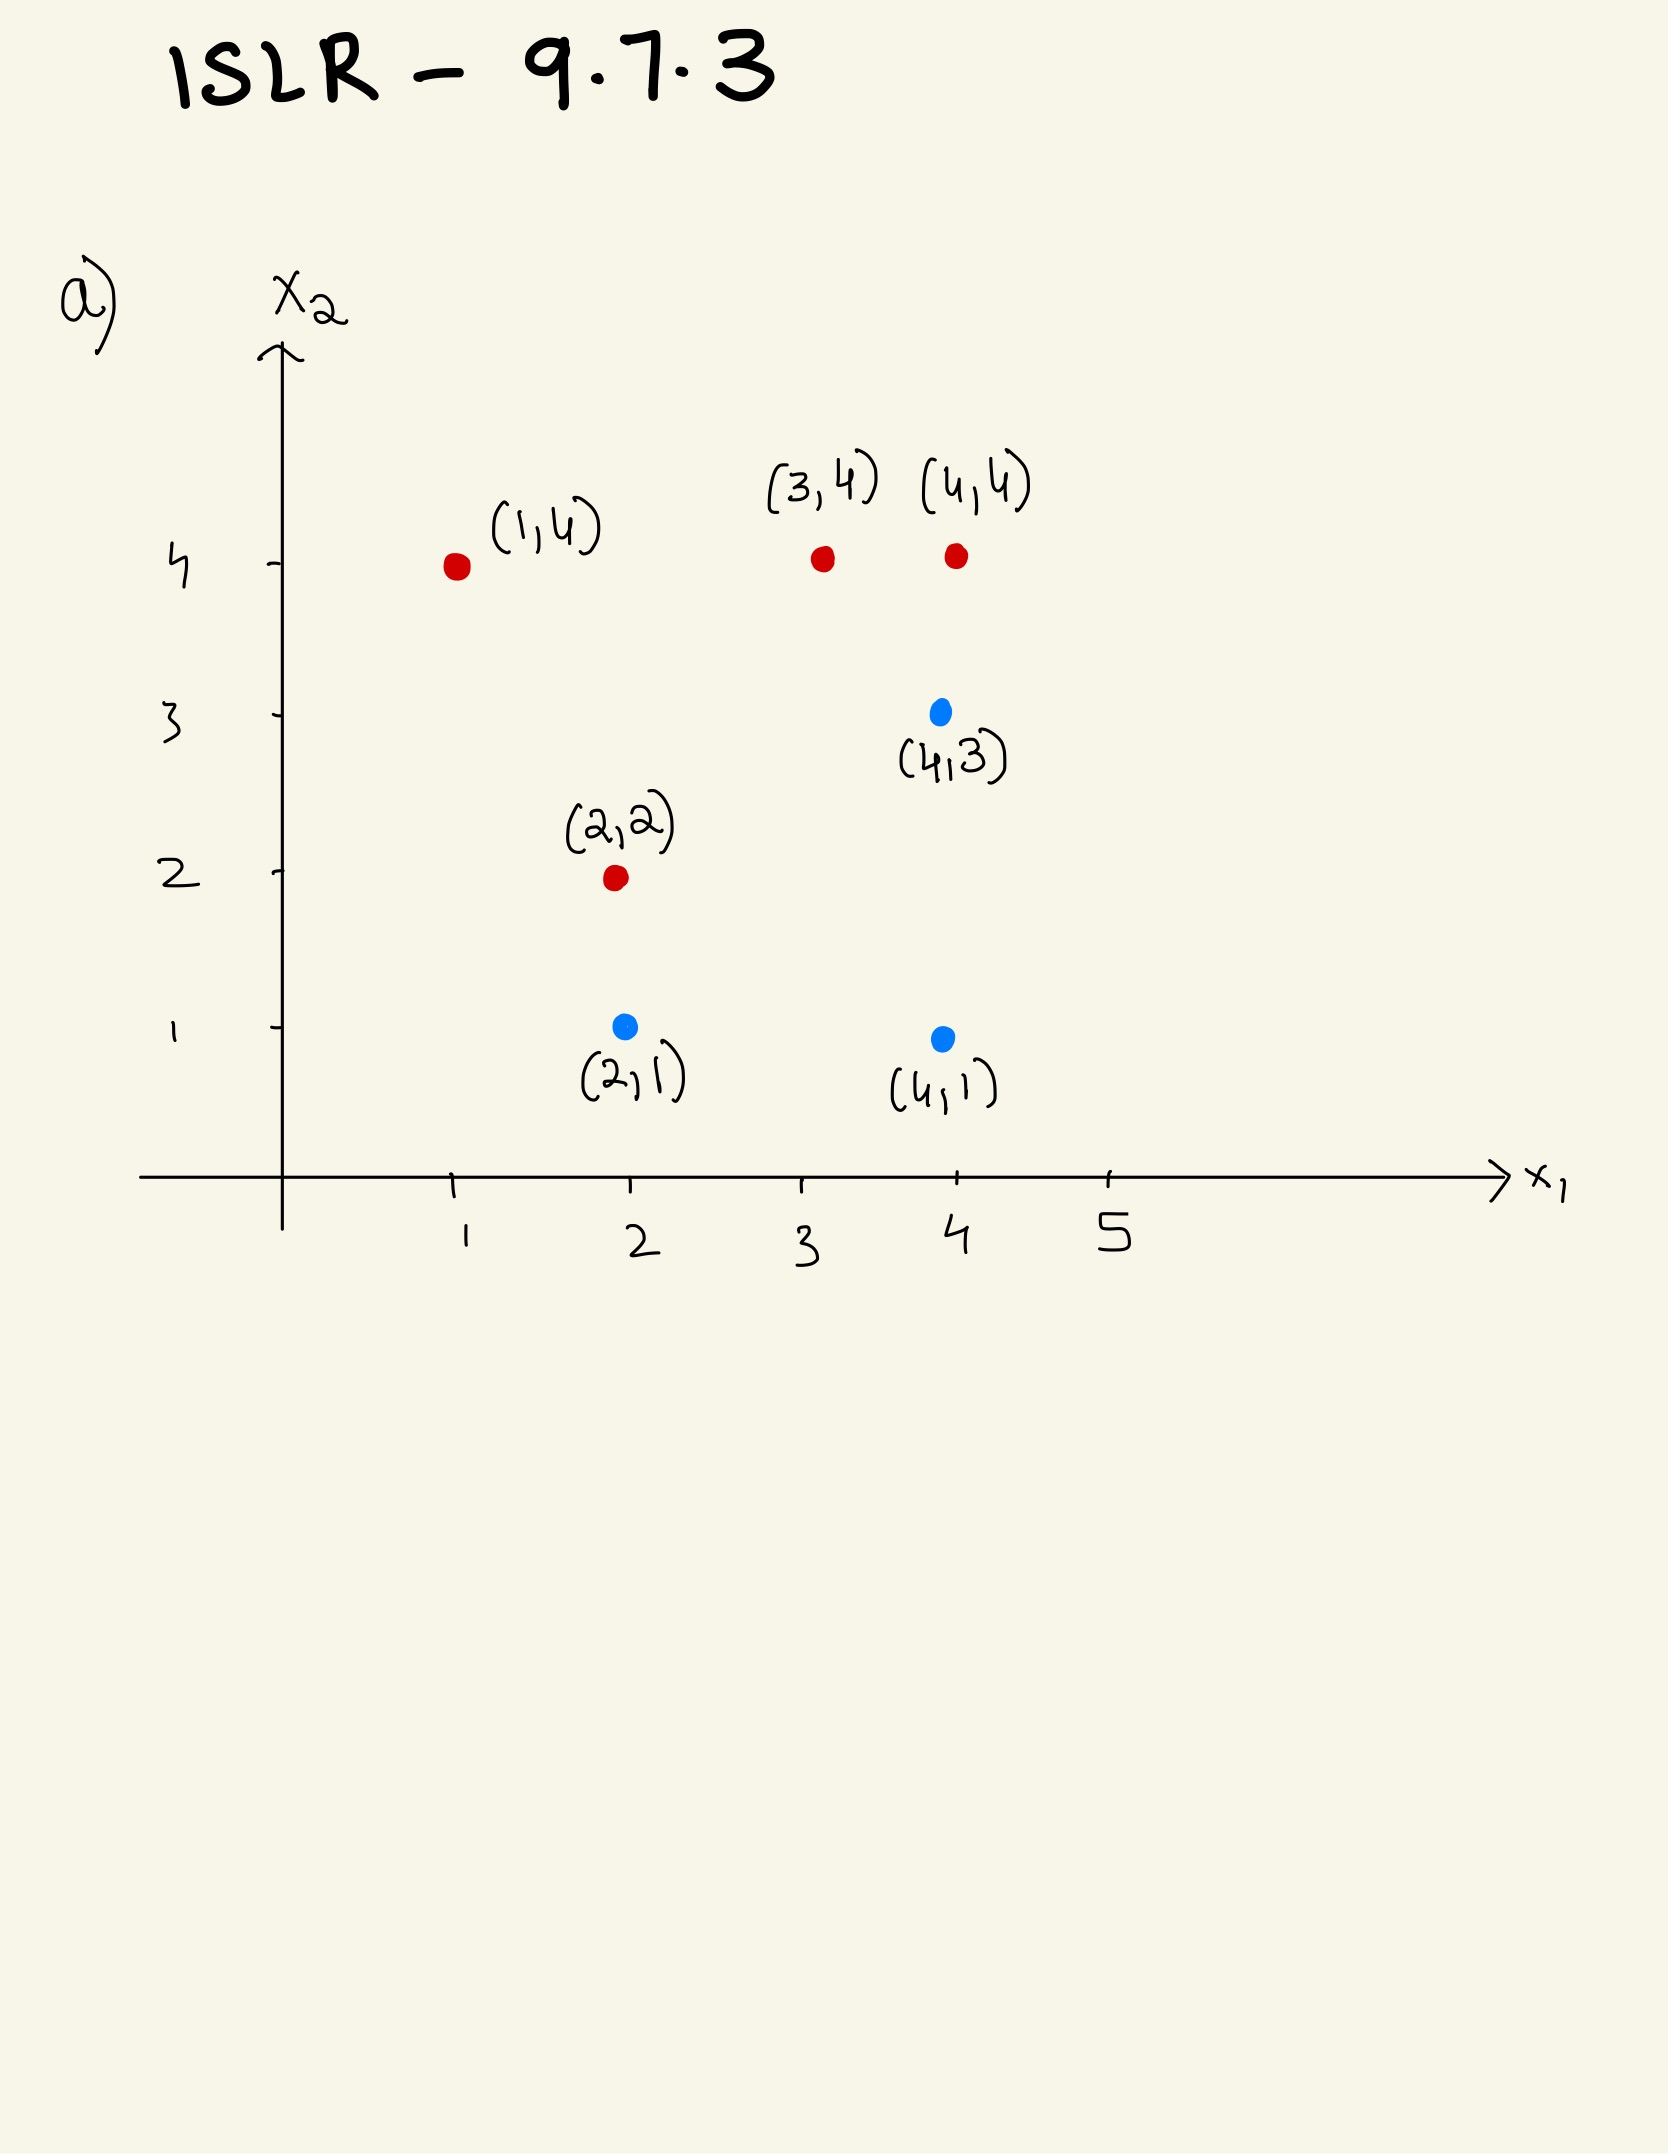

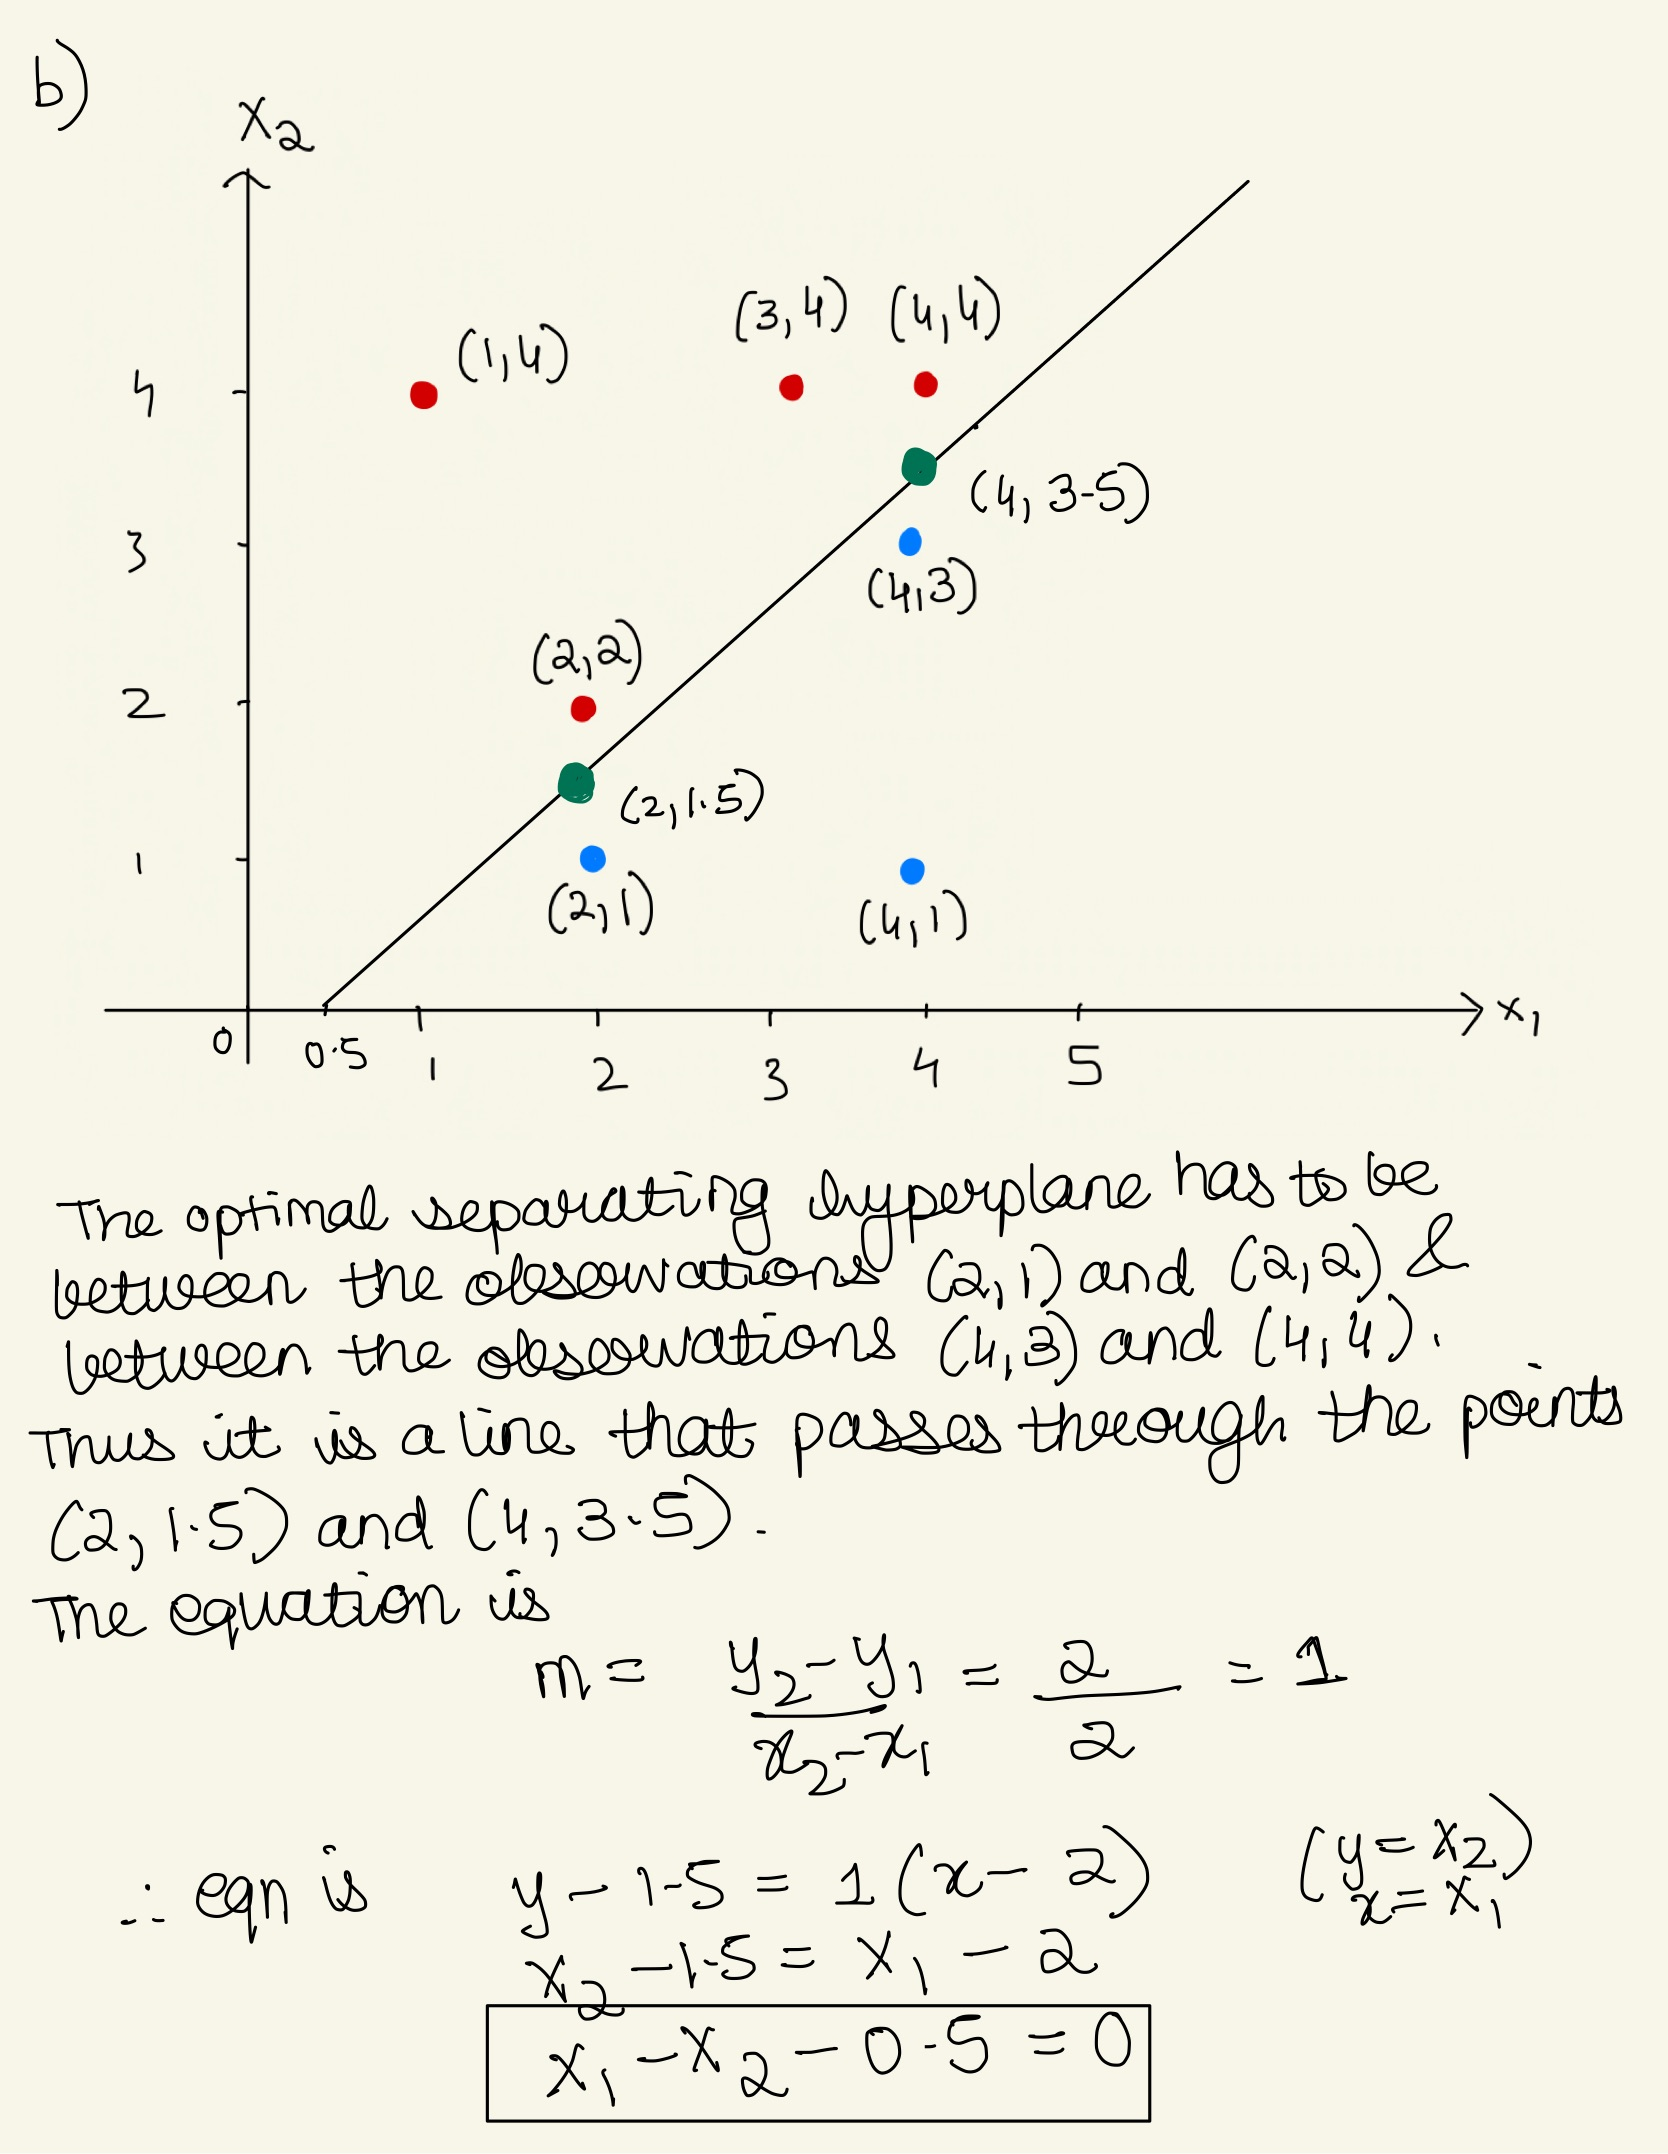

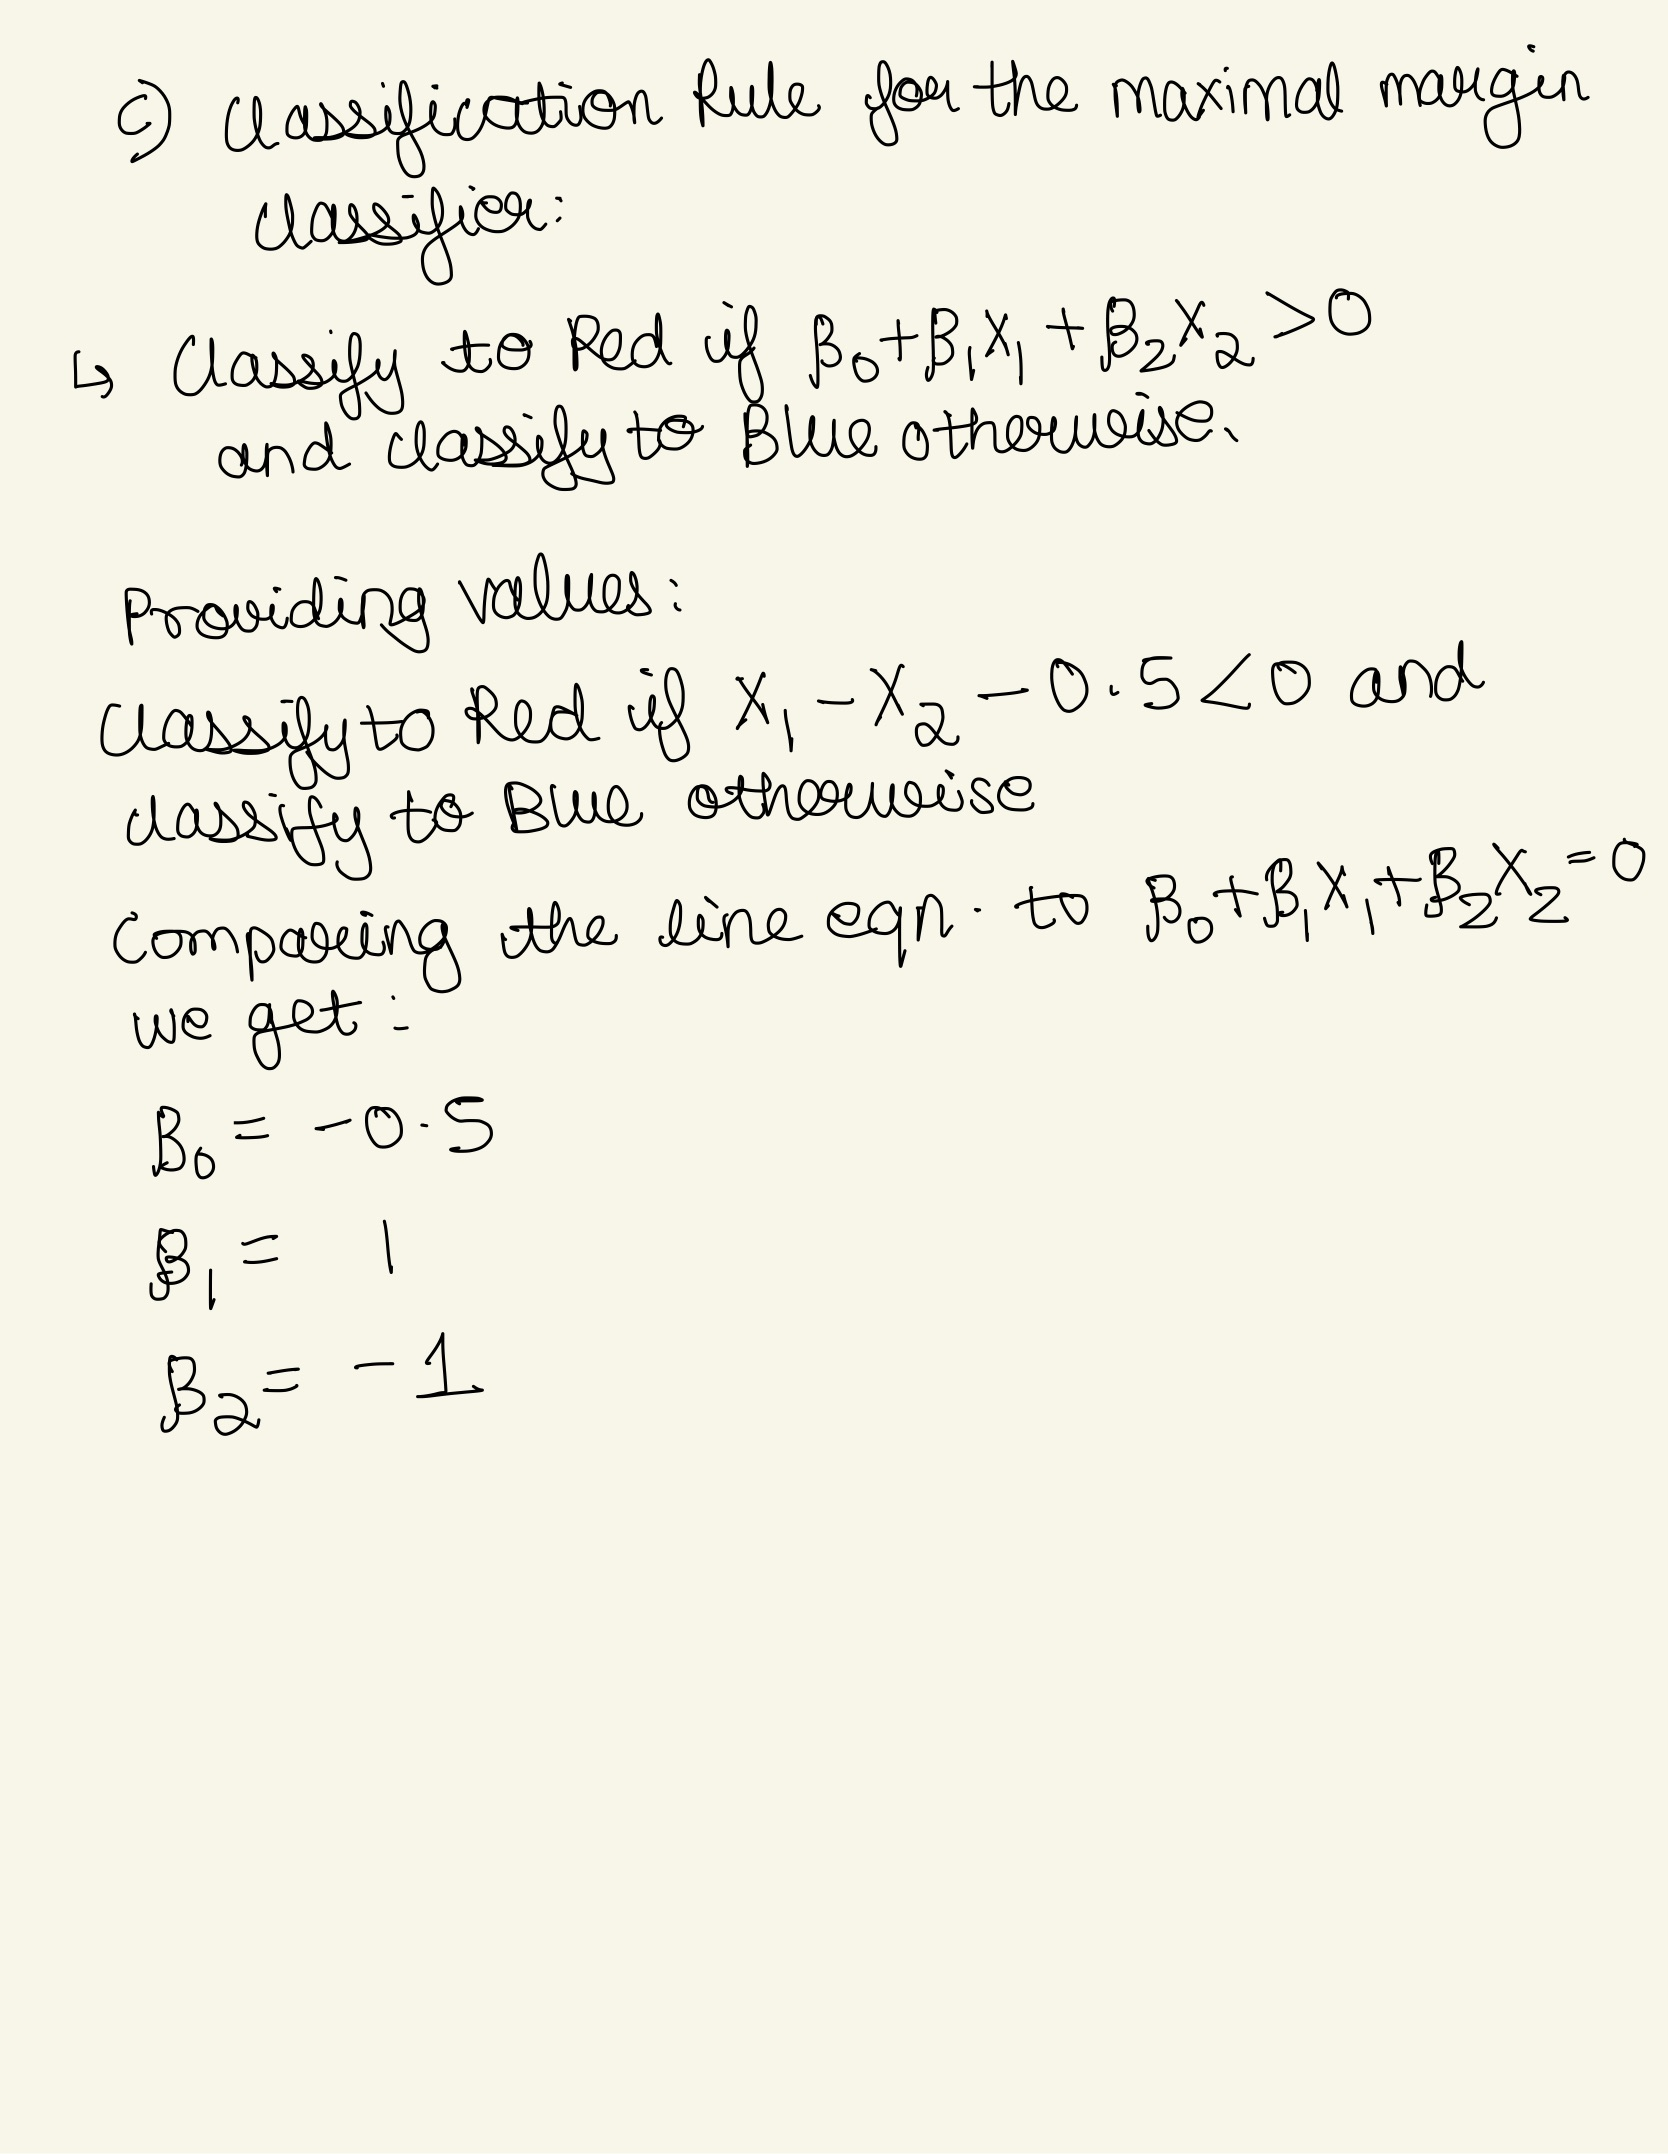

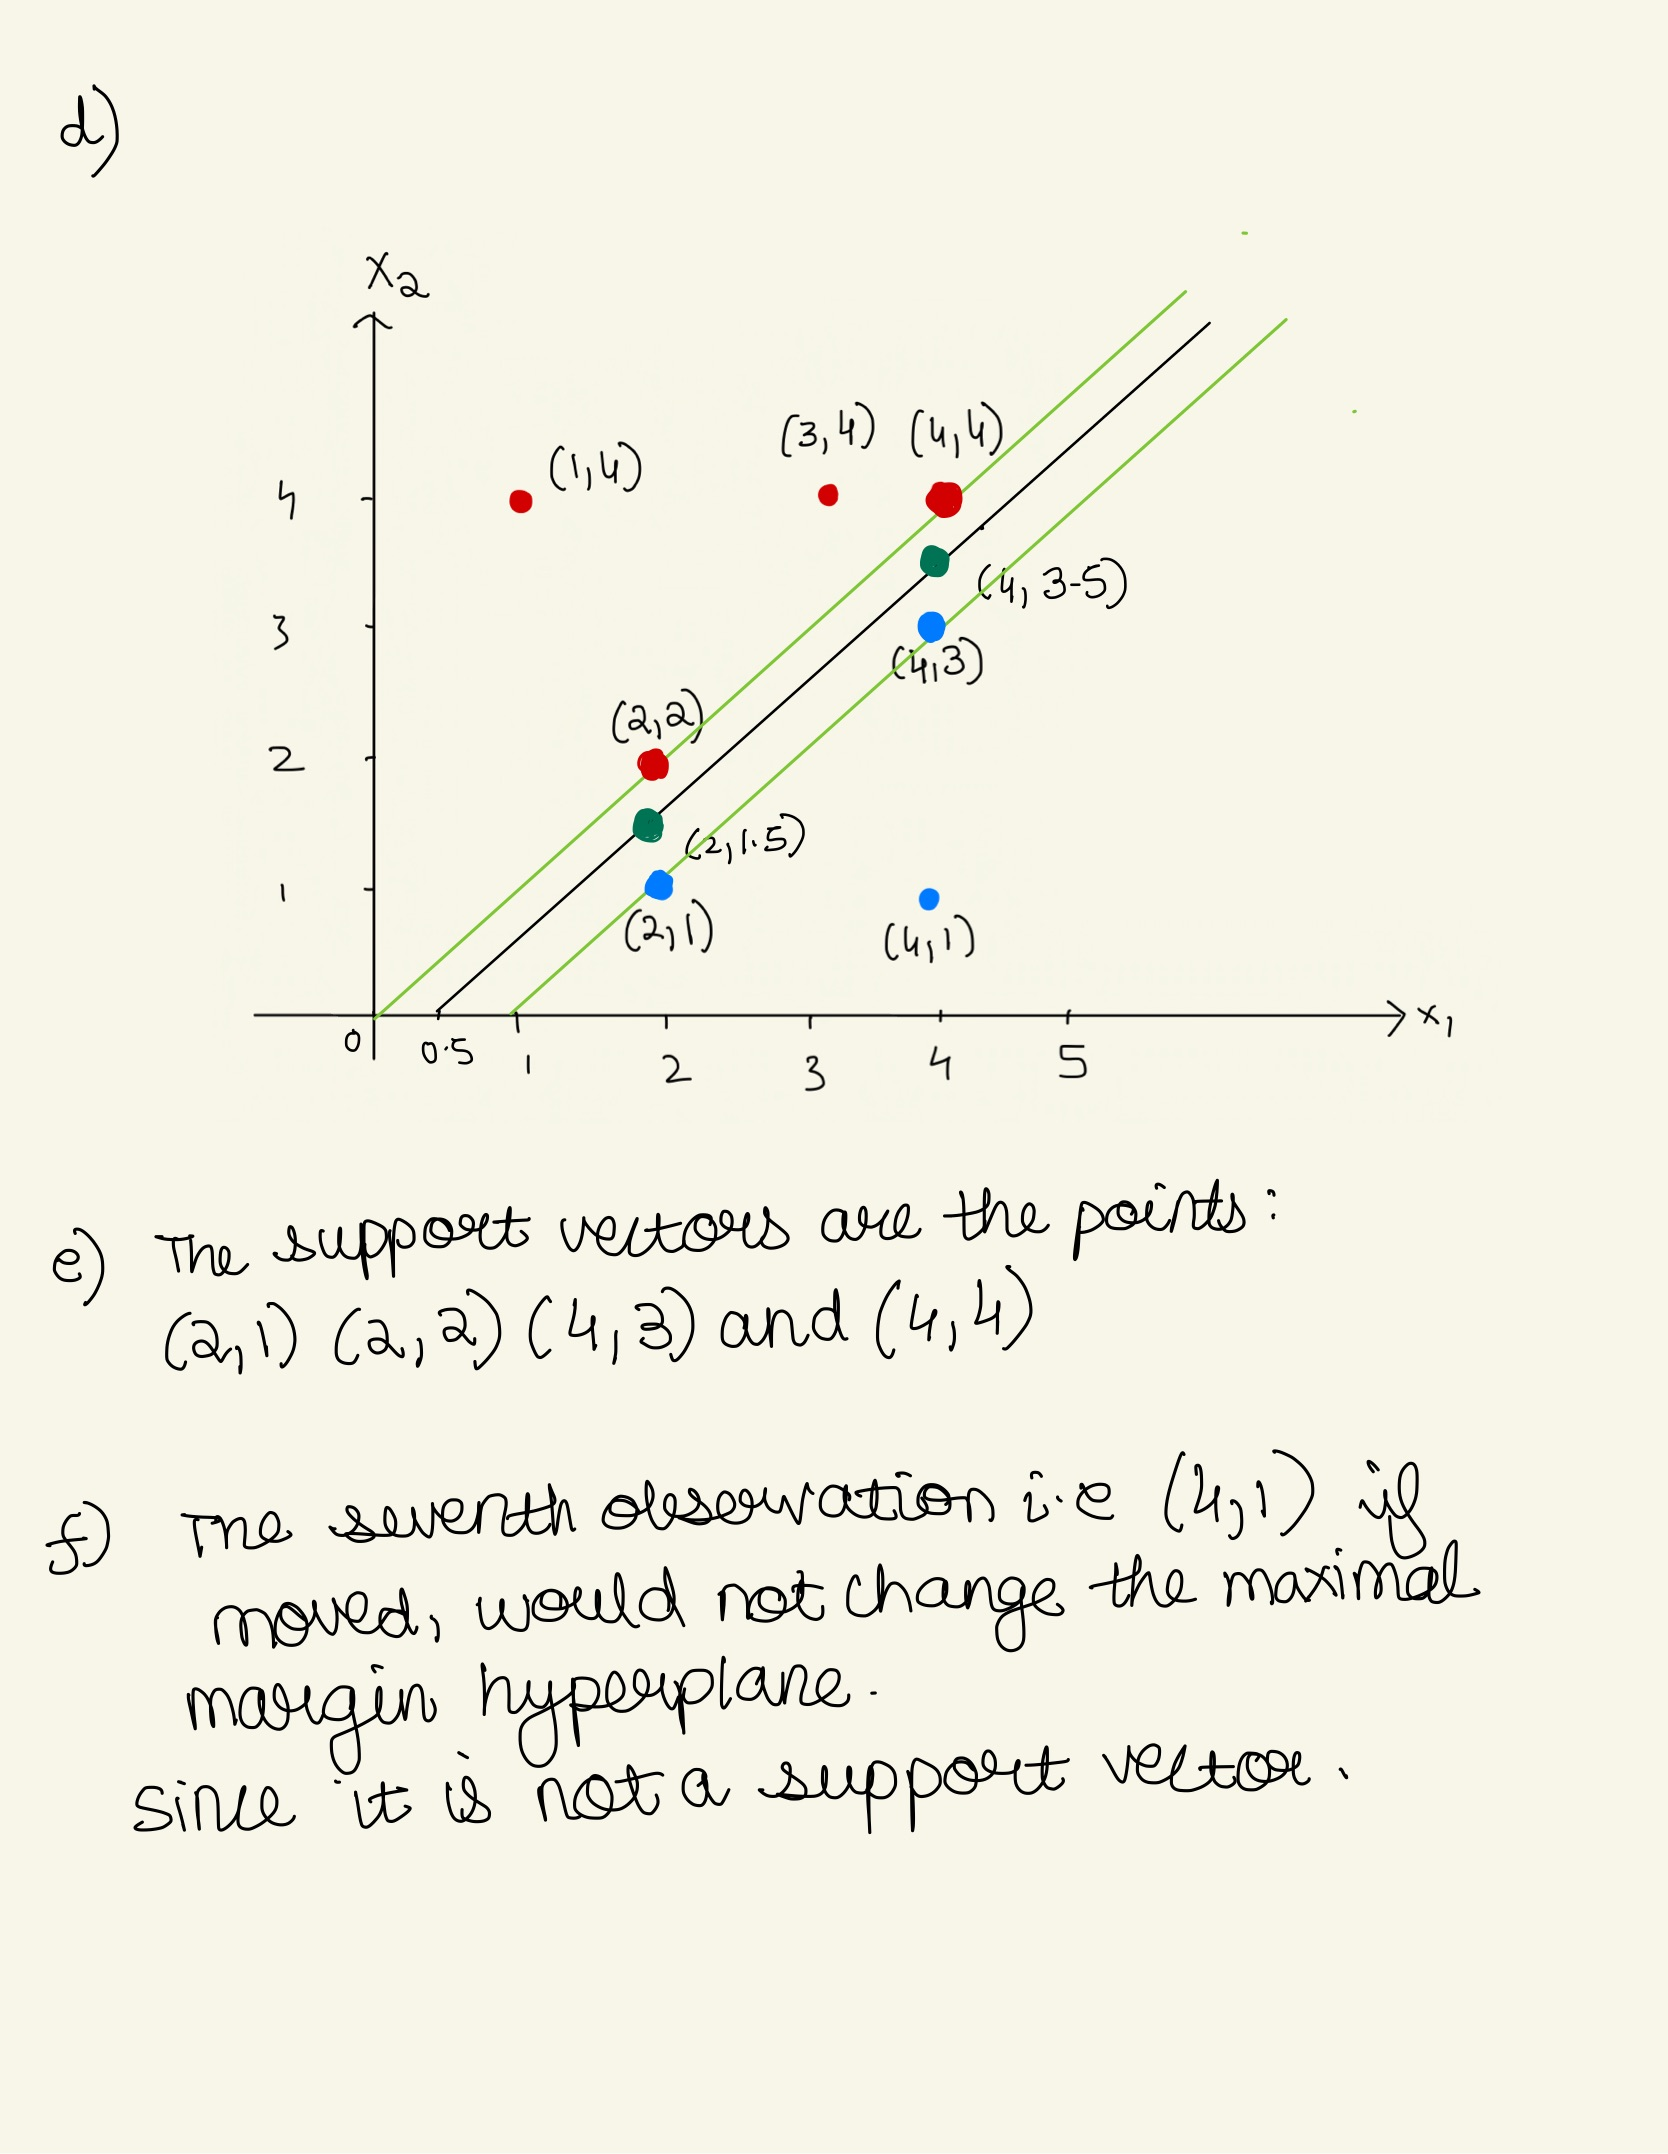

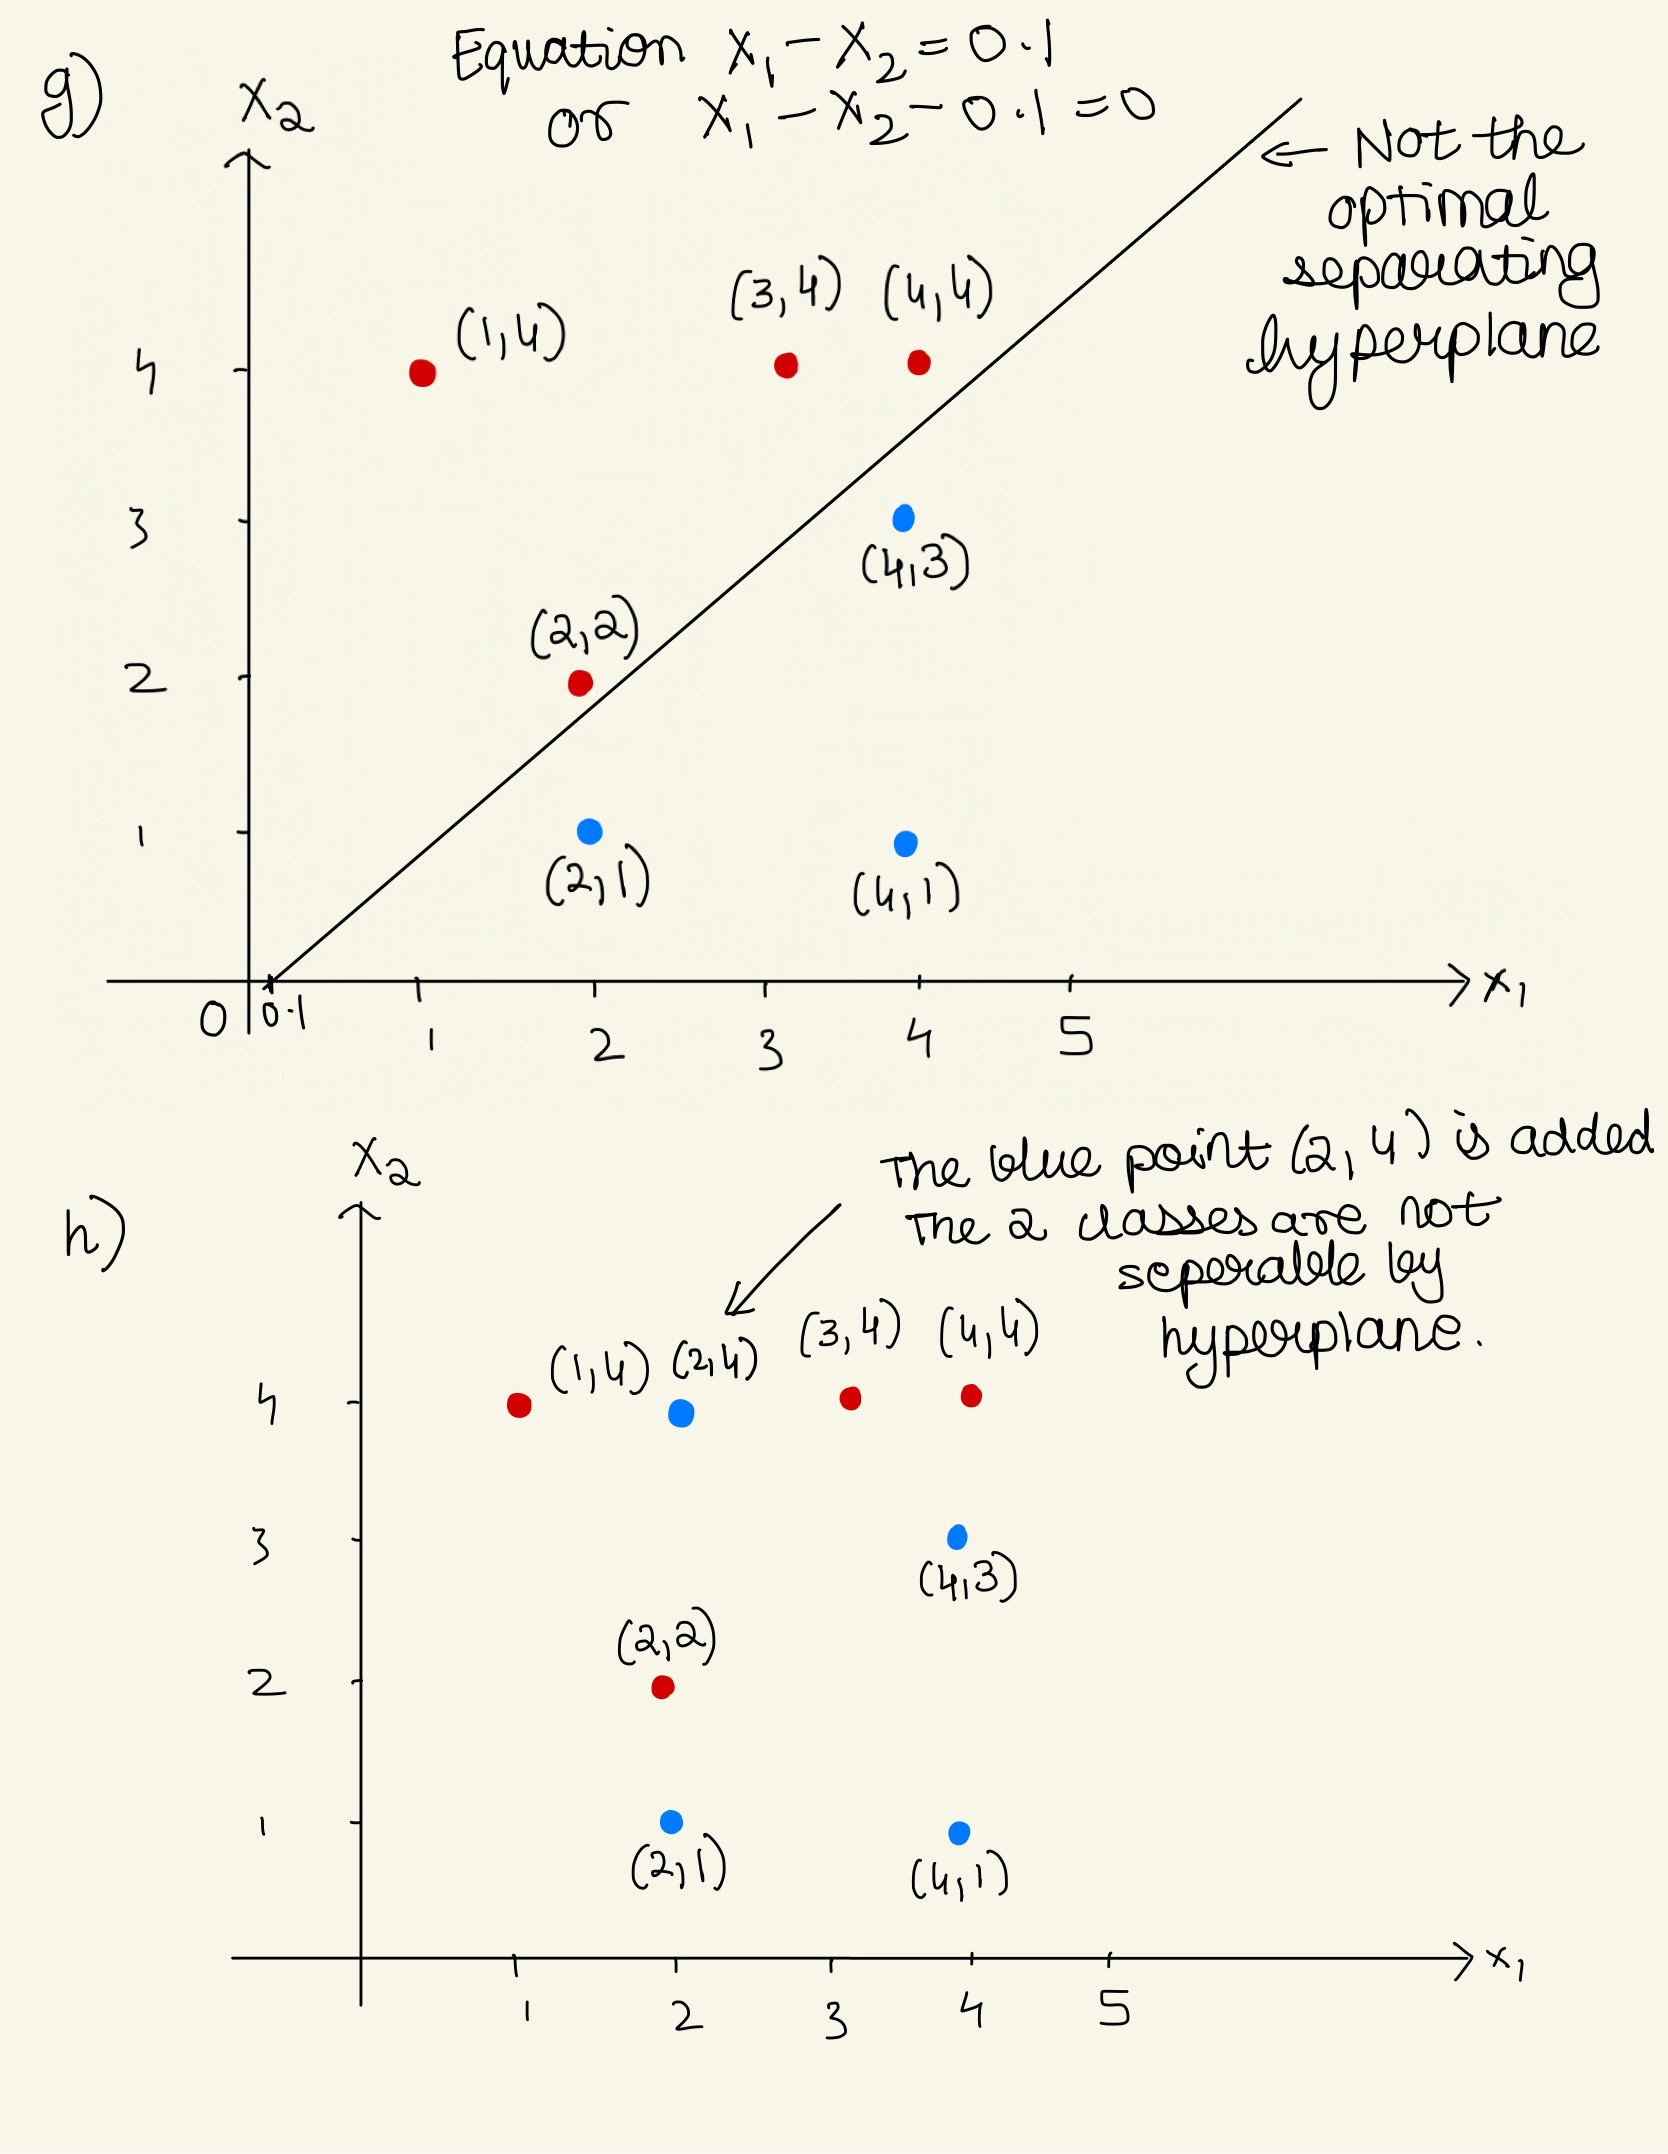

## 6. Extra Practice: ISLR 5.4.2, 6.8.4, 8.4.4, 9.7.2

**References:**


https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/

https://www.kaggle.com/code/residentmario/simple-techniques-for-missing-data-imputation/notebook

https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

https://analyticsindiamag.com/what-is-the-out-of-bag-oob-score-of-bagging-models/

https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/


In [56]:
!pip freeze> requirements.txt